In [1]:
# setup dependencies
import ssl
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib2 
import urlparse

#open url and it's html
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE #don't worry about ssl certificate

url = 'https://www.cia.gov/library/publications/the-world-factbook/'

print("new connection")
print "Connecting to", url
print "Opening the file connection..." 
uh= urllib2.urlopen(url, context=ctx)
print "HTTP status",uh.getcode()
html =uh.read()
print "Reading done" 

new connection
Connecting to https://www.cia.gov/library/publications/the-world-factbook/
Opening the file connection...
HTTP status 200
Reading done


In [2]:
#web scrape
soup = BeautifulSoup(html, 'html.parser')

country_codes=[]
country_names=[]

for tag in soup.find_all('option'): #get all countries on drop down menu
    country_codes.append(tag.get('value')[5:7]) # get code so that we can modifiy URL
    country_names.append(tag.text) # get corresponding country names

country_names_str = map(str, country_names)
country_names_str = map(str.strip, country_names_str)
print "removing from meaningless entries list"  
#print country_names_str
ToRemoveInd=country_names_str.index("World") #because the world section contains no useful info
country_codes[0:ToRemoveInd+1]=[] # Remove meaningless world-related entries
country_names[0:ToRemoveInd+1]=[] # Remove meaningless world-related entries
country_names_str[0:ToRemoveInd+1]=[]

removing from meaningless entries list


In [3]:
# Get each country's info
urlBase = 'https://www.cia.gov/library/publications/the-world-factbook/geos/'
Country_data=dict()

for i in range(0,len(country_codes)):
    CountryInd=country_codes[i]
    urlCurrCountry=urlBase+CountryInd+".html" #produce URL for each entry on factbook
    print urlCurrCountry
    CurrCountry= urllib2.urlopen(urlCurrCountry, context=ctx).read()#get country's info
    soupCountry = BeautifulSoup(CurrCountry, 'html.parser')
    Country_data[i]=soupCountry.get_text()
    print "Finished loading data for " + country_names_str[country_codes.index(CountryInd)]

https://www.cia.gov/library/publications/the-world-factbook/geos/af.html
Finished loading data for Afghanistan
https://www.cia.gov/library/publications/the-world-factbook/geos/ax.html
Finished loading data for Akrotiri
https://www.cia.gov/library/publications/the-world-factbook/geos/al.html
Finished loading data for Albania
https://www.cia.gov/library/publications/the-world-factbook/geos/ag.html
Finished loading data for Algeria
https://www.cia.gov/library/publications/the-world-factbook/geos/aq.html
Finished loading data for American Samoa
https://www.cia.gov/library/publications/the-world-factbook/geos/an.html
Finished loading data for Andorra
https://www.cia.gov/library/publications/the-world-factbook/geos/ao.html
Finished loading data for Angola
https://www.cia.gov/library/publications/the-world-factbook/geos/av.html
Finished loading data for Anguilla
https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html
Finished loading data for Antarctica
https://www.cia.gov/li

Finished loading data for El Salvador
https://www.cia.gov/library/publications/the-world-factbook/geos/ek.html
Finished loading data for Equatorial Guinea
https://www.cia.gov/library/publications/the-world-factbook/geos/er.html
Finished loading data for Eritrea
https://www.cia.gov/library/publications/the-world-factbook/geos/en.html
Finished loading data for Estonia
https://www.cia.gov/library/publications/the-world-factbook/geos/wz.html
Finished loading data for Eswatini
https://www.cia.gov/library/publications/the-world-factbook/geos/et.html
Finished loading data for Ethiopia
https://www.cia.gov/library/publications/the-world-factbook/geos/fk.html
Finished loading data for Falkland Islands (Islas Malvinas)
https://www.cia.gov/library/publications/the-world-factbook/geos/fo.html
Finished loading data for Faroe Islands
https://www.cia.gov/library/publications/the-world-factbook/geos/fj.html
Finished loading data for Fiji
https://www.cia.gov/library/publications/the-world-factbook/geos/

Finished loading data for Malaysia
https://www.cia.gov/library/publications/the-world-factbook/geos/mv.html
Finished loading data for Maldives
https://www.cia.gov/library/publications/the-world-factbook/geos/ml.html
Finished loading data for Mali
https://www.cia.gov/library/publications/the-world-factbook/geos/mt.html
Finished loading data for Malta
https://www.cia.gov/library/publications/the-world-factbook/geos/rm.html
Finished loading data for Marshall Islands
https://www.cia.gov/library/publications/the-world-factbook/geos/mr.html
Finished loading data for Mauritania
https://www.cia.gov/library/publications/the-world-factbook/geos/mp.html
Finished loading data for Mauritius
https://www.cia.gov/library/publications/the-world-factbook/geos/mx.html
Finished loading data for Mexico
https://www.cia.gov/library/publications/the-world-factbook/geos/fm.html
Finished loading data for Micronesia, Federated States of
https://www.cia.gov/library/publications/the-world-factbook/geos/um.html
Fin

Finished loading data for Southern Ocean
https://www.cia.gov/library/publications/the-world-factbook/geos/sp.html
Finished loading data for Spain
https://www.cia.gov/library/publications/the-world-factbook/geos/pg.html
Finished loading data for Spratly Islands
https://www.cia.gov/library/publications/the-world-factbook/geos/ce.html
Finished loading data for Sri Lanka
https://www.cia.gov/library/publications/the-world-factbook/geos/su.html
Finished loading data for Sudan
https://www.cia.gov/library/publications/the-world-factbook/geos/ns.html
Finished loading data for Suriname
https://www.cia.gov/library/publications/the-world-factbook/geos/sv.html
Finished loading data for Svalbard
https://www.cia.gov/library/publications/the-world-factbook/geos/sw.html
Finished loading data for Sweden
https://www.cia.gov/library/publications/the-world-factbook/geos/sz.html
Finished loading data for Switzerland
https://www.cia.gov/library/publications/the-world-factbook/geos/sy.html
Finished loading da

In [4]:
def get_data(searchTerm,searchTerm2,VOI, verbose):
    # get data based on searchTerm and SearchTerm2. The search terms should be the text immediately before the 
    # data you want. Having two terms allows for the restriction of searching to within a section. 
    # returms data for all countries expect those that are UNITED STATES PACIFIC ISLAND WILDLIFE REFUGES or
    # those with no direct data (i.e. Gaza Strip).
    #
    # Input arugements -
    # searchTerm = header to section
    # searchTerm2 = text immediately before data wanted
    # VOI = what to label the returned data as during string output 
    # verbose = print the ongoing data collected from the items - values are 0 or 1 [verbose] - NO DEFAULT
    #
    # Output -
    # VOIFinal_list = list of data for each country - in order of Country_data

    VOIFinal_list=[]
    ExcludedIsland=[" Baker Island "," Howland Island "," Jarvis Island "," Johnston Atoll ", \
                        " Kingman Reef "," Midway Islands "," Palmyra Atoll ", \
                    " Gaza Strip "," United States Pacific Island Wildlife Refuges "] 
    # exclude the UNITED STATES PACIFIC ISLAND WILDLIFE REFUGES and those with no direct data
    Background="Background"
    count=0
    
    for i in range(0,len(Country_data)):
        if verbose==1:
            print("\n")
        if country_names[i] not in ExcludedIsland:
            if verbose==1:
                print "finding", VOI, "of " + country_names_str[i]
            CurrCountry=[]
            CurrCountry=Country_data[i]
            BackposFirst=[]
            #find section of CurrCountry that actually contains the data by finding the term background twice
            BackposFirst = CurrCountry.find(Background)#find first mention of background
            BackposFirst=BackposFirst+len(Background)
            Backpos = CurrCountry[BackposFirst::].find(Background)#find second mention of background 
            Backpos=BackposFirst+Backpos+len(Background)
            string = CurrCountry[Backpos::]
            pos = string.find(searchTerm) 
            if pos!=-1:
                string = string[pos : pos+4000]
                posPrefTypeA=string.find('.\n        \n\n\n\n\n\n\n\n') #first type of gap before data
                posPrefTypeA=posPrefTypeA+len('.\n        \n\n\n\n\n\n\n\n')
                
                posPrefTypeB=string.find('.\n            more\n\n\n\n\n\n\n\n\n') #second type of gap before data
                posPrefTypeB=posPrefTypeB+len('.\n            more\n\n\n\n\n\n\n\n\n')
                
                #chose whichever start is earlier
                if posPrefTypeB==-26: #27 (length of string) - 1 (not found)
                    posPref=posPrefTypeA
                elif posPrefTypeA==17:
                    posPref=posPrefTypeB
                elif posPrefTypeA<posPrefTypeB:
                    posPref=posPrefTypeA
                else:
                    posPref=posPrefTypeB
                string=string[posPref::]
                pos = string.find(searchTerm2) # now search for second term
                if pos!=-1:
                    pos=pos+len(searchTerm2)
                    string = string[pos:pos+30]
                    try:
                        
                        numstart = re.search("\d" , string) # find the first number
                        endString = re.search("\s", string[numstart.start():]) # start on the third index to avoid initial white spaces
 
                        corrIndby=0
                        if string[numstart.start()-1]=="-":                            
                            corrIndby=1
                            if verbose==1:
                                print("found negative values")
                         
                        scalr=[]
                        scalrString=string[numstart.start():numstart.start()+endString.start()+10]
                        scalrStringsplit=scalrString.split()
                        scalrStringImportant=scalrStringsplit[0:3]
                        if "million" in scalrStringImportant:
                            scalr=1000000
                        elif "billion" in scalrStringImportant:
                            scalr=1000000000
                        elif "trillion" in scalrStringImportant:
                            scalr=1000000000000
                        else:
                            scalr=1

                        if (numstart!=None and endString!=None):
                            VIO_num=(string[numstart.start()-corrIndby:numstart.start()+endString.start()])
                            VIO_num=re.sub('[^A-Za-z0-9.\-]+', '', VIO_num)
                            VIO_float=float(VIO_num.replace(",",""))
                            if (VIO_float!=-1.0): 
                                VIO_float=VIO_float*scalr
                                if verbose==1:
                                    print(VOI + " of " + country_names_str[i] + "is " + str(VIO_float) + " unit")
                                VOIFinal_list.append(VIO_float)
                            else:
                                if verbose==1:
                                    print("Couldn't get" + VOI +  " of " + country_names_str[i] + " - Float conversion error")
                                VOIFinal_list.append(np.nan)
                        else:
                            if verbose==1:
                                print("Couldn't get " + VOI +  " of " + country_names_str[i] + " - Can't find begining or end of SOI")
                            VOIFinal_listVOIFinal_list.append(np.nan) 
                    except: 
                        if verbose==1:
                            print("Couldn't get " + VOI +  " of " + country_names_str[i] + " - Can't find begining or end of SOI")
                        VOIFinal_list.append(np.nan)   
                else:
                    if verbose==1:
                        print("Couldn't get " + VOI +  " of " + country_names_str[i] + " - Can't find " + searchTerm2 + " on webpage")
                    VOIFinal_list.append(np.nan)
            else:
                if verbose==1:  
                    print("Couldn't get " + VOI +  " of " + country_names_str[i] + " - Can't find " + searchTerm + " on webpage")
                VOIFinal_list.append(np.nan)
        else:
            if verbose==1:
                print(country_names[i], "is excluded because it's a UNITED STATES PACIFIC ISLAND WILDLIFE REFUGES")
            VOIFinal_list.append(np.nan)
    
    return VOIFinal_list


In [5]:
IGR=get_data("Industrial production growth rate:","","IGR",1)



finding IGR of Afghanistan
found negative values
IGR of Afghanistanis -1.9 unit


finding IGR of Akrotiri
Couldn't get IGR of Akrotiri - Can't find Industrial production growth rate: on webpage


finding IGR of Albania
IGR of Albaniais 6.8 unit


finding IGR of Algeria
IGR of Algeriais 0.6 unit


finding IGR of American Samoa
Couldn't get IGR of American Samoa - Can't find begining or end of SOI


finding IGR of Andorra
Couldn't get IGR of Andorra - Can't find begining or end of SOI


finding IGR of Angola
IGR of Angolais 2.5 unit


finding IGR of Anguilla
IGR of Anguillais 4.0 unit


finding IGR of Antarctica
Couldn't get IGR of Antarctica - Can't find Industrial production growth rate: on webpage


finding IGR of Antigua and Barbuda
IGR of Antigua and Barbudais 6.8 unit


finding IGR of Arctic Ocean
Couldn't get IGR of Arctic Ocean - Can't find Industrial production growth rate: on webpage


finding IGR of Argentina
IGR of Argentinais 2.7 unit


finding IGR of Armenia
IGR of Armeni

In [6]:
area=get_data("Area:","total:","area",1)



finding area of Afghanistan
area of Afghanistanis 652230.0 unit


finding area of Akrotiri
area of Akrotiriis 123.0 unit


finding area of Albania
area of Albaniais 28748.0 unit


finding area of Algeria
area of Algeriais 2381740.0 unit


finding area of American Samoa
area of American Samoais 224.0 unit


finding area of Andorra
area of Andorrais 468.0 unit


finding area of Angola
area of Angolais 1246700.0 unit


finding area of Anguilla
area of Anguillais 91.0 unit


finding area of Antarctica
area of Antarcticais 14200000.0 unit


finding area of Antigua and Barbuda
area of Antigua and Barbudais 442.6 unit


finding area of Arctic Ocean
area of Arctic Oceanis 14056000.0 unit


finding area of Argentina
area of Argentinais 2780400.0 unit


finding area of Armenia
area of Armeniais 29743.0 unit


finding area of Aruba
area of Arubais 180.0 unit


finding area of Ashmore and Cartier Islands
area of Ashmore and Cartier Islandsis 5.0 unit


finding area of Atlantic Ocean
area of Atla

In [7]:
PPP=get_data("GDP - per capita (PPP):","","PPP",1)



finding PPP of Afghanistan
PPP of Afghanistanis 2000.0 unit


finding PPP of Akrotiri
Couldn't get PPP of Akrotiri - Can't find GDP - per capita (PPP): on webpage


finding PPP of Albania
PPP of Albaniais 12500.0 unit


finding PPP of Algeria
PPP of Algeriais 15200.0 unit


finding PPP of American Samoa
PPP of American Samoais 11200.0 unit


finding PPP of Andorra
PPP of Andorrais 49900.0 unit


finding PPP of Angola
PPP of Angolais 6800.0 unit


finding PPP of Anguilla
PPP of Anguillais 12200.0 unit


finding PPP of Antarctica
Couldn't get PPP of Antarctica - Can't find GDP - per capita (PPP): on webpage


finding PPP of Antigua and Barbuda
PPP of Antigua and Barbudais 26400.0 unit


finding PPP of Arctic Ocean
Couldn't get PPP of Arctic Ocean - Can't find GDP - per capita (PPP): on webpage


finding PPP of Argentina
PPP of Argentinais 20900.0 unit


finding PPP of Armenia
PPP of Armeniais 9500.0 unit


finding PPP of Aruba
PPP of Arubais 37500.0 unit


finding PPP of Ashmore and Ca

In [8]:
PIU=get_data("Internet users","percent of population:","Percent of internet users",1)



finding Percent of internet users of Afghanistan
Percent of internet users of Afghanistanis 10.6 unit


finding Percent of internet users of Akrotiri
Couldn't get Percent of internet users of Akrotiri - Can't find Internet users on webpage


finding Percent of internet users of Albania
Percent of internet users of Albaniais 66.4 unit


finding Percent of internet users of Algeria
Percent of internet users of Algeriais 42.9 unit


finding Percent of internet users of American Samoa
Percent of internet users of American Samoais 31.3 unit


finding Percent of internet users of Andorra
Percent of internet users of Andorrais 97.9 unit


finding Percent of internet users of Angola
Percent of internet users of Angolais 13.0 unit


finding Percent of internet users of Anguilla
Percent of internet users of Anguillais 81.6 unit


finding Percent of internet users of Antarctica
Percent of internet users of Antarcticais 100.0 unit


finding Percent of internet users of Antigua and Barbuda
Percen

In [9]:
NPH=get_data("HIV/AIDS - people living with HIV/AIDS:", "","people living with HIV/AIDS",1)



finding people living with HIV/AIDS of Afghanistan
people living with HIV/AIDS of Afghanistanis 7500.0 unit


finding people living with HIV/AIDS of Akrotiri
Couldn't get people living with HIV/AIDS of Akrotiri - Can't find HIV/AIDS - people living with HIV/AIDS: on webpage


finding people living with HIV/AIDS of Albania
people living with HIV/AIDS of Albaniais 1400.0 unit


finding people living with HIV/AIDS of Algeria
people living with HIV/AIDS of Algeriais 14000.0 unit


finding people living with HIV/AIDS of American Samoa
Couldn't get people living with HIV/AIDS of American Samoa - Can't find begining or end of SOI


finding people living with HIV/AIDS of Andorra
Couldn't get people living with HIV/AIDS of Andorra - Can't find begining or end of SOI


finding people living with HIV/AIDS of Angola
people living with HIV/AIDS of Angolais 310000.0 unit


finding people living with HIV/AIDS of Anguilla
Couldn't get people living with HIV/AIDS of Anguilla - Can't find begining or 

In [10]:
HD=get_data("HIV/AIDS - deaths:","","HIV/AIDS - deaths",1)



finding HIV/AIDS - deaths of Afghanistan
HIV/AIDS - deaths of Afghanistanis 500.0 unit


finding HIV/AIDS - deaths of Akrotiri
Couldn't get HIV/AIDS - deaths of Akrotiri - Can't find HIV/AIDS - deaths: on webpage


finding HIV/AIDS - deaths of Albania
HIV/AIDS - deaths of Albaniais 100.0 unit


finding HIV/AIDS - deaths of Algeria
HIV/AIDS - deaths of Algeriais 200.0 unit


finding HIV/AIDS - deaths of American Samoa
Couldn't get HIV/AIDS - deaths of American Samoa - Can't find begining or end of SOI


finding HIV/AIDS - deaths of Andorra
Couldn't get HIV/AIDS - deaths of Andorra - Can't find begining or end of SOI


finding HIV/AIDS - deaths of Angola
HIV/AIDS - deaths of Angolais 13000.0 unit


finding HIV/AIDS - deaths of Anguilla
Couldn't get HIV/AIDS - deaths of Anguilla - Can't find begining or end of SOI


finding HIV/AIDS - deaths of Antarctica
Couldn't get HIV/AIDS - deaths of Antarctica - Can't find HIV/AIDS - deaths: on webpage


finding HIV/AIDS - deaths of Antigua and Ba

In [11]:
POP=get_data("Population:","","Population",1)



finding Population of Afghanistan
Population of Afghanistanis 34940837.0 unit


finding Population of Akrotiri
Population of Akrotiriis 15500.0 unit


finding Population of Albania
Population of Albaniais 3057220.0 unit


finding Population of Algeria
Population of Algeriais 41657488.0 unit


finding Population of American Samoa
Population of American Samoais 50826.0 unit


finding Population of Andorra
Population of Andorrais 85708.0 unit


finding Population of Angola
Population of Angolais 30355880.0 unit


finding Population of Anguilla
Population of Anguillais 17422.0 unit


finding Population of Antarctica
Couldn't get Population of Antarctica - Can't find begining or end of SOI


finding Population of Antigua and Barbuda
Population of Antigua and Barbudais 95882.0 unit


finding Population of Arctic Ocean
Couldn't get Population of Arctic Ocean - Can't find Population: on webpage


finding Population of Argentina
Population of Argentinais 44694198.0 unit


finding Population o

In [12]:
NMR=get_data("Net migration rate:","","Net migration rate",1)



finding Net migration rate of Afghanistan
found negative values
Net migration rate of Afghanistanis -0.9 unit


finding Net migration rate of Akrotiri
Couldn't get Net migration rate of Akrotiri - Can't find Net migration rate: on webpage


finding Net migration rate of Albania
found negative values
Net migration rate of Albaniais -3.3 unit


finding Net migration rate of Algeria
found negative values
Net migration rate of Algeriais -0.9 unit


finding Net migration rate of American Samoa
found negative values
Net migration rate of American Samoais -26.7 unit


finding Net migration rate of Andorra
Net migration rate of Andorrais 0.0 unit


finding Net migration rate of Angola
Net migration rate of Angolais 0.2 unit


finding Net migration rate of Anguilla
Net migration rate of Anguillais 11.7 unit


finding Net migration rate of Antarctica
Couldn't get Net migration rate of Antarctica - Can't find Net migration rate: on webpage


finding Net migration rate of Antigua and Barbuda
Net

In [13]:
HE=get_data("Health expenditures:","","Health expenditures",1)



finding Health expenditures of Afghanistan
Health expenditures of Afghanistanis 8.2 unit


finding Health expenditures of Akrotiri
Couldn't get Health expenditures of Akrotiri - Can't find Health expenditures: on webpage


finding Health expenditures of Albania
Health expenditures of Albaniais 8.2 unit


finding Health expenditures of Algeria
Health expenditures of Algeriais 7.2 unit


finding Health expenditures of American Samoa
Couldn't get Health expenditures of American Samoa - Can't find Health expenditures: on webpage


finding Health expenditures of Andorra
Health expenditures of Andorrais 8.1 unit


finding Health expenditures of Angola
Health expenditures of Angolais 3.3 unit


finding Health expenditures of Anguilla
Couldn't get Health expenditures of Anguilla - Can't find Health expenditures: on webpage


finding Health expenditures of Antarctica
Couldn't get Health expenditures of Antarctica - Can't find Health expenditures: on webpage


finding Health expenditures of An

In [14]:
PD=get_data("Physicians density:","","Physicians density",1)



finding Physicians density of Afghanistan
Physicians density of Afghanistanis 0.3 unit


finding Physicians density of Akrotiri
Couldn't get Physicians density of Akrotiri - Can't find Physicians density: on webpage


finding Physicians density of Albania
Physicians density of Albaniais 1.29 unit


finding Physicians density of Algeria
Couldn't get Physicians density of Algeria - Can't find Physicians density: on webpage


finding Physicians density of American Samoa
Couldn't get Physicians density of American Samoa - Can't find Physicians density: on webpage


finding Physicians density of Andorra
Physicians density of Andorrais 3.69 unit


finding Physicians density of Angola
Physicians density of Angolais 0.14 unit


finding Physicians density of Anguilla
Couldn't get Physicians density of Anguilla - Can't find Physicians density: on webpage


finding Physicians density of Antarctica
Couldn't get Physicians density of Antarctica - Can't find Physicians density: on webpage


findin

In [15]:
URB=get_data("Urbanization:","urban population:","urban population",1)



finding urban population of Afghanistan
urban population of Afghanistanis 25.5 unit


finding urban population of Akrotiri
Couldn't get urban population of Akrotiri - Can't find Urbanization: on webpage


finding urban population of Albania
urban population of Albaniais 60.3 unit


finding urban population of Algeria
urban population of Algeriais 72.6 unit


finding urban population of American Samoa
urban population of American Samoais 87.2 unit


finding urban population of Andorra
urban population of Andorrais 88.1 unit


finding urban population of Angola
urban population of Angolais 65.5 unit


finding urban population of Anguilla
urban population of Anguillais 100.0 unit


finding urban population of Antarctica
Couldn't get urban population of Antarctica - Can't find Urbanization: on webpage


finding urban population of Antigua and Barbuda
urban population of Antigua and Barbudais 24.6 unit


finding urban population of Arctic Ocean
Couldn't get urban population of Arctic Ocea

In [16]:
URR=get_data("Urbanization:","rate of urbanization:","rate of urbanization",1) 



finding rate of urbanization of Afghanistan
rate of urbanization of Afghanistanis 3.37 unit


finding rate of urbanization of Akrotiri
Couldn't get rate of urbanization of Akrotiri - Can't find Urbanization: on webpage


finding rate of urbanization of Albania
rate of urbanization of Albaniais 1.69 unit


finding rate of urbanization of Algeria
rate of urbanization of Algeriais 2.46 unit


finding rate of urbanization of American Samoa
rate of urbanization of American Samoais 0.07 unit


finding rate of urbanization of Andorra
found negative values
rate of urbanization of Andorrais -0.31 unit


finding rate of urbanization of Angola
rate of urbanization of Angolais 4.32 unit


finding rate of urbanization of Anguilla
rate of urbanization of Anguillais 0.9 unit


finding rate of urbanization of Antarctica
Couldn't get rate of urbanization of Antarctica - Can't find Urbanization: on webpage


finding rate of urbanization of Antigua and Barbuda
rate of urbanization of Antigua and Barbud

In [17]:
IMR=get_data("Infant mortality rate:","total:","Infant mortality rate",1)



finding Infant mortality rate of Afghanistan
Infant mortality rate of Afghanistanis 108.5 unit


finding Infant mortality rate of Akrotiri
Couldn't get Infant mortality rate of Akrotiri - Can't find Infant mortality rate: on webpage


finding Infant mortality rate of Albania
Infant mortality rate of Albaniais 11.6 unit


finding Infant mortality rate of Algeria
Infant mortality rate of Algeriais 18.9 unit


finding Infant mortality rate of American Samoa
Infant mortality rate of American Samoais 10.8 unit


finding Infant mortality rate of Andorra
Infant mortality rate of Andorrais 3.6 unit


finding Infant mortality rate of Angola
Infant mortality rate of Angolais 65.8 unit


finding Infant mortality rate of Anguilla
Infant mortality rate of Anguillais 3.3 unit


finding Infant mortality rate of Antarctica
Couldn't get Infant mortality rate of Antarctica - Can't find Infant mortality rate: on webpage


finding Infant mortality rate of Antigua and Barbuda
Infant mortality rate of Ant

In [18]:
TFR=get_data("Total fertility rate:","","Total fertility rate",1)



finding Total fertility rate of Afghanistan
Total fertility rate of Afghanistanis 5.02 unit


finding Total fertility rate of Akrotiri
Couldn't get Total fertility rate of Akrotiri - Can't find Total fertility rate: on webpage


finding Total fertility rate of Albania
Total fertility rate of Albaniais 1.52 unit


finding Total fertility rate of Algeria
Total fertility rate of Algeriais 2.66 unit


finding Total fertility rate of American Samoa
Total fertility rate of American Samoais 2.57 unit


finding Total fertility rate of Andorra
Total fertility rate of Andorrais 1.41 unit


finding Total fertility rate of Angola
Total fertility rate of Angolais 6.09 unit


finding Total fertility rate of Anguilla
Total fertility rate of Anguillais 1.74 unit


finding Total fertility rate of Antarctica
Couldn't get Total fertility rate of Antarctica - Can't find Total fertility rate: on webpage


finding Total fertility rate of Antigua and Barbuda
Total fertility rate of Antigua and Barbudais 1.

In [19]:
OBR=get_data("Obesity - adult prevalence rate:","","Obesity - adult prevalence rate",1)



finding Obesity - adult prevalence rate of Afghanistan
Obesity - adult prevalence rate of Afghanistanis 5.5 unit


finding Obesity - adult prevalence rate of Akrotiri
Couldn't get Obesity - adult prevalence rate of Akrotiri - Can't find Obesity - adult prevalence rate: on webpage


finding Obesity - adult prevalence rate of Albania
Obesity - adult prevalence rate of Albaniais 21.7 unit


finding Obesity - adult prevalence rate of Algeria
Obesity - adult prevalence rate of Algeriais 27.4 unit


finding Obesity - adult prevalence rate of American Samoa
Couldn't get Obesity - adult prevalence rate of American Samoa - Can't find Obesity - adult prevalence rate: on webpage


finding Obesity - adult prevalence rate of Andorra
Obesity - adult prevalence rate of Andorrais 25.6 unit


finding Obesity - adult prevalence rate of Angola
Obesity - adult prevalence rate of Angolais 8.2 unit


finding Obesity - adult prevalence rate of Anguilla
Couldn't get Obesity - adult prevalence rate of Anguil

In [20]:
#changes to the website has made this listing sporadically used
#UWC=get_data("Children under the age of 5 years underweight:","","Children under the age of 5 years underweigh",1)

In [21]:
EE=get_data("Education expenditures:","","Education expenditures",1)



finding Education expenditures of Afghanistan
Education expenditures of Afghanistanis 3.2 unit


finding Education expenditures of Akrotiri
Couldn't get Education expenditures of Akrotiri - Can't find Education expenditures: on webpage


finding Education expenditures of Albania
Education expenditures of Albaniais 3.5 unit


finding Education expenditures of Algeria
Education expenditures of Algeriais 4.3 unit


finding Education expenditures of American Samoa
Couldn't get Education expenditures of American Samoa - Can't find begining or end of SOI


finding Education expenditures of Andorra
Education expenditures of Andorrais 3.3 unit


finding Education expenditures of Angola
Education expenditures of Angolais 3.5 unit


finding Education expenditures of Anguilla
Education expenditures of Anguillais 2.8 unit


finding Education expenditures of Antarctica
Couldn't get Education expenditures of Antarctica - Can't find Education expenditures: on webpage


finding Education expenditure

In [22]:
UY=get_data("Unemployment, youth ages 15-24:","","Unemployment, youth",1)



finding Unemployment, youth of Afghanistan
Couldn't get Unemployment, youth of Afghanistan - Can't find Unemployment, youth ages 15-24: on webpage


finding Unemployment, youth of Akrotiri
Couldn't get Unemployment, youth of Akrotiri - Can't find Unemployment, youth ages 15-24: on webpage


finding Unemployment, youth of Albania
Unemployment, youth of Albaniais 39.8 unit


finding Unemployment, youth of Algeria
Unemployment, youth of Algeriais 25.2 unit


finding Unemployment, youth of American Samoa
Couldn't get Unemployment, youth of American Samoa - Can't find Unemployment, youth ages 15-24: on webpage


finding Unemployment, youth of Andorra
Couldn't get Unemployment, youth of Andorra - Can't find Unemployment, youth ages 15-24: on webpage


finding Unemployment, youth of Angola
Unemployment, youth of Angolais 16.7 unit


finding Unemployment, youth of Anguilla
Couldn't get Unemployment, youth of Anguilla - Can't find Unemployment, youth ages 15-24: on webpage


finding Unemploym

In [23]:
GDP=get_data("GDP (purchasing power parity):","","GDP",1)



finding GDP of Afghanistan
GDP of Afghanistanis 69450000000.0 unit


finding GDP of Akrotiri
Couldn't get GDP of Akrotiri - Can't find GDP (purchasing power parity): on webpage


finding GDP of Albania
GDP of Albaniais 36010000000.0 unit


finding GDP of Algeria
GDP of Algeriais 6.3e+11 unit


finding GDP of American Samoa
GDP of American Samoais 658000000.0 unit


finding GDP of Andorra
GDP of Andorrais 3327000000.0 unit


finding GDP of Angola
GDP of Angolais 1.936e+11 unit


finding GDP of Anguilla
GDP of Anguillais 175400000.0 unit


finding GDP of Antarctica
Couldn't get GDP of Antarctica - Can't find GDP (purchasing power parity): on webpage


finding GDP of Antigua and Barbuda
GDP of Antigua and Barbudais 2398000000.0 unit


finding GDP of Arctic Ocean
Couldn't get GDP of Arctic Ocean - Can't find GDP (purchasing power parity): on webpage


finding GDP of Argentina
GDP of Argentinais 9.221e+11 unit


finding GDP of Armenia
GDP of Armeniais 28340000000.0 unit


finding GDP of A

In [24]:
GNS=get_data("Gross national saving:","","Gross national saving",1)



finding Gross national saving of Afghanistan
Gross national saving of Afghanistanis 22.7 unit


finding Gross national saving of Akrotiri
Couldn't get Gross national saving of Akrotiri - Can't find Gross national saving: on webpage


finding Gross national saving of Albania
Gross national saving of Albaniais 15.9 unit


finding Gross national saving of Algeria
Gross national saving of Algeriais 37.8 unit


finding Gross national saving of American Samoa
Couldn't get Gross national saving of American Samoa - Can't find Gross national saving: on webpage


finding Gross national saving of Andorra
Couldn't get Gross national saving of Andorra - Can't find Gross national saving: on webpage


finding Gross national saving of Angola
Gross national saving of Angolais 28.6 unit


finding Gross national saving of Anguilla
Couldn't get Gross national saving of Anguilla - Can't find Gross national saving: on webpage


finding Gross national saving of Antarctica
Couldn't get Gross national saving

In [25]:
GHC=get_data("GDP - composition, by end use:","household consumption:","GDP - household consumption",1)



finding GDP - household consumption of Afghanistan
GDP - household consumption of Afghanistanis 81.6 unit


finding GDP - household consumption of Akrotiri
Couldn't get GDP - household consumption of Akrotiri - Can't find GDP - composition, by end use: on webpage


finding GDP - household consumption of Albania
GDP - household consumption of Albaniais 78.1 unit


finding GDP - household consumption of Algeria
GDP - household consumption of Algeriais 42.7 unit


finding GDP - household consumption of American Samoa
GDP - household consumption of American Samoais 66.4 unit


finding GDP - household consumption of Andorra
Couldn't get GDP - household consumption of Andorra - Can't find GDP - composition, by end use: on webpage


finding GDP - household consumption of Angola
GDP - household consumption of Angolais 80.6 unit


finding GDP - household consumption of Anguilla
GDP - household consumption of Anguillais 74.1 unit


finding GDP - household consumption of Antarctica
Couldn't get

In [26]:
GCC=get_data("GDP - composition, by end use:","government consumption:","GDP - government consumption",1)



finding GDP - government consumption of Afghanistan
GDP - government consumption of Afghanistanis 12.0 unit


finding GDP - government consumption of Akrotiri
Couldn't get GDP - government consumption of Akrotiri - Can't find GDP - composition, by end use: on webpage


finding GDP - government consumption of Albania
GDP - government consumption of Albaniais 11.5 unit


finding GDP - government consumption of Algeria
GDP - government consumption of Algeriais 20.2 unit


finding GDP - government consumption of American Samoa
GDP - government consumption of American Samoais 49.7 unit


finding GDP - government consumption of Andorra
Couldn't get GDP - government consumption of Andorra - Can't find GDP - composition, by end use: on webpage


finding GDP - government consumption of Angola
GDP - government consumption of Angolais 15.6 unit


finding GDP - government consumption of Anguilla
GDP - government consumption of Anguillais 18.3 unit


finding GDP - government consumption of Antarc

In [27]:
UR=get_data("Unemployment rate:","","Unemployment rate",1)



finding Unemployment rate of Afghanistan
Unemployment rate of Afghanistanis 23.9 unit


finding Unemployment rate of Akrotiri
Couldn't get Unemployment rate of Akrotiri - Can't find Unemployment rate: on webpage


finding Unemployment rate of Albania
Unemployment rate of Albaniais 13.8 unit


finding Unemployment rate of Algeria
Unemployment rate of Algeriais 11.7 unit


finding Unemployment rate of American Samoa
Unemployment rate of American Samoais 29.8 unit


finding Unemployment rate of Andorra
Unemployment rate of Andorrais 3.7 unit


finding Unemployment rate of Angola
Unemployment rate of Angolais 6.6 unit


finding Unemployment rate of Anguilla
Unemployment rate of Anguillais 8.0 unit


finding Unemployment rate of Antarctica
Couldn't get Unemployment rate of Antarctica - Can't find Unemployment rate: on webpage


finding Unemployment rate of Antigua and Barbuda
Unemployment rate of Antigua and Barbudais 11.0 unit


finding Unemployment rate of Arctic Ocean
Couldn't get Unem

In [28]:
ETP=get_data("electrification - total population:","","electrification - total population",1) 



finding electrification - total population of Afghanistan
electrification - total population of Afghanistanis 43.0 unit


finding electrification - total population of Akrotiri
Couldn't get electrification - total population of Akrotiri - Can't find electrification - total population: on webpage


finding electrification - total population of Albania
electrification - total population of Albaniais 100.0 unit


finding electrification - total population of Algeria
electrification - total population of Algeriais 99.0 unit


finding electrification - total population of American Samoa
electrification - total population of American Samoais 59.0 unit


finding electrification - total population of Andorra
electrification - total population of Andorrais 100.0 unit


finding electrification - total population of Angola
electrification - total population of Angolais 30.0 unit


finding electrification - total population of Anguilla
Couldn't get electrification - total population of Anguilla 

In [29]:
BBS=get_data("Broadband - fixed subscriptions:","","Broadband - fixed subscriptions",1)





finding Broadband - fixed subscriptions of Afghanistan
Broadband - fixed subscriptions of Afghanistanis 16810.0 unit


finding Broadband - fixed subscriptions of Akrotiri
Couldn't get Broadband - fixed subscriptions of Akrotiri - Can't find Broadband - fixed subscriptions: on webpage


finding Broadband - fixed subscriptions of Albania
Broadband - fixed subscriptions of Albaniais 293623.0 unit


finding Broadband - fixed subscriptions of Algeria
Broadband - fixed subscriptions of Algeriais 3166907.0 unit


finding Broadband - fixed subscriptions of American Samoa
Couldn't get Broadband - fixed subscriptions of American Samoa - Can't find Broadband - fixed subscriptions: on webpage


finding Broadband - fixed subscriptions of Andorra
Broadband - fixed subscriptions of Andorrais 34284.0 unit


finding Broadband - fixed subscriptions of Angola
Broadband - fixed subscriptions of Angolais 96919.0 unit


finding Broadband - fixed subscriptions of Anguilla
Couldn't get Broadband - fixed sub

In [30]:
IFR=get_data("Inflation rate (consumer prices):","","Inflation rate",1)



finding Inflation rate of Afghanistan
Inflation rate of Afghanistanis 5.0 unit


finding Inflation rate of Akrotiri
Couldn't get Inflation rate of Akrotiri - Can't find Inflation rate (consumer prices): on webpage


finding Inflation rate of Albania
Inflation rate of Albaniais 2.0 unit


finding Inflation rate of Algeria
Inflation rate of Algeriais 5.6 unit


finding Inflation rate of American Samoa
found negative values
Inflation rate of American Samoais -0.5 unit


finding Inflation rate of Andorra
found negative values
Inflation rate of Andorrais -0.9 unit


finding Inflation rate of Angola
Inflation rate of Angolais 29.8 unit


finding Inflation rate of Anguilla
Inflation rate of Anguillais 1.3 unit


finding Inflation rate of Antarctica
Couldn't get Inflation rate of Antarctica - Can't find Inflation rate (consumer prices): on webpage


finding Inflation rate of Antigua and Barbuda
Inflation rate of Antigua and Barbudais 2.5 unit


finding Inflation rate of Arctic Ocean
Couldn't

In [31]:
# get data into DataFrame
MetaData = pd.DataFrame(np.column_stack([area, PPP, PIU,NPH, HD,IGR, POP, NMR, HE, PD, URB,
                                         URR, IMR, TFR, OBR, EE, UY, GDP, GNS, GHC, GCC, UR, ETP, BBS, IFR]), 
                               columns=['area', 'PPP', 'PIU','NPH', 'HD','IGR', 'POP', 'NMR', 'HE', 'PD',
                                        'URB', 'URR', 'IMR', 'TFR', 'OBR', 'EE', 'UY', 'GDP', 'GNS', 
                                        'GHC', 'GCC', 'UR', 'ETP', 'BBS', 'IFR'],index=country_names)

In [32]:
MetaData.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print MetaData

                                              area       PPP   PIU        NPH  \
\n            Albania\n                    28748.0   12500.0  66.4     1400.0   
\n            Angola\n                   1246700.0    6800.0  13.0   310000.0   
\n            Argentina\n                2780400.0   20900.0  70.2   120000.0   
\n            Armenia\n                    29743.0    9500.0  62.0     3400.0   
\n            Australia\n                7741220.0   50400.0  88.2    26000.0   
\n            Austria\n                    83871.0   50000.0  84.3     7400.0   
\n            Azerbaijan\n                 86600.0   17500.0  78.2     8000.0   
\n            Bahrain\n                      760.0   49000.0  98.0      500.0   
\n            Bangladesh\n                148460.0    4200.0  18.2    13000.0   
\n            Belarus\n                   207600.0   18900.0  71.1    24000.0   
\n            Belize\n                     22966.0    8300.0  44.6     4500.0   
\n            Benin\n       

/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


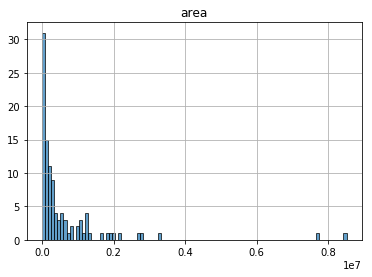

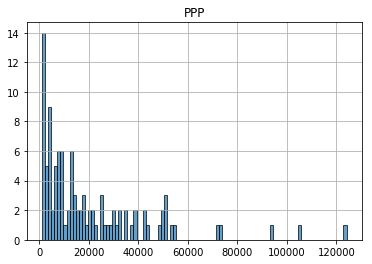

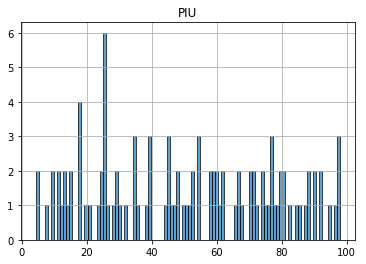

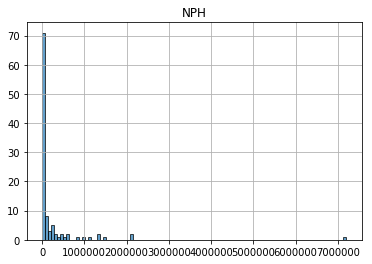

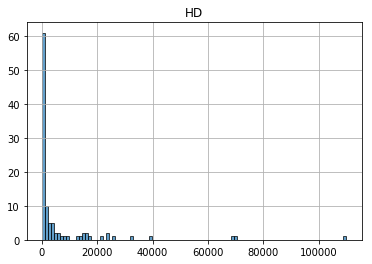

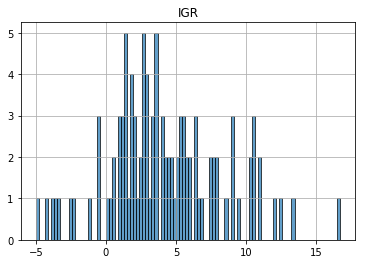

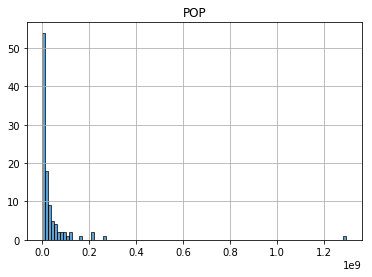

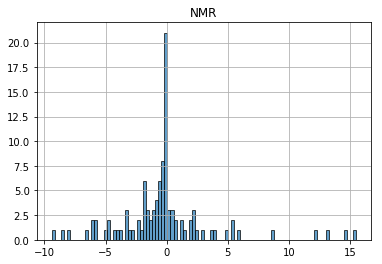

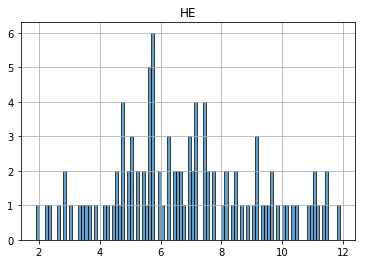

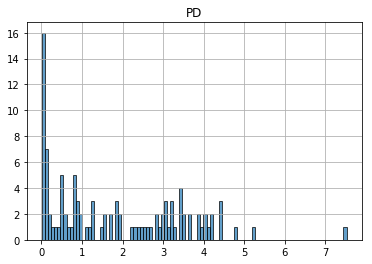

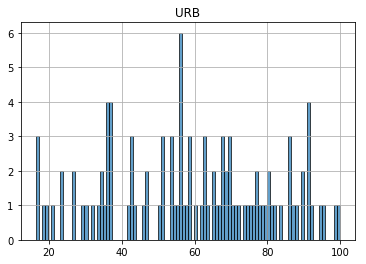

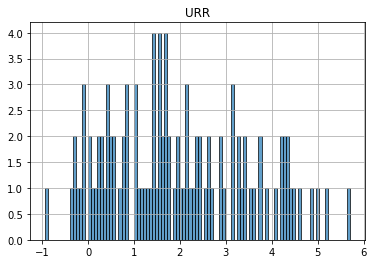

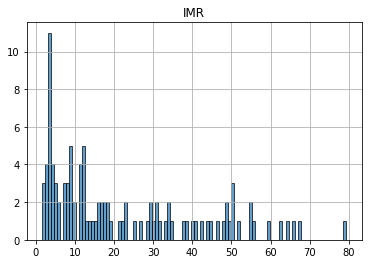

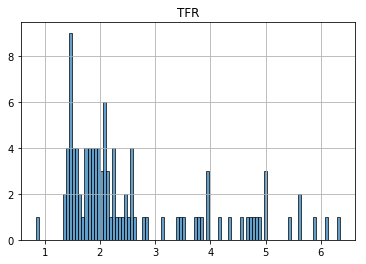

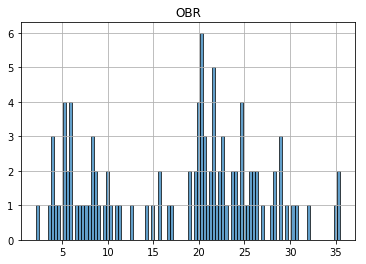

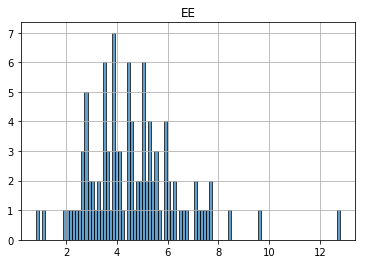

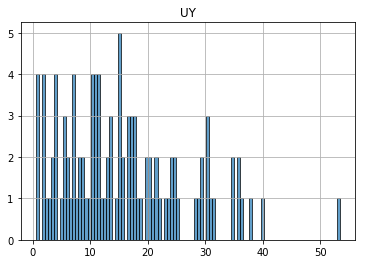

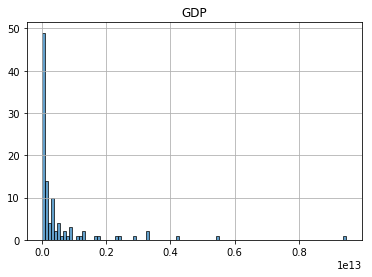

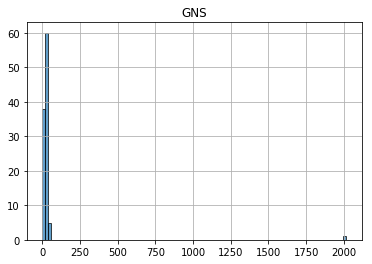

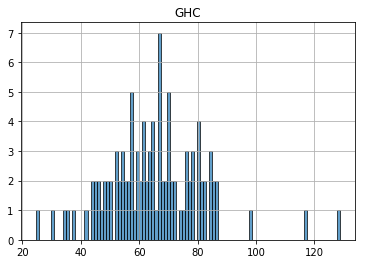

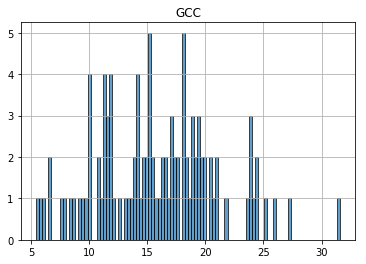

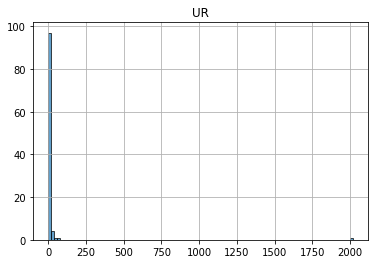

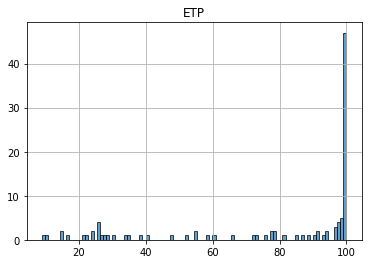

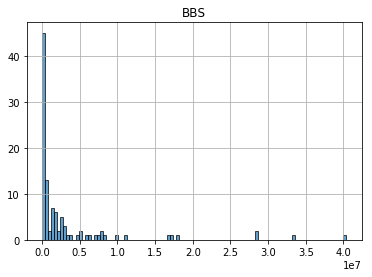

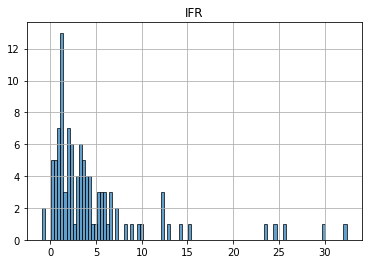

In [33]:
#examine distrubtion of each variable
plt.close('all')
for i in range(0,len(MetaData.columns)):
    MetaData.hist(MetaData.columns[i],bins=100,edgecolor='k',alpha=0.7)

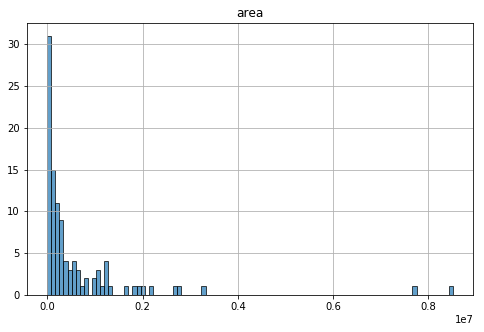

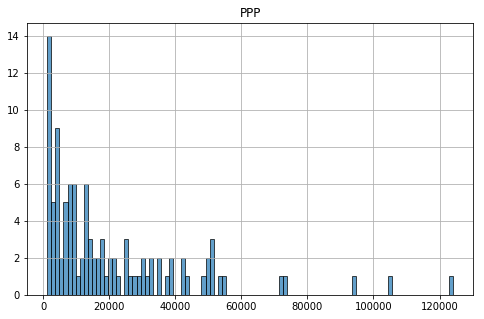

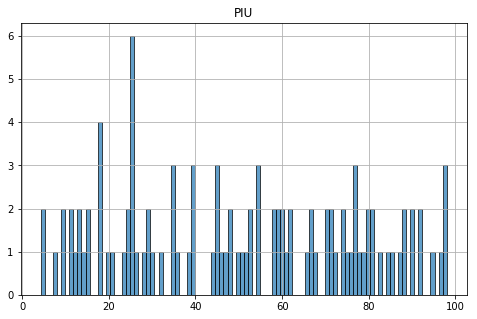

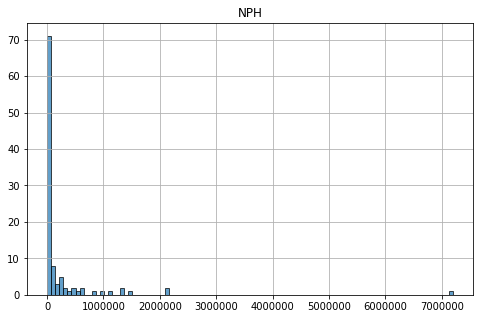

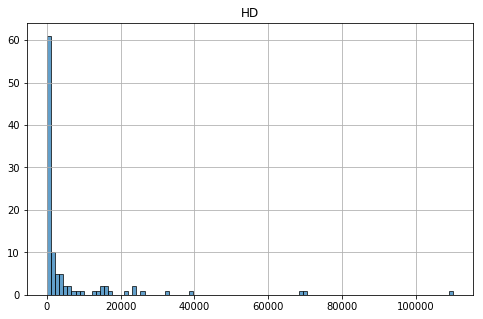

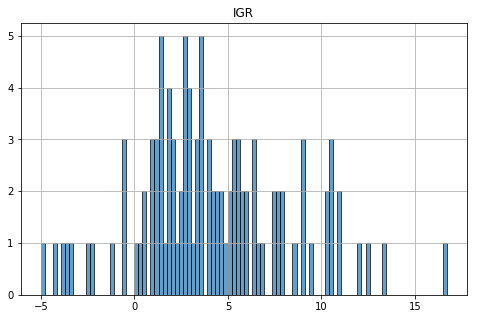

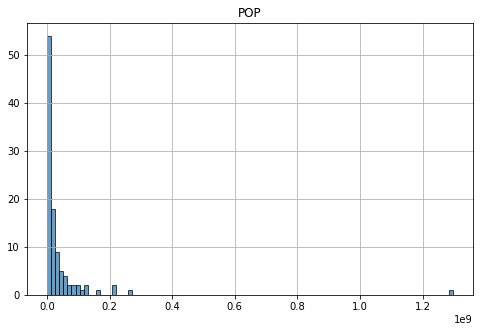

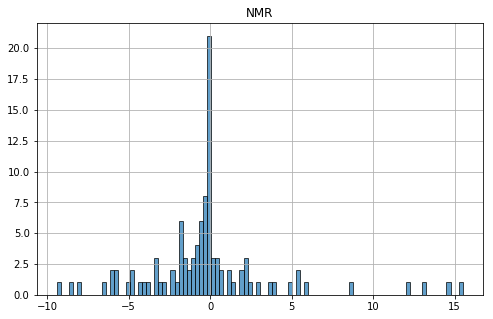

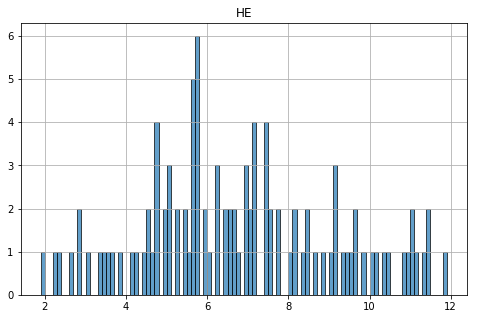

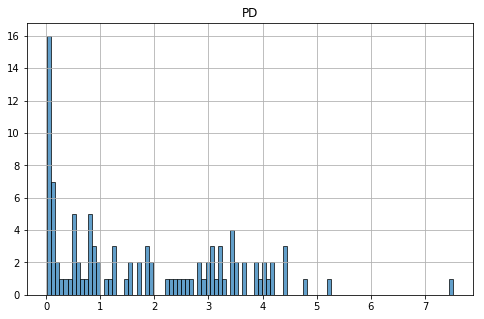

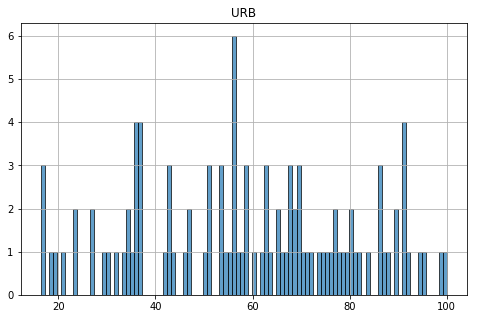

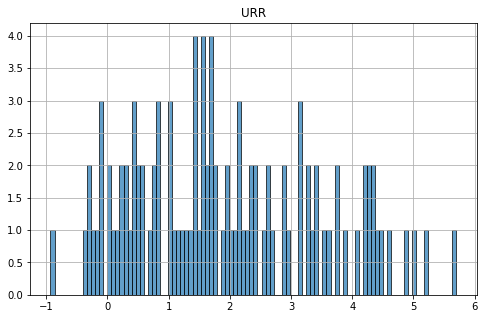

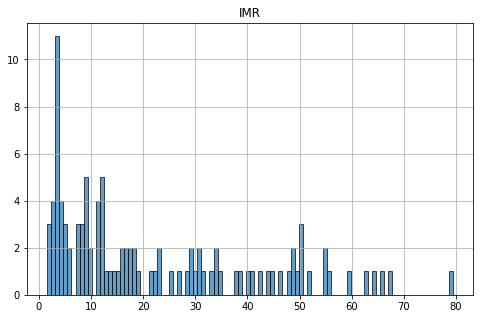

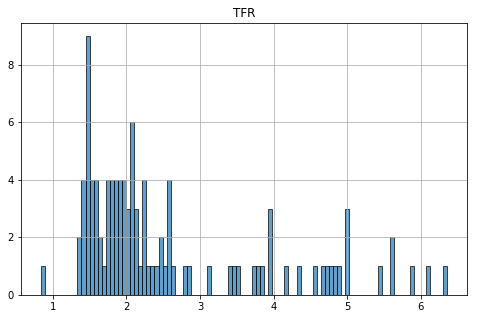

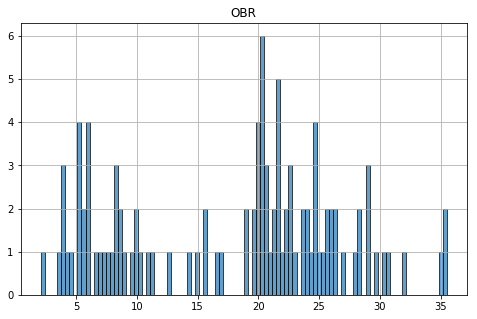

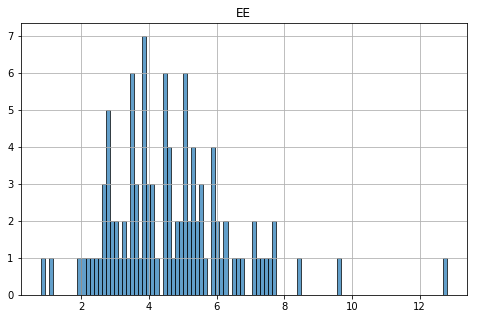

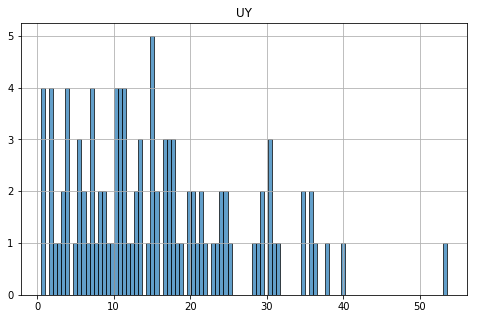

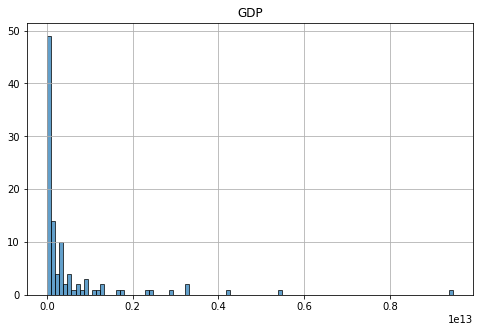

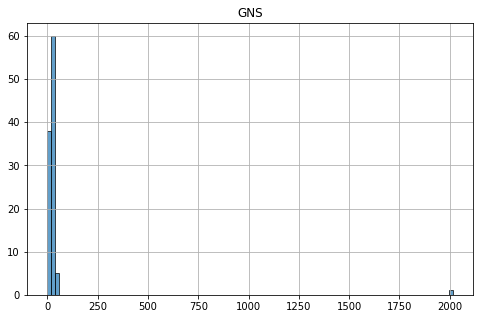

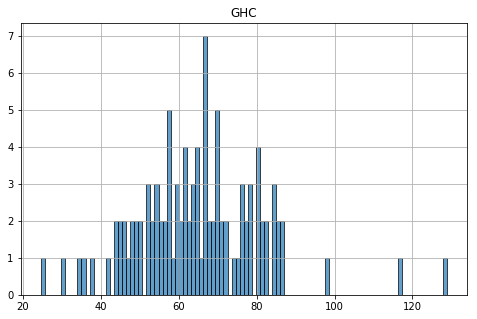

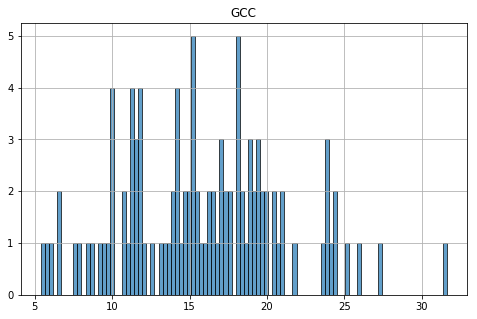

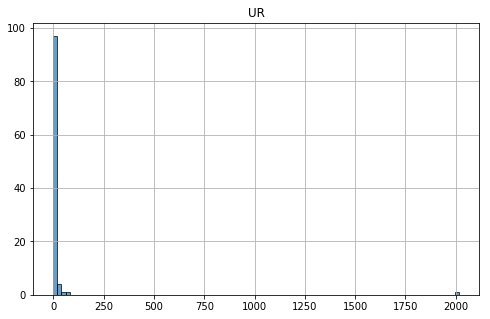

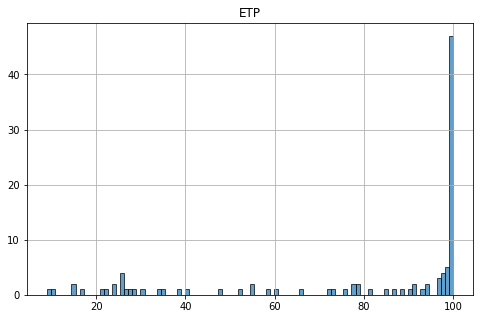

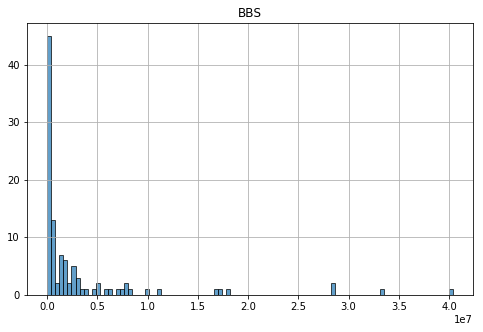

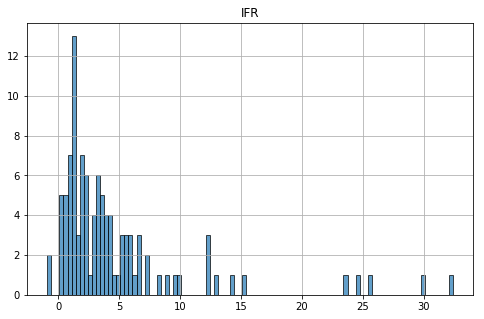

In [34]:
#examine distrubtion of each variable after removing oceans and antarctica from list
plt.close('all')
RemoveAreaInd=MetaData['area']<0.2*10**9 # oceans and antarctica are massive - this threshold removes them
MetaData=MetaData[RemoveAreaInd]

for i in range(len(MetaData.columns)):
    MetaData.hist(MetaData.columns[i],bins=100,figsize=(8,5),edgecolor='k',alpha=0.7)#

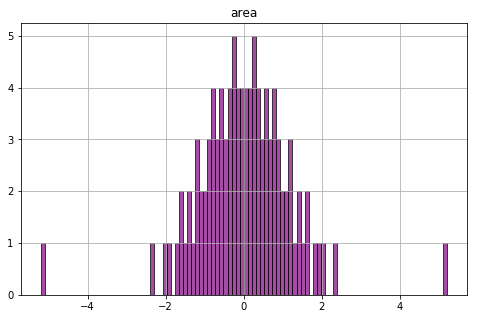

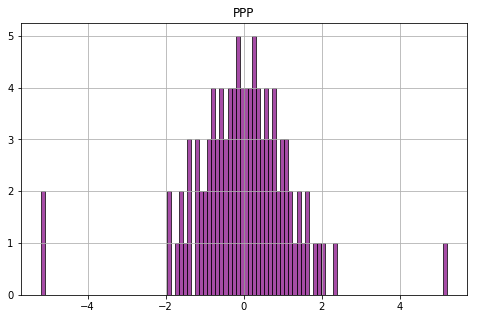

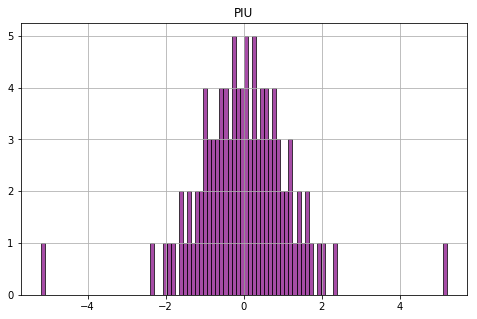

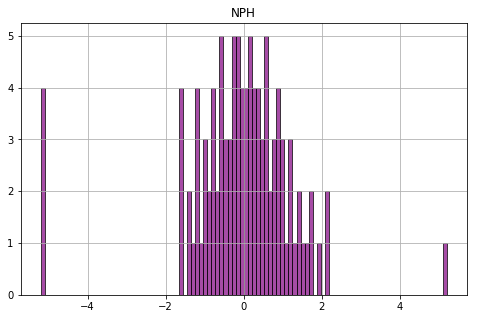

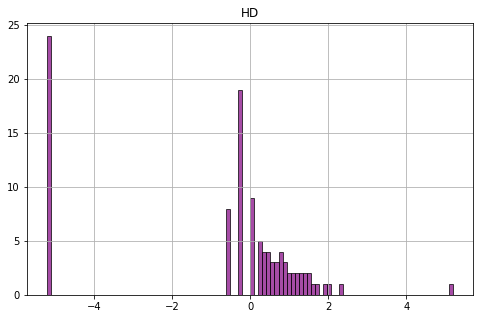

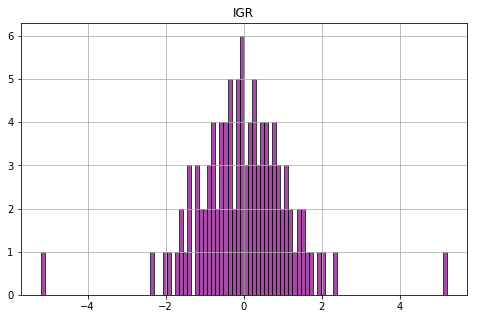

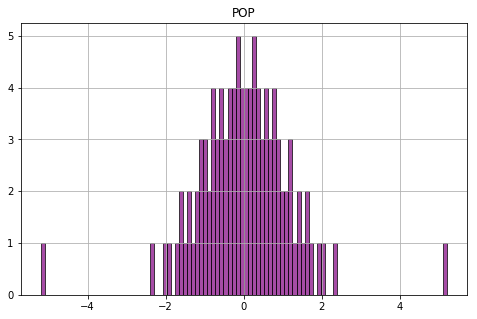

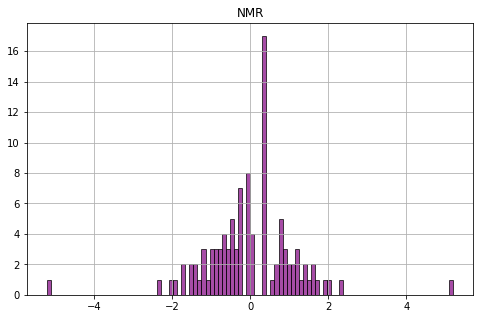

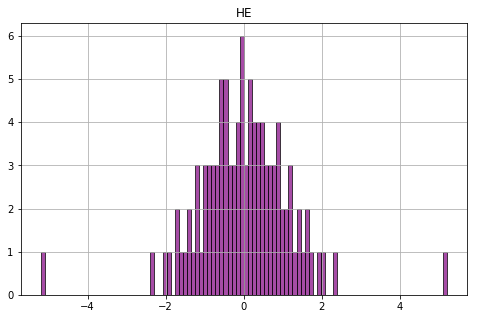

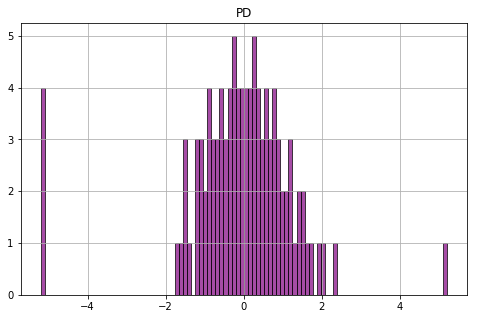

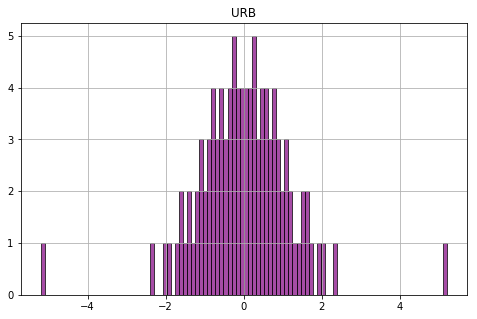

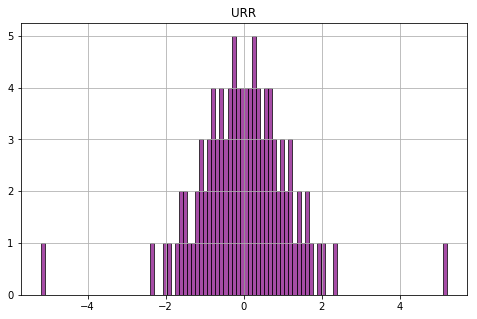

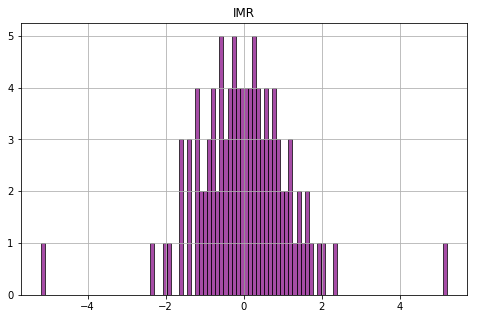

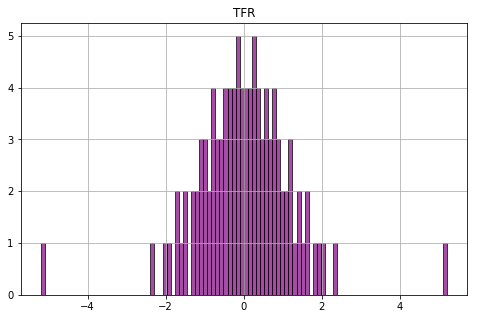

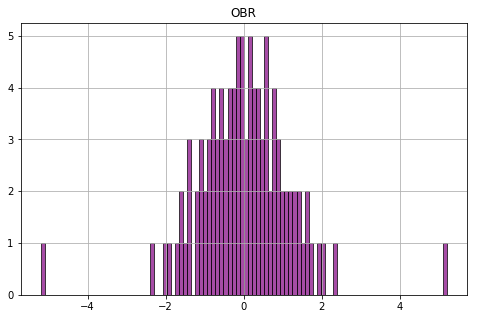

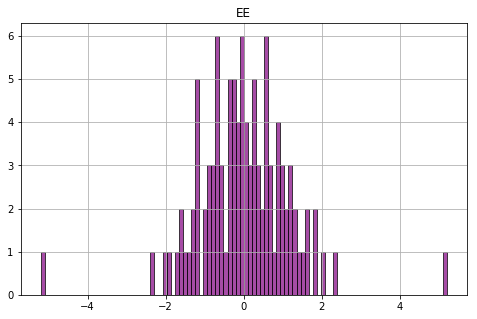

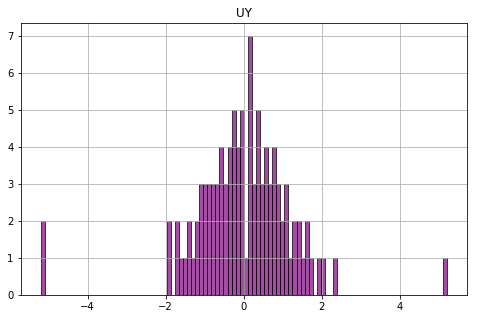

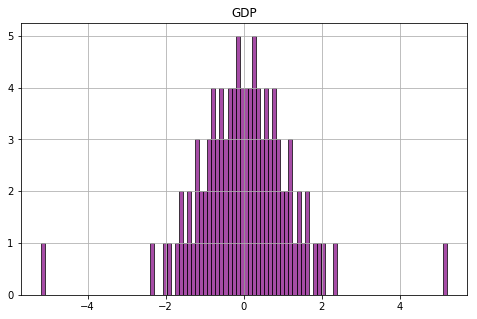

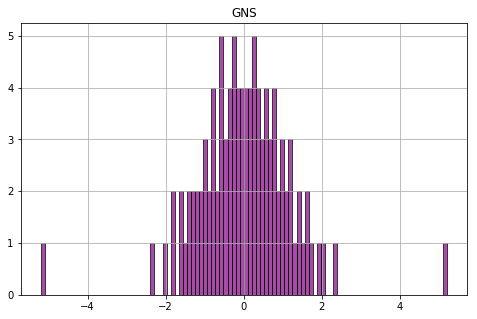

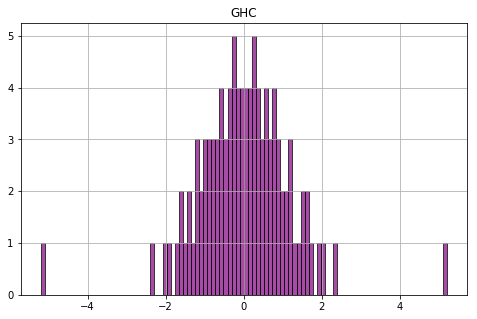

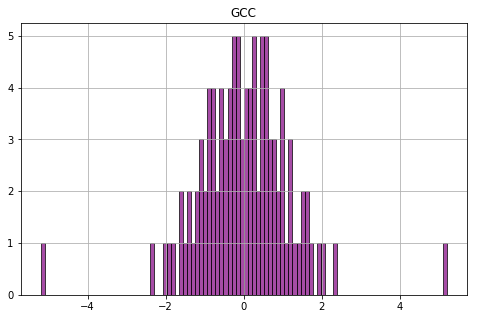

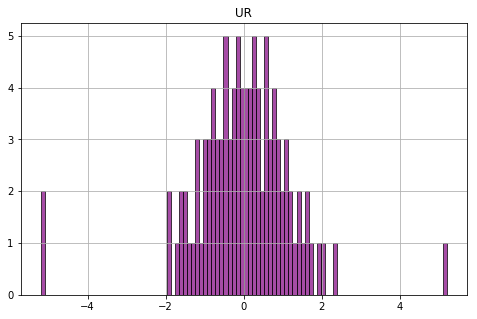

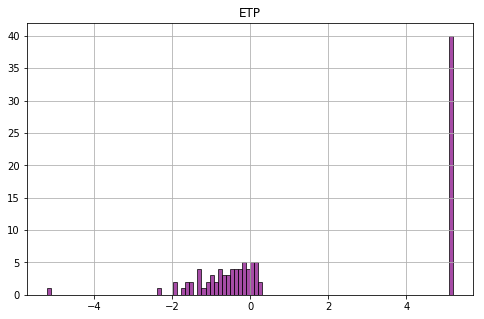

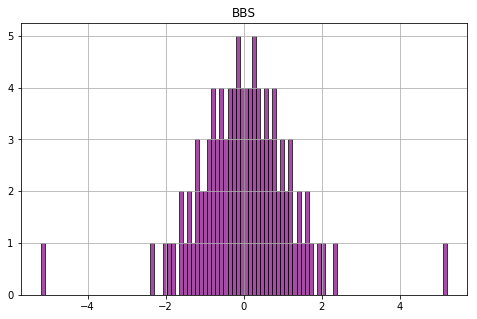

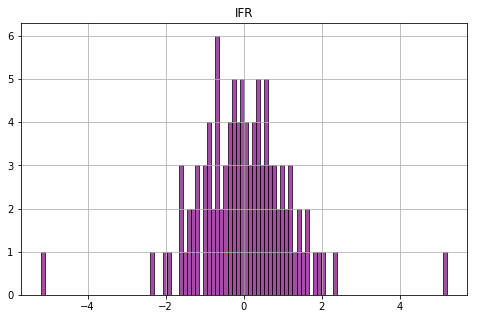

In [35]:
#because many varaibles have log distributions use Quantile tranfornsmation to normalize the dist.
# helps latter and many of the ML assume normal distribution

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
temp = qt.fit(MetaData).transform(MetaData) #can reverse to original scale later with .inversetransform()

MetaDataQT=pd.DataFrame(temp, columns=['area', 'PPP', 'PIU','NPH', 'HD','IGR', 'POP', 'NMR', 'HE', 'PD',
                                        'URB', 'URR', 'IMR', 'TFR', 'OBR', 'EE', 'UY', 'GDP', 'GNS', 
                                        'GHC', 'GCC', 'UR', 'ETP', 'BBS', 'IFR'],index=MetaData.index)
#replot not that the data is on a normal distrubition
plt.close('all')
for i in range(len(MetaDataQT.columns)):
    MetaDataQT.hist(MetaDataQT.columns[i],bins=100,figsize=(8,5),color='purple',edgecolor='k',alpha=0.7)#

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    2.6s remaining:    4.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.9s finished


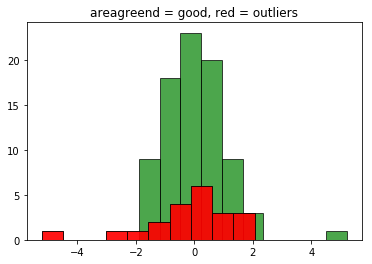

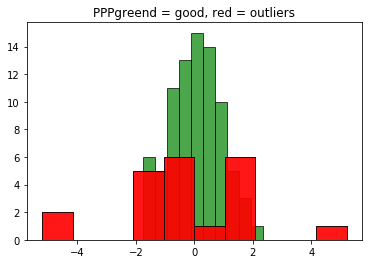

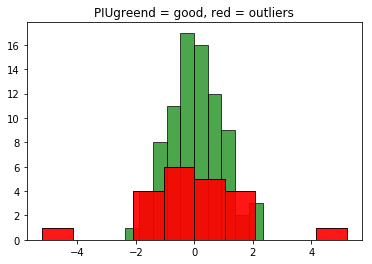

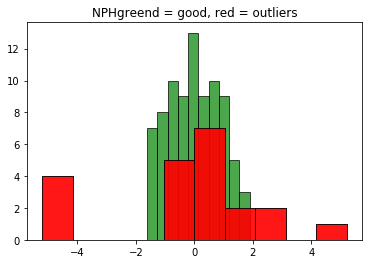

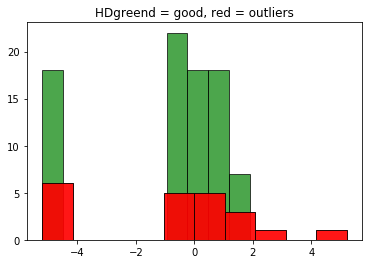

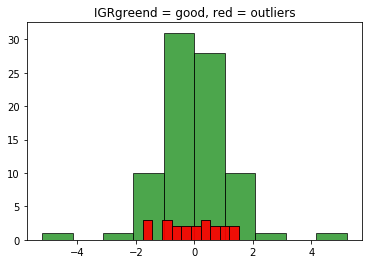

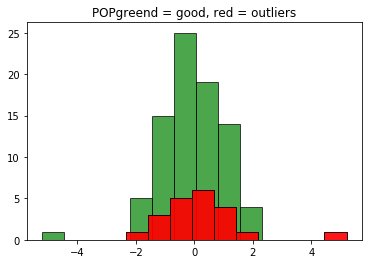

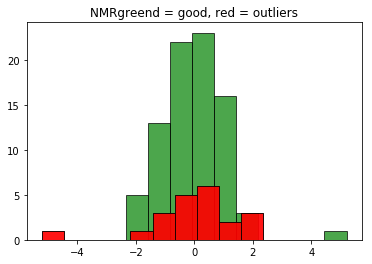

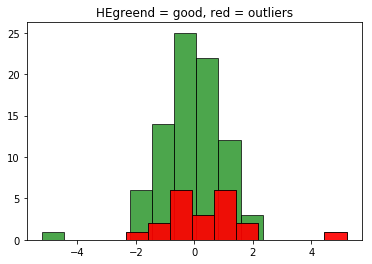

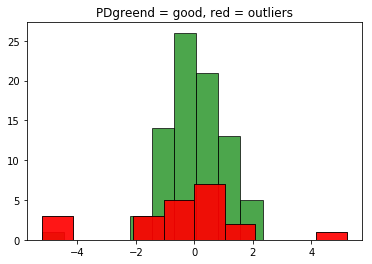

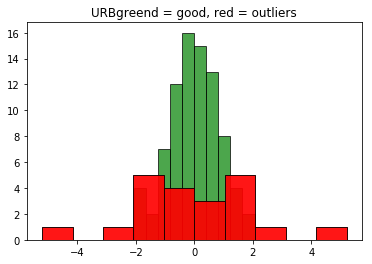

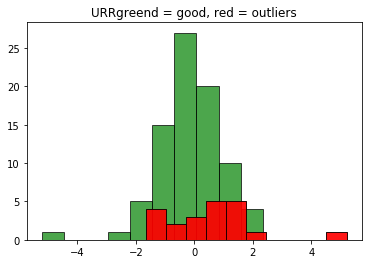

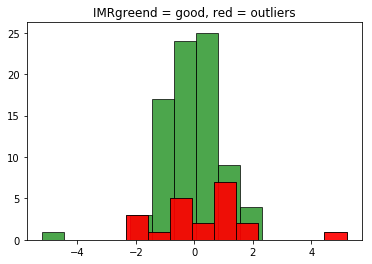

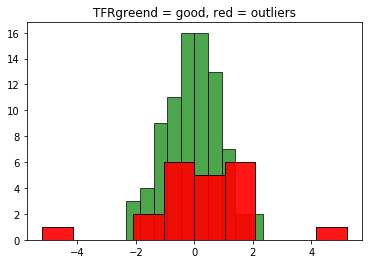

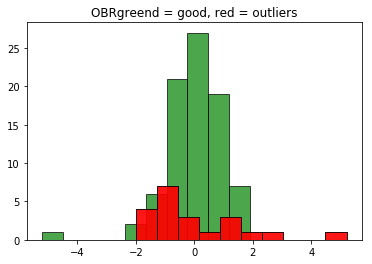

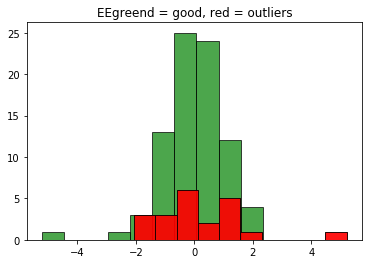

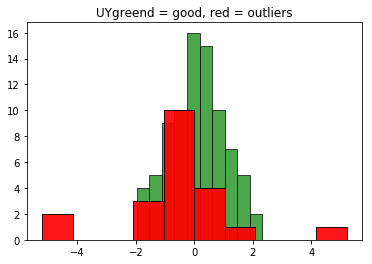

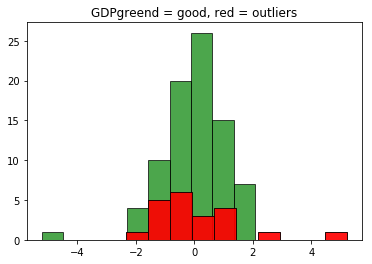

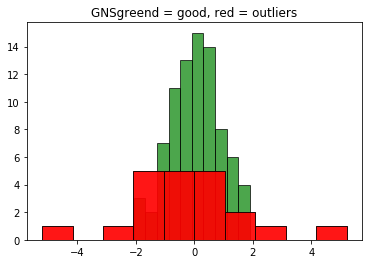

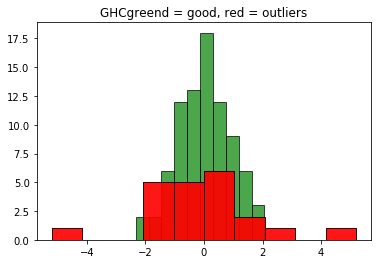

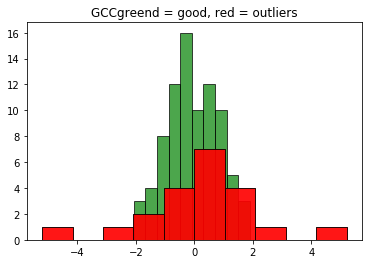

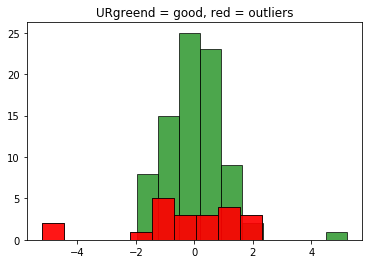

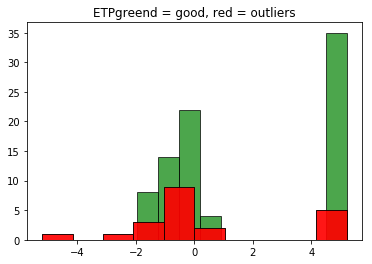

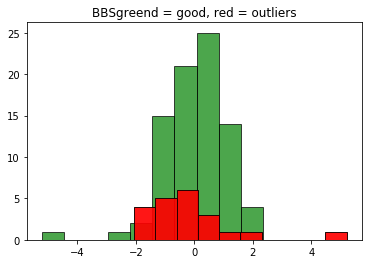

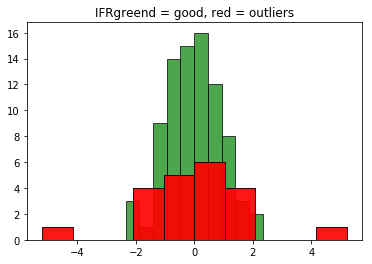

Good outlier detection (red in graphs above) (g = good and so proceed with script)  n
Chose contamination (0-1) or enter threshold to do artifact rejection by hard thresholthreshold
Enter artifact rejection threshold 
 because data is quart normalized only 1 value for both extremes  4


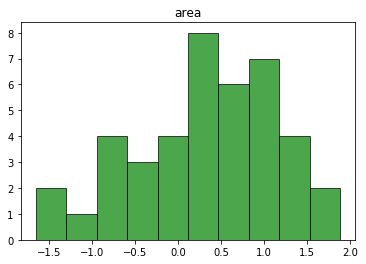

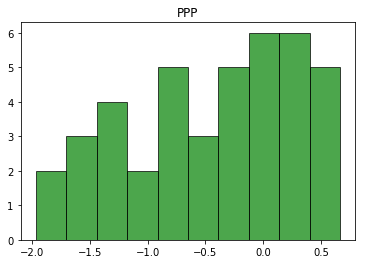

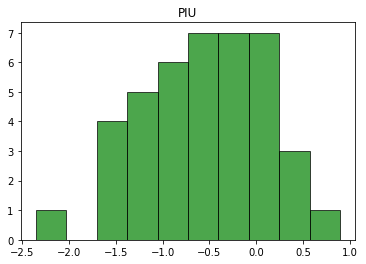

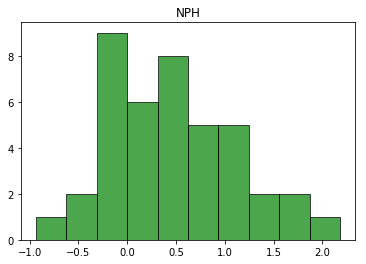

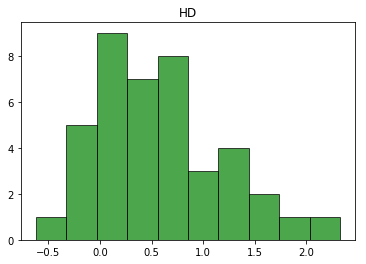

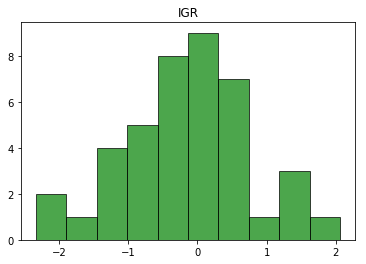

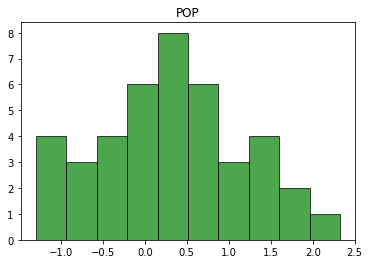

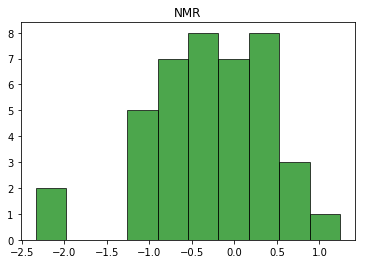

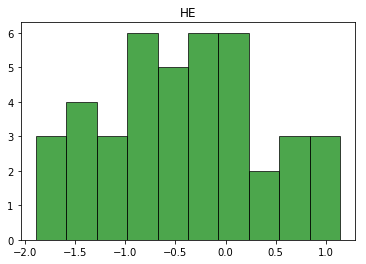

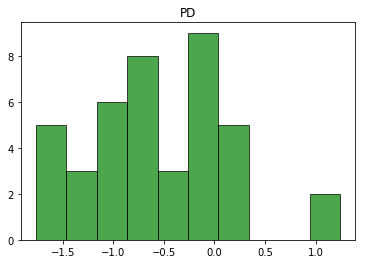

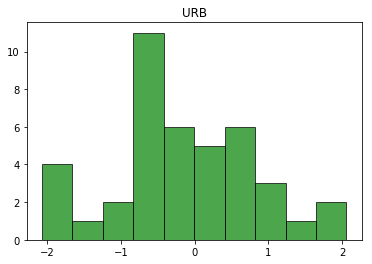

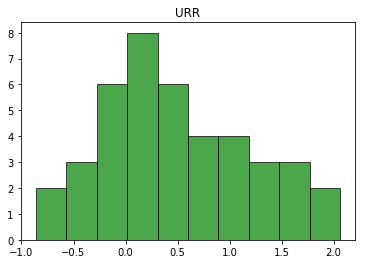

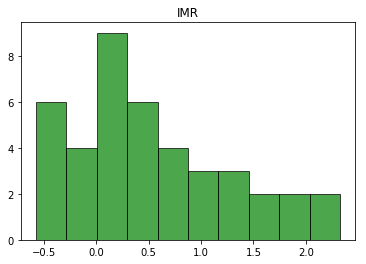

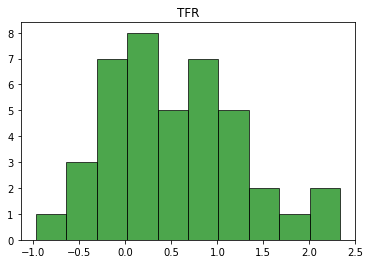

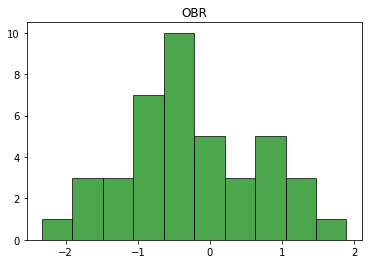

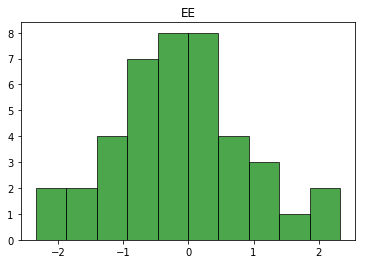

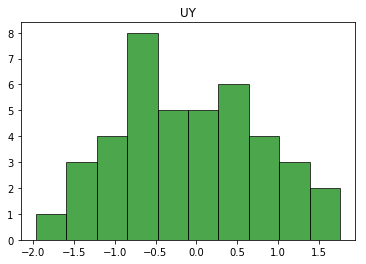

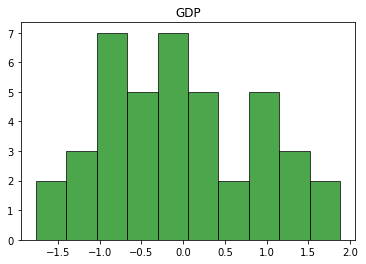

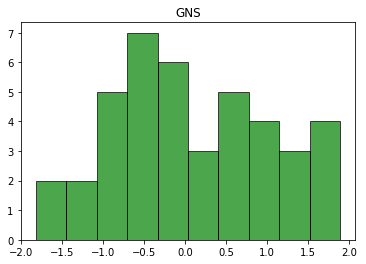

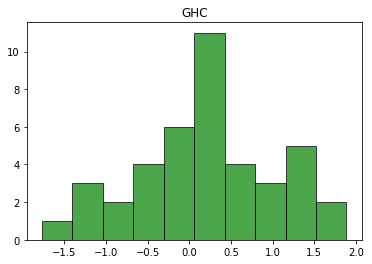

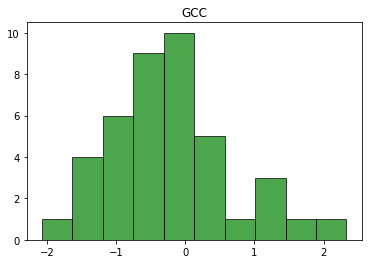

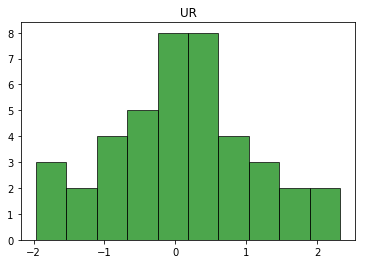

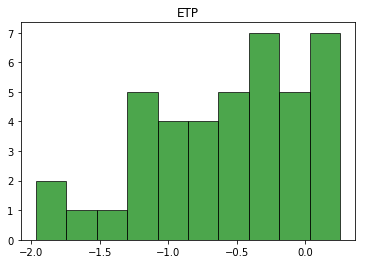

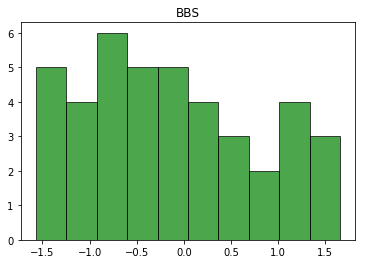

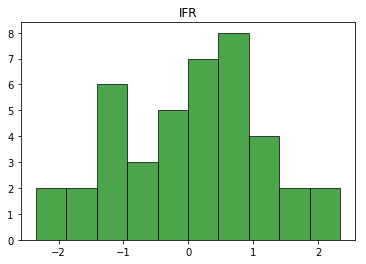

In [36]:
# use and IsolationForest to get outliers - outlier is determined over all factors - and so may produce unexpected
# restults - chose your contamination level - if you can't get a good depiction of outliers the jstu set a standard
# threshold for artifact rejection across metrics (since data is quant normalized only 1 threshold for both
# each extreme within a variable and also acroos variables)
from sklearn.ensemble import IsolationForest
contLev=.2
happyOut=False

while happyOut==False:
    iso=IsolationForest(max_features=1.0, n_jobs=5, behaviour="new", verbose=1,contamination= contLev) # do over 5 cores
    iso.fit(MetaDataQT)
    outlierInd=iso.decision_function(MetaDataQT) # outliers are labelled wirth -1

    AllClean=MetaDataQT[(outlierInd>=0)]
    OutlierData=MetaDataQT[(outlierInd<0)]

    #plot the good (green) and outlier (red) data
    for i in range(0,len(AllClean.columns)):
        plt.figure(i)
        plt.title(AllClean.columns[i] + "greend = good, red = outliers")
        plt.hist(AllClean[AllClean.columns[i]],bins=10,color='green',edgecolor='k',alpha=0.7)#cleandata
        plt.hist(OutlierData[OutlierData.columns[i]],bins=10,color='red',edgecolor='k',alpha=0.7)#cleandata
        plt.hist(OutlierData[OutlierData.columns[i]],bins=10,color='red',edgecolor='k',alpha=0.7)#cleandata
        plt.show()
    HappyQ=raw_input("Good outlier detection (red in graphs above) (g = good and so proceed with script)  ")
    if HappyQ == "g":
        happyOut = True
    elif HappyQ == "G":
        happyOut = True 
    else:             
        NQ=raw_input("Chose contamination (0-1) or enter threshold to do artifact rejection by hard threshol")
        if NQ == "threshold":
            #set a threshold         
            ThresholdLevel=float(raw_input("Enter artifact rejection threshold " +
                                 "\n because data is quart normalized only 1 value for both extremes  "))
            AllClean=MetaDataQT[(MetaDataQT>-ThresholdLevel) &  (MetaDataQT<ThresholdLevel)]
            OutlierData=MetaDataQT[(MetaDataQT<-ThresholdLevel) | (MetaDataQT>ThresholdLevel)]

            AllClean.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
            OutlierData.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
             
            # plot only the good data, as you know what the bad data is         
            for i in range(0,len(AllClean.columns)):
                plt.figure(i)
                plt.title(AllClean.columns[i])
                plt.hist(AllClean[AllClean.columns[i]],bins=10,color='green',edgecolor='k',alpha=0.7)#cleandata
            
            happyOut = True 
        else:
             #chose a new contamination level for the isolationforest
            contLev=float(NQ)

In [38]:
#pick which variable you want to target
input_Str="which target varible - choses are u'...' '", AllClean.columns
targetDataName=raw_input(input_Str)
print "target variable selected is " + targetDataName
y=AllClean[AllClean.columns[AllClean.columns==targetDataName]]
X=AllClean[AllClean.columns[AllClean.columns!=targetDataName]]

("which target varible - choses are u'...' '", Index([u'area', u'PPP', u'PIU', u'NPH', u'HD', u'IGR', u'POP', u'NMR', u'HE',
       u'PD', u'URB', u'URR', u'IMR', u'TFR', u'OBR', u'EE', u'UY', u'GDP',
       u'GNS', u'GHC', u'GCC', u'UR', u'ETP', u'BBS', u'IFR'],
      dtype='object'))EE
target variable selected is EE


/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


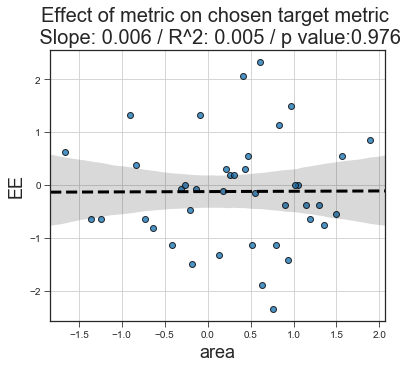

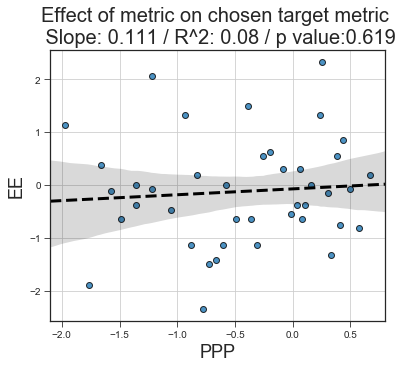

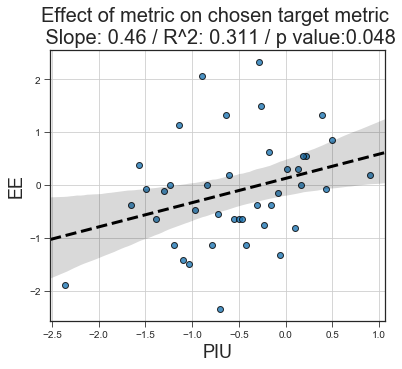

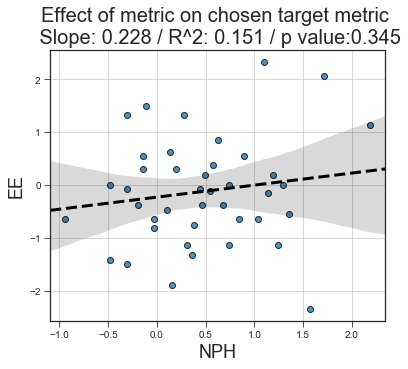

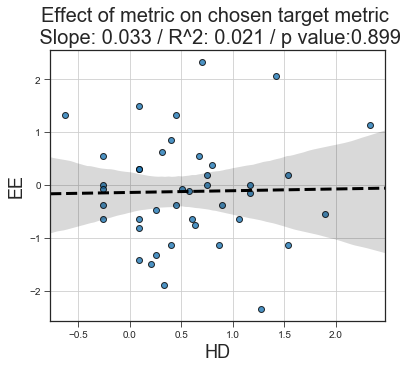

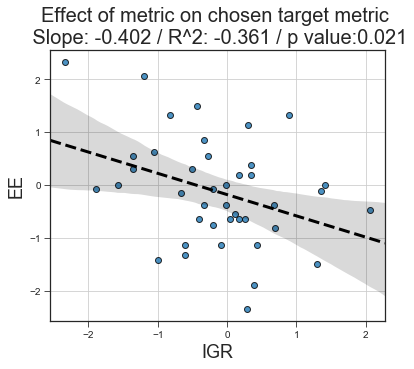

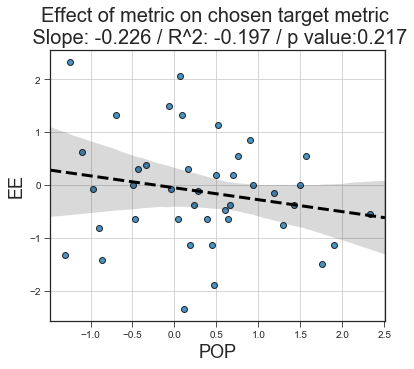

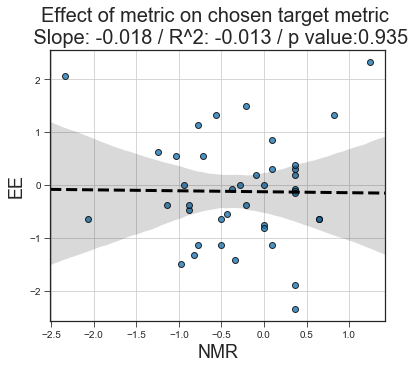

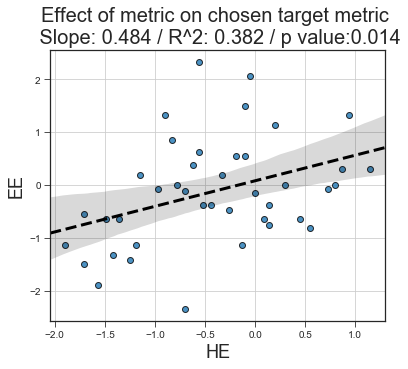

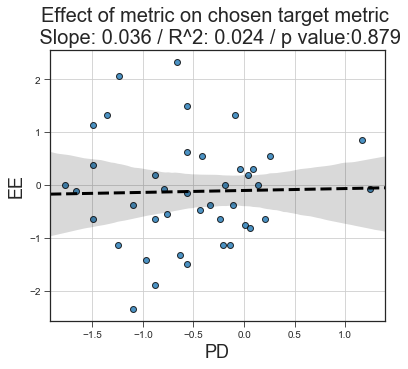

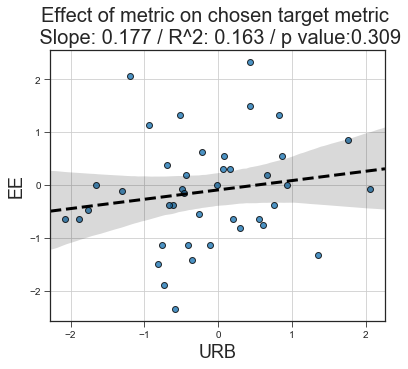

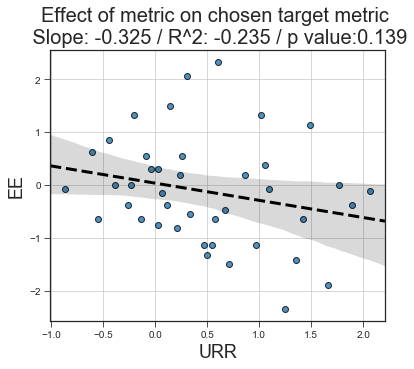

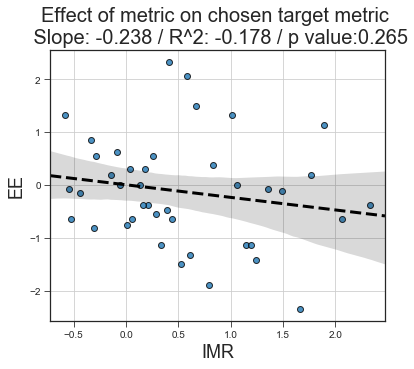

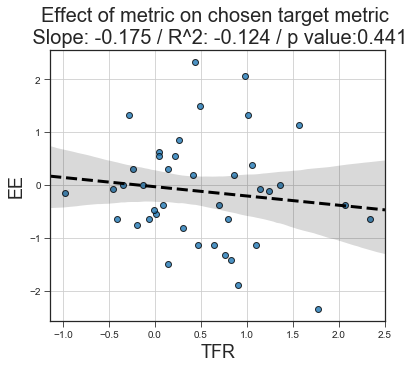

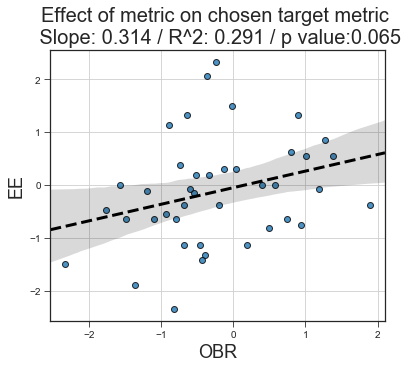

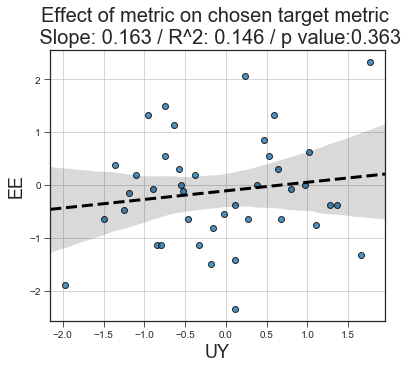

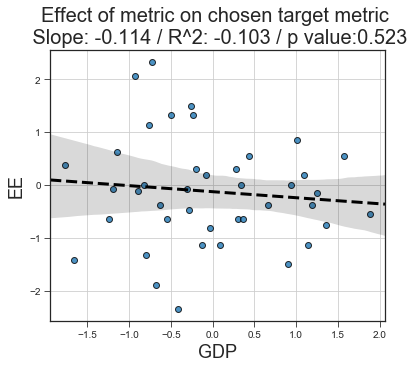

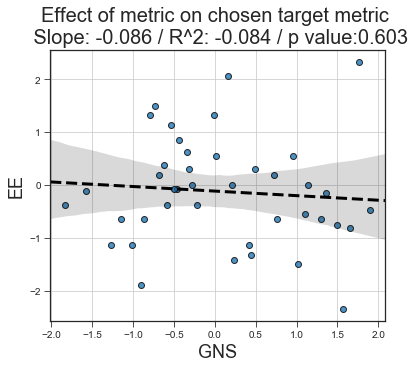

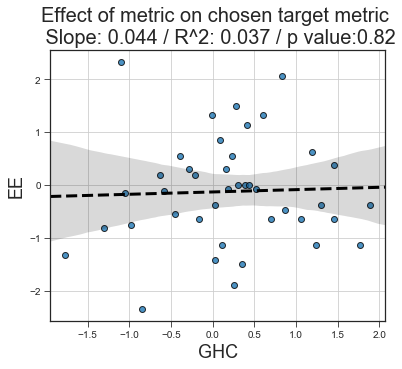

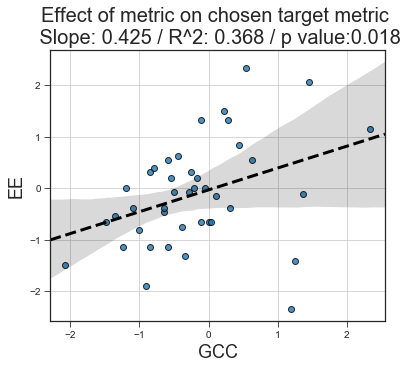

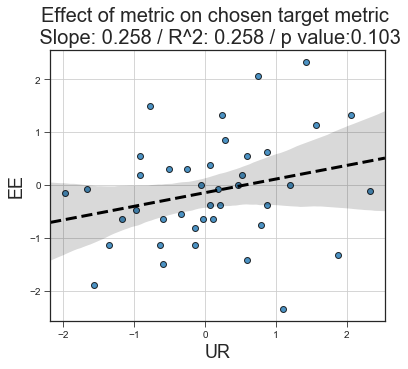

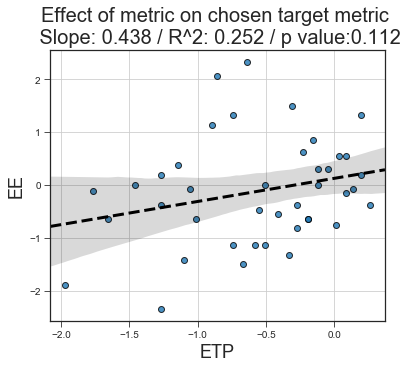

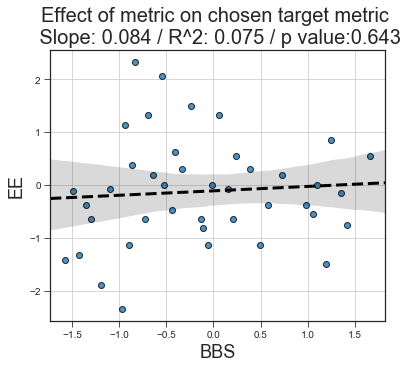

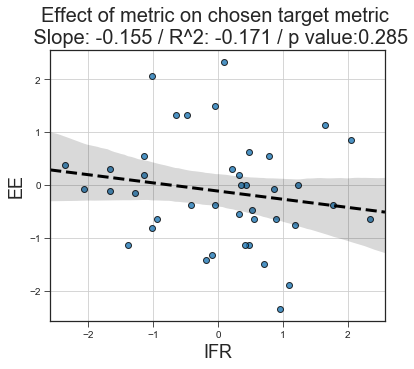

In [39]:
# show how each factor accounts for variance in target variable
# produce linear regressions as well scatter for for all X[i] to Y combinations

import seaborn as sns
from scipy.stats import linregress
sns.set_style('ticks')

y_array = y[y.columns[0]] #get list of Y data

for c in range(0,len(X.columns)):
    x_array = X[X.columns[c]] #get list of X[i] data
    
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.set_xlabel(X.columns[c],fontsize=18)
    ax.set_ylabel(y.columns,fontsize=18)
    slope,intercept,rvalue,pvalue,stderr = linregress(x_array,y_array)
    s="Effect of metric on chosen target metric \n Slope: " + str(round(slope,3)) + " / R^2: " + str(round(rvalue,3)) + " / p value:" + str(round(pvalue,3))
    #s="Effect of metric on \n", "Slope: " + str(round(slope,3)) + " / R^2: " + str(round(rvalue,3)) + " / p value:" + str(round(pvalue,3))
    ax.set_title(s,fontsize=20)
    fig.set_size_inches(6, 5)
    g=sns.regplot(data=MetaData,x=x_array,y=y_array,ax=ax,
                  line_kws={'ls':'--','linewidth':3,'color':'k'},
                  scatter_kws={'edgecolor':'k'})
    plt.show()

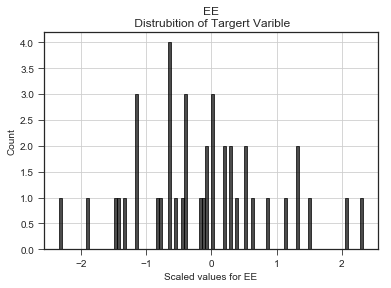

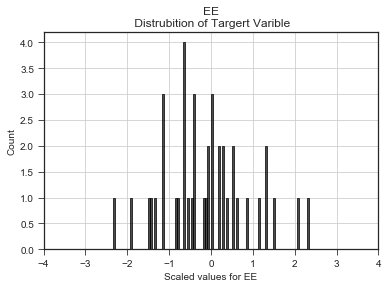

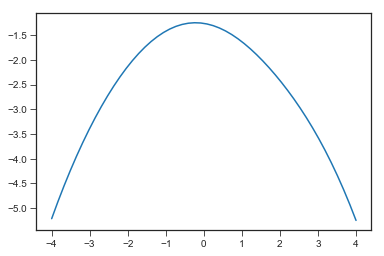

Good band witdh (g=proceed)? Current bandwidth is 1.0  n
Pick a band width .15


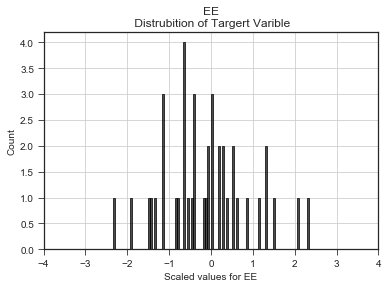

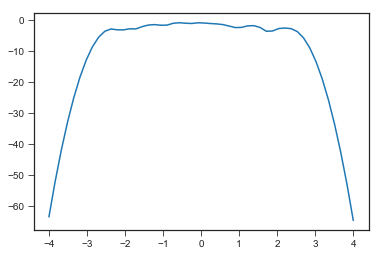

Good band witdh (g=proceed)? Current bandwidth is 0.15  n
Pick a band width .29


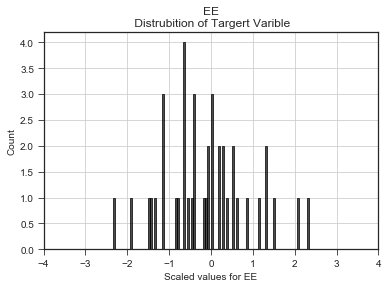

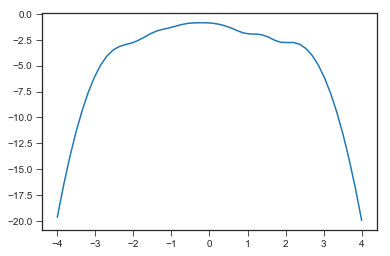

Good band witdh (g=proceed)? Current bandwidth is 0.29  n
Pick a band width .282


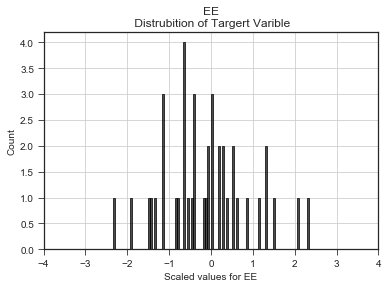

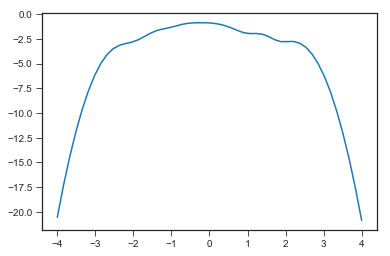

Good band witdh (g=proceed)? Current bandwidth is 0.282  g


In [41]:
# get cluster within target variable
# use KernelDensity to pick out clusters of density of y
# then assign each value y to its cluster and output e - a line plot of the density function
# basically adjust bandwidth till you see the local maxs you want

y.hist(bins=100,color='black',edgecolor='k',alpha=0.7)#cleandata
plt.ylabel('Count')
plt.xlabel('Scaled values for ' + targetDataName)
plt.title(targetDataName + "\n Distrubition of Targert Varible")
plt.show()

from sklearn.neighbors.kde import KernelDensity
from numpy import linspace

bandWSelect=1.0
happyband=False

while happyband==False:
    y.hist(bins=100,color='black',edgecolor='k',alpha=0.7)#cleandata
    plt.xlim((int(y.min())*2,int(y.max())*2))
    plt.ylabel('Count')
    plt.xlabel('Scaled values for ' + targetDataName)
    plt.title(targetDataName + "\n Distrubition of Targert Varible")
    plt.show()

    kde = KernelDensity(kernel='gaussian', bandwidth=bandWSelect).fit(y)
    s = linspace(int(y.min())*2,int(y.max())*2)
    e = kde.score_samples(s.reshape(-1,1))
    plt.plot(s, e)
    plt.show()
    goodQ=raw_input("Good band witdh (g=proceed)? Current bandwidth is " + str(bandWSelect) + "  ")
    if goodQ == "g":
        happyband=True
    elif goodQ=="G":
        happyband=True
    else:
        bandWSelect=float(raw_input("Pick a band width "))        

In [43]:
# find local max and mins from kernel density function of y function above
#assign each y to it's corresponding cluster and output as yCats
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less), argrelextrema(e, np.greater)

SeperateInd=s[mi].tolist()
SeperateInd.append(s[-1]*1.1)

yCats=y.copy()
yCats[:]=0

if s[ma].size==1:
    print "only 1 peak - all points = cluster 1"
    yCats[yCats.columns]=1
else:
    yCats[y.values<SeperateInd[0]]=1
    # ? how do you do thins a list comphrension
    #(yCats[(y>SeperateInd[CurrInd-1]) &  (y<SeperateInd[CurrInd])]=CurrInd+1  for CurrInd in range(1,len(SeperateInd)))
    for CurrInd in range(1,len(SeperateInd)):
        yCats[(y>SeperateInd[CurrInd-1]) &  (y<SeperateInd[CurrInd])]=CurrInd+1

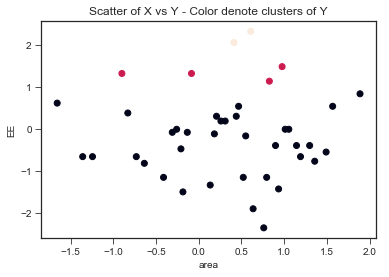

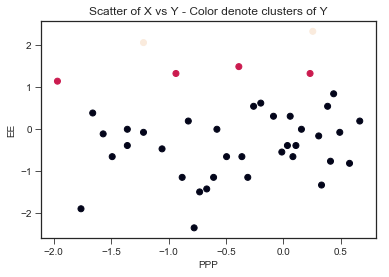

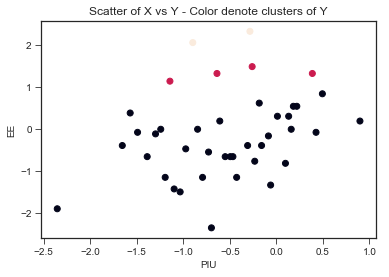

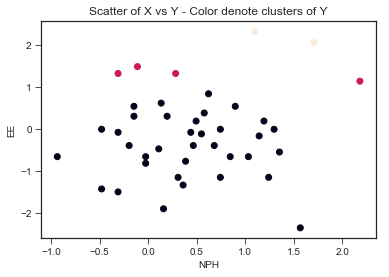

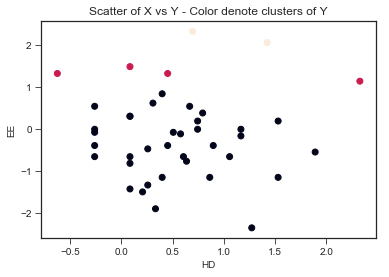

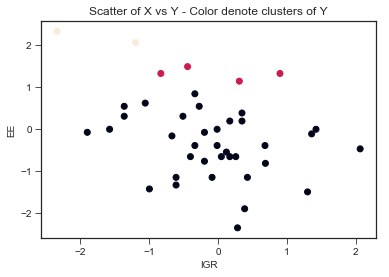

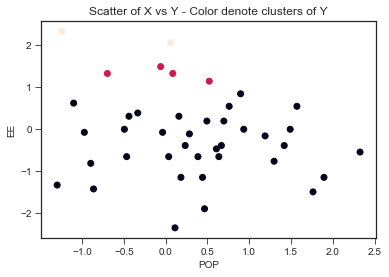

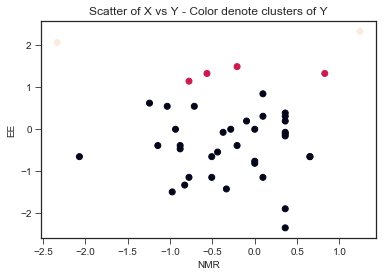

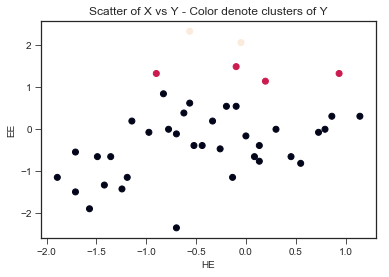

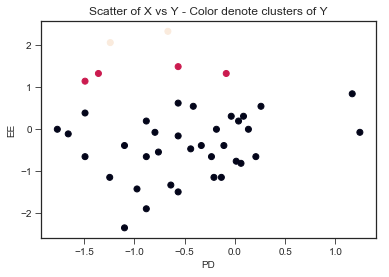

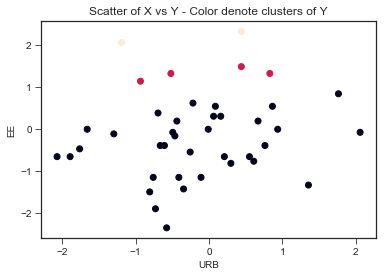

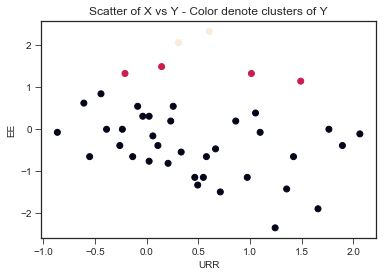

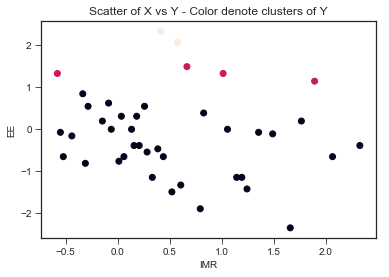

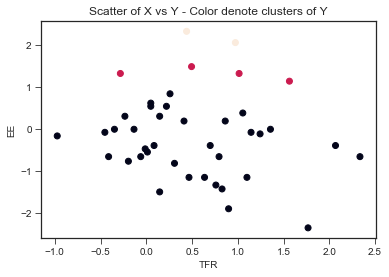

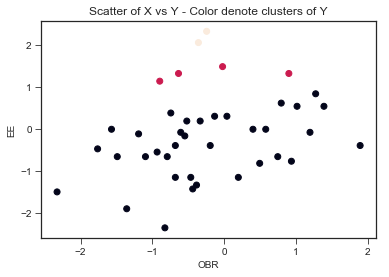

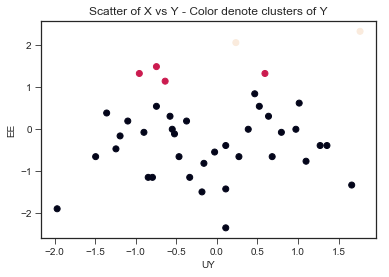

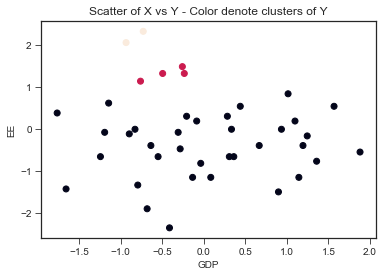

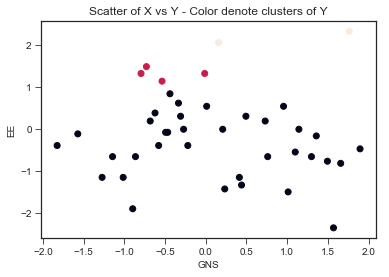

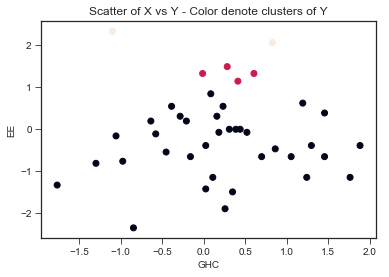

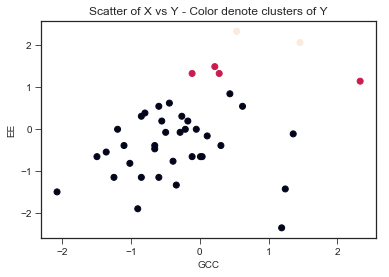

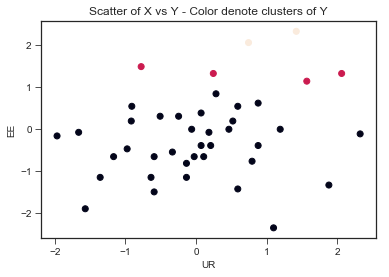

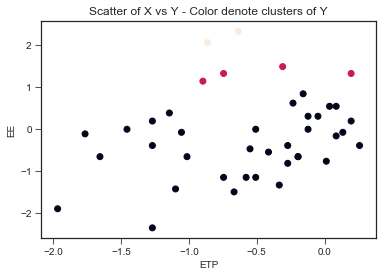

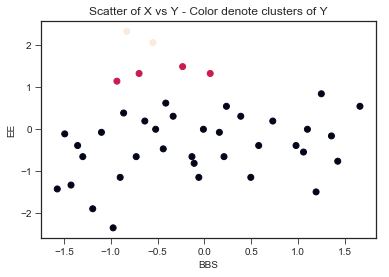

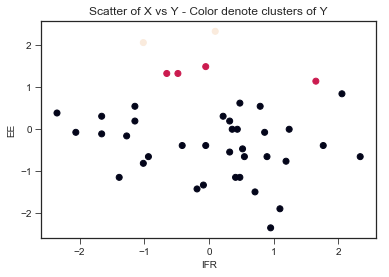

In [44]:
# plot x[i] versus y - with points colored by y cluster - sanity check
for c in range(0,len(X.columns)):
    plt.scatter(X.values[:, [c]], y.values[:], c=yCats.values)
    plt.xlabel(X.columns[c])
    plt.ylabel(y.columns[0])
    plt.title("Scatter of X vs Y - Color denote clusters of Y")
    plt.show()

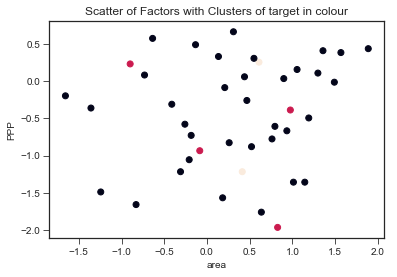

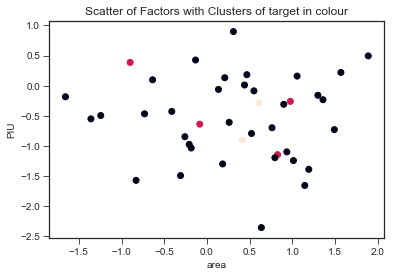

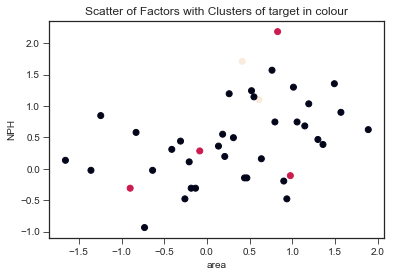

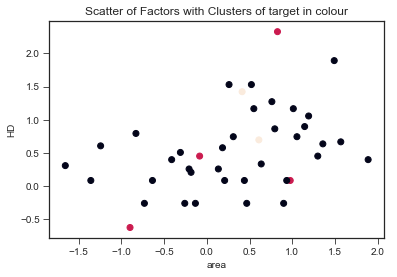

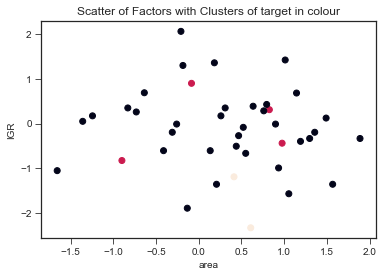

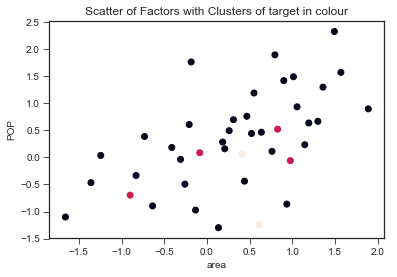

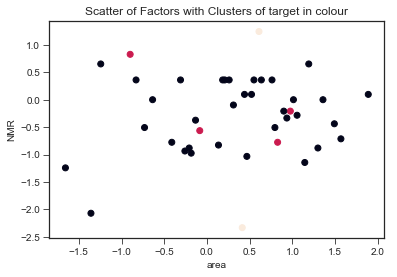

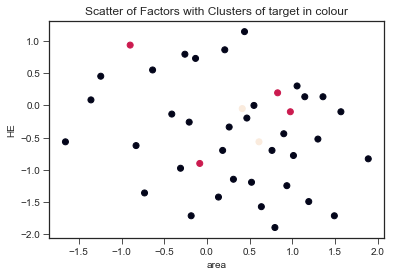

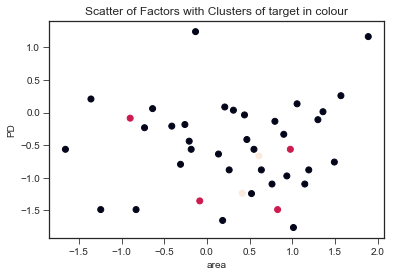

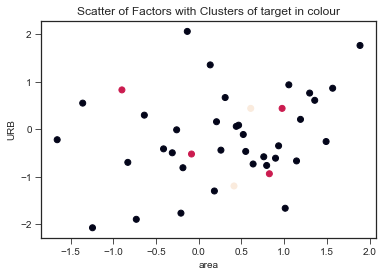

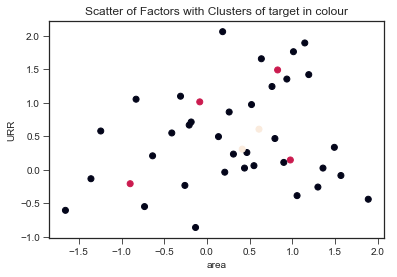

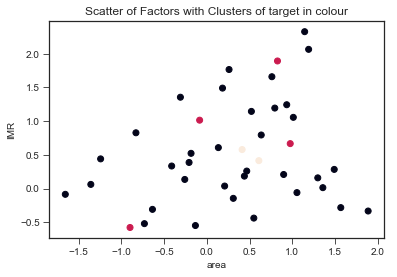

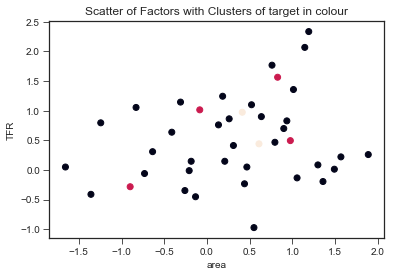

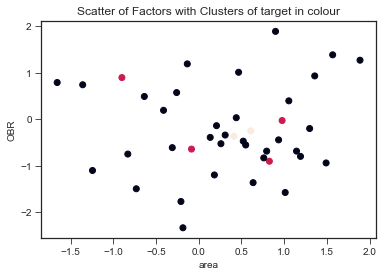

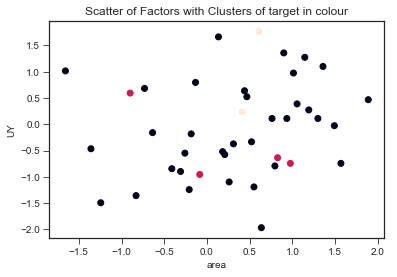

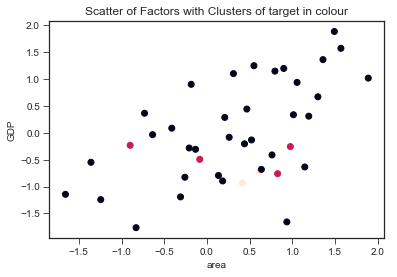

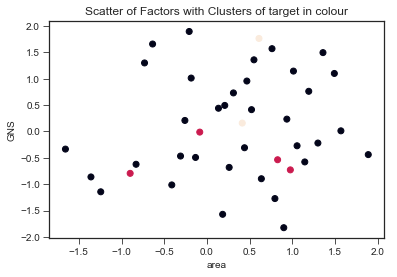

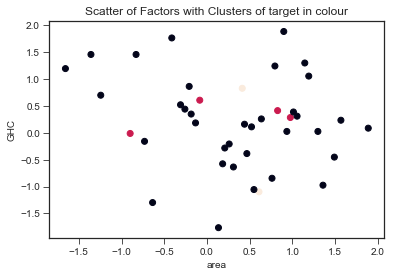

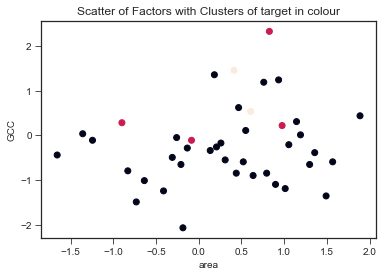

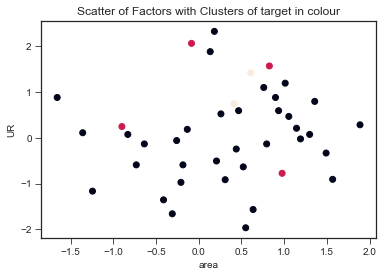

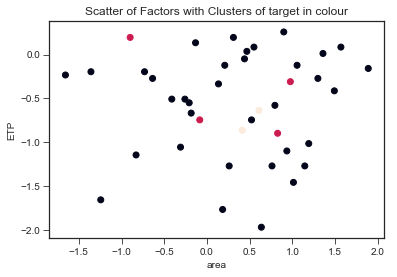

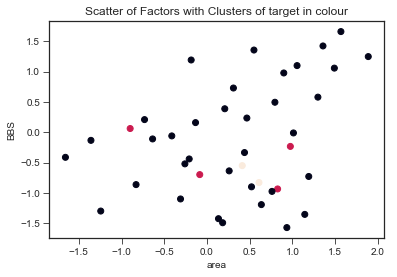

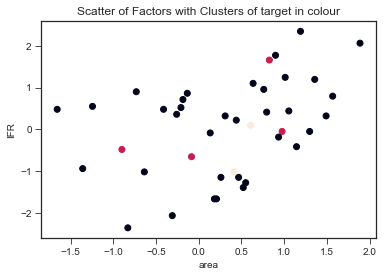

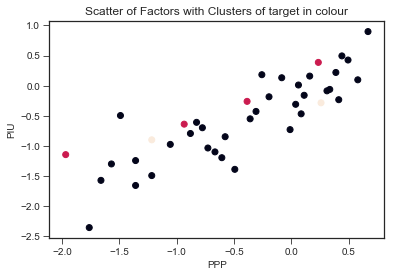

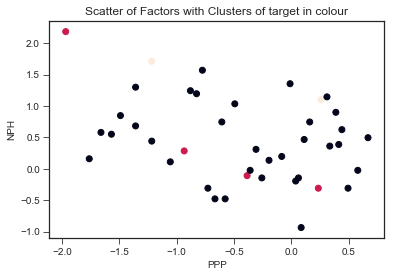

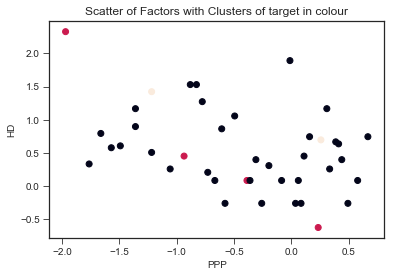

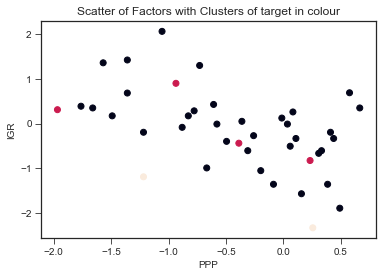

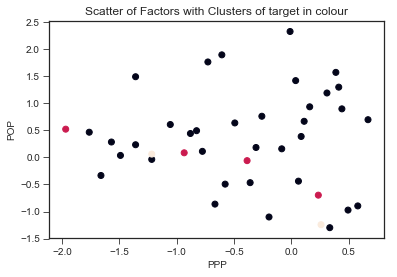

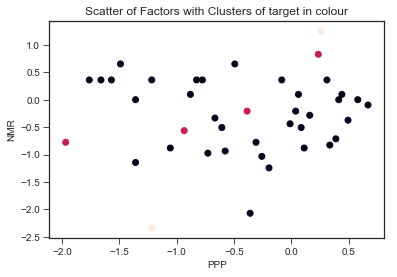

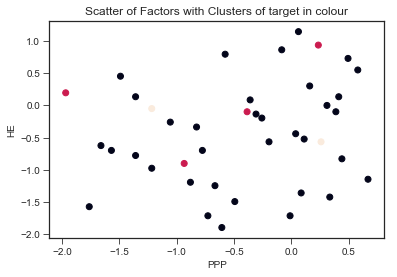

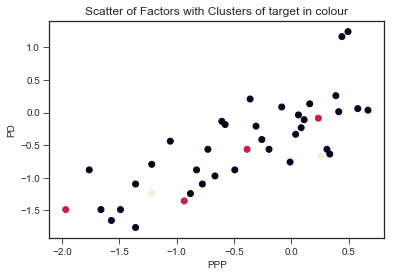

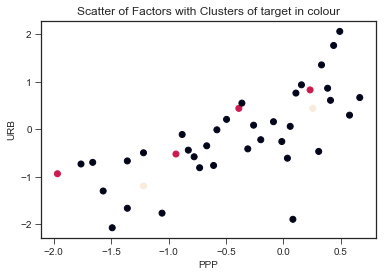

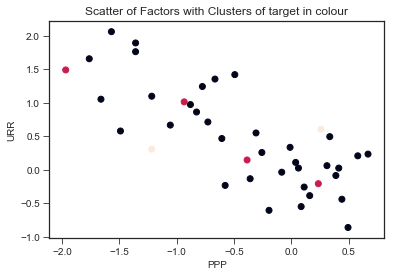

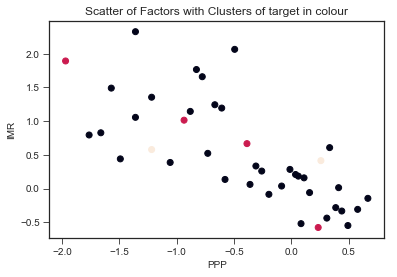

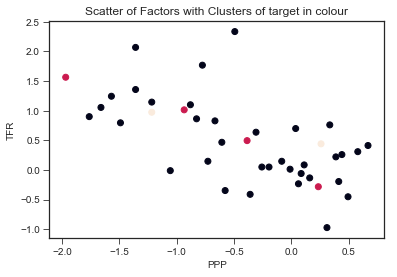

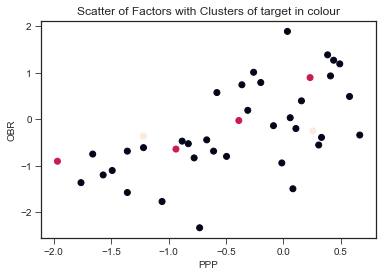

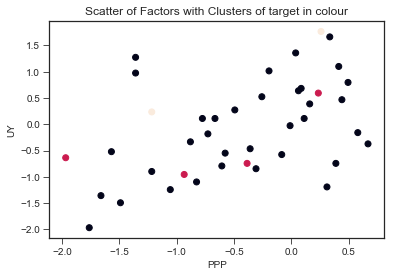

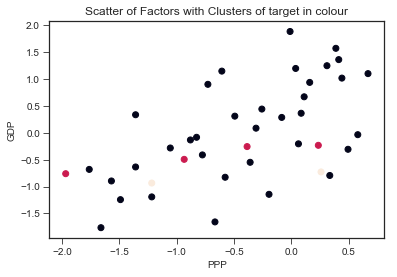

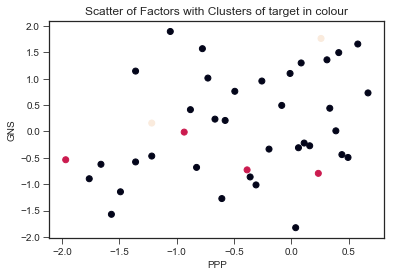

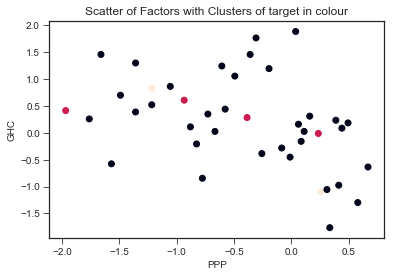

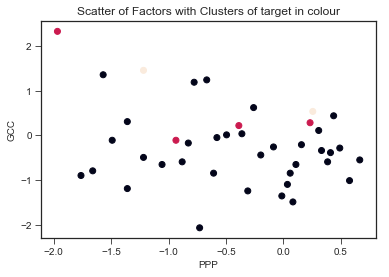

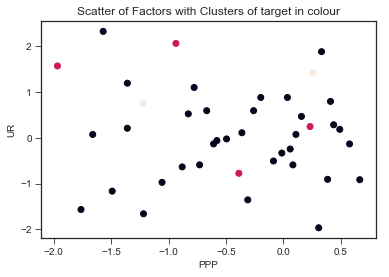

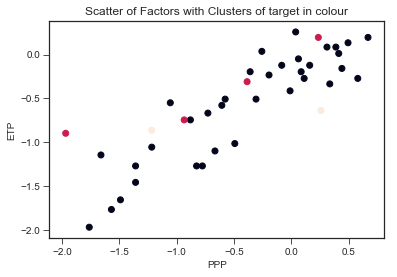

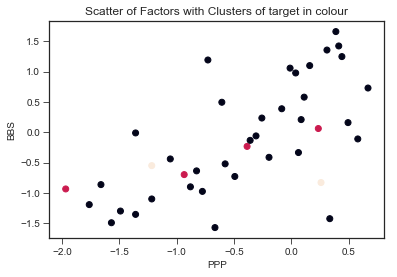

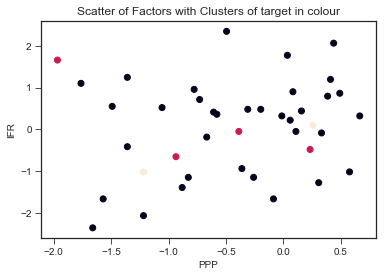

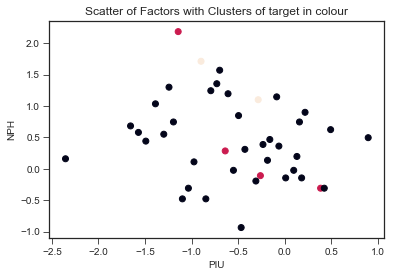

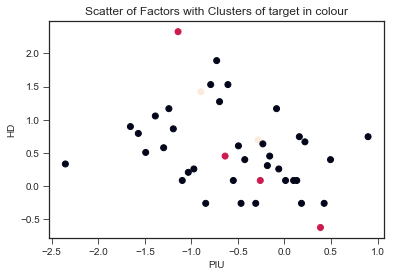

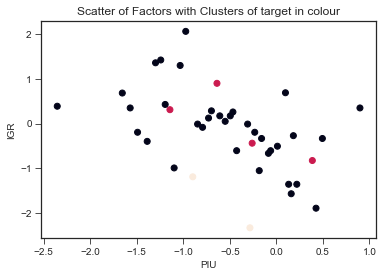

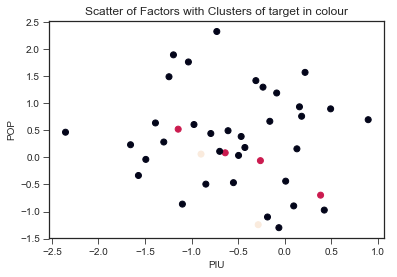

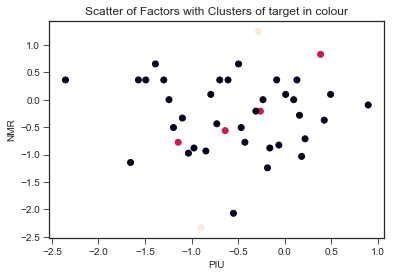

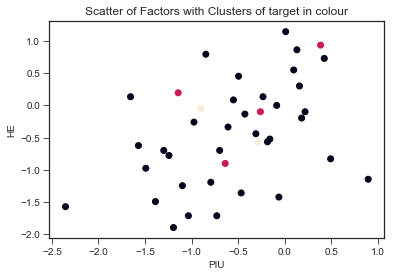

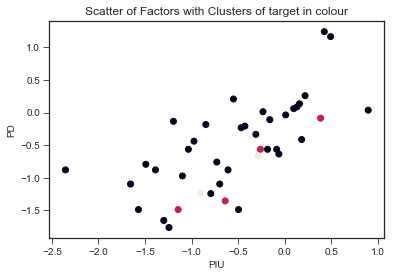

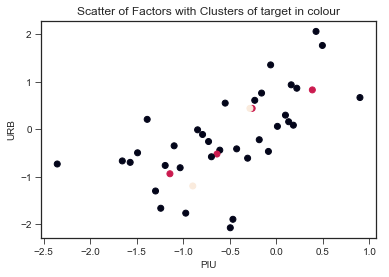

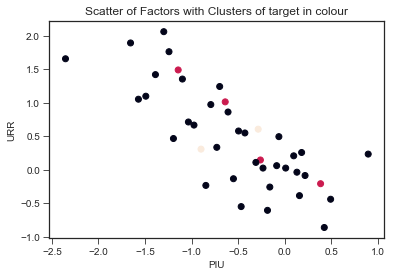

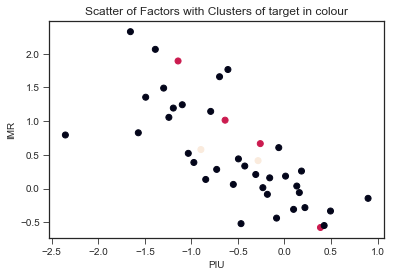

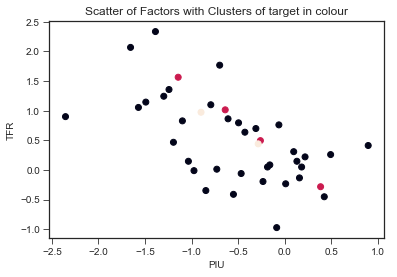

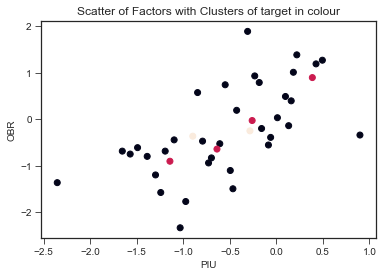

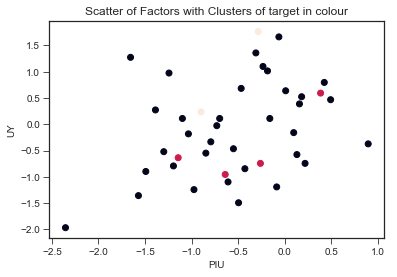

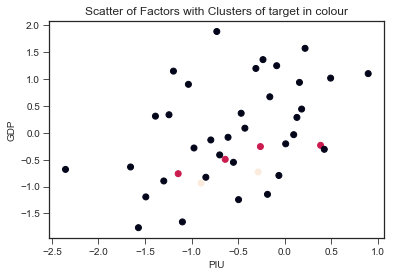

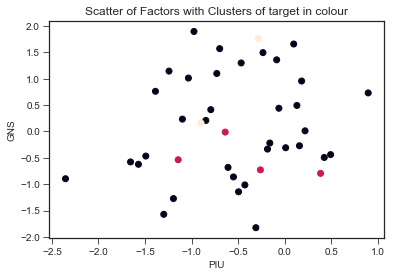

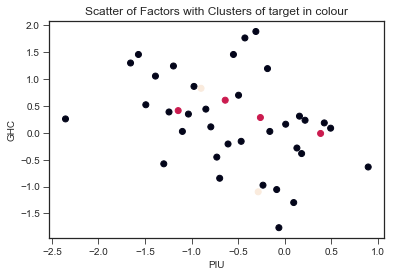

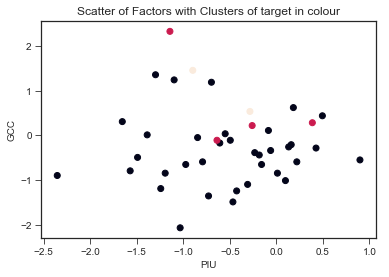

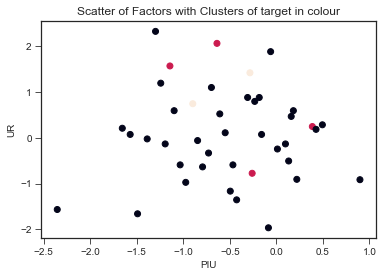

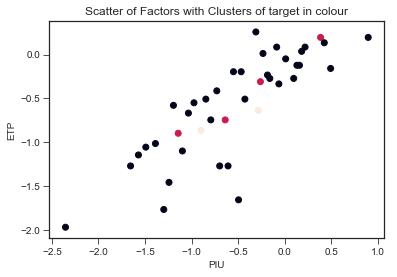

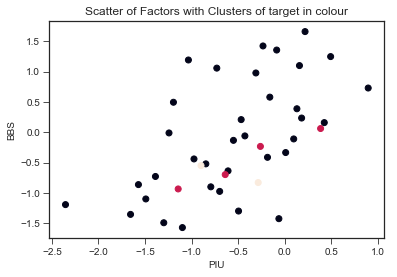

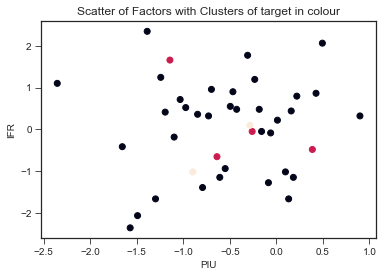

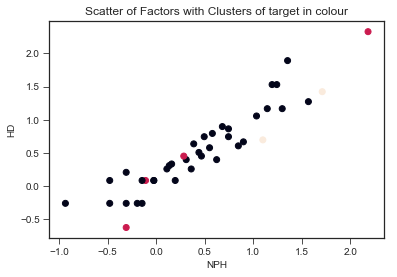

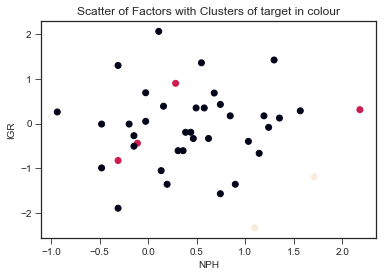

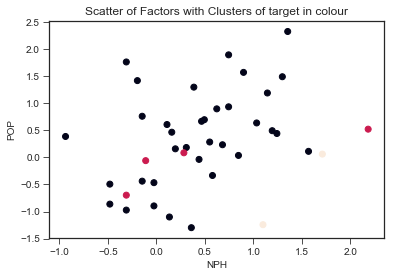

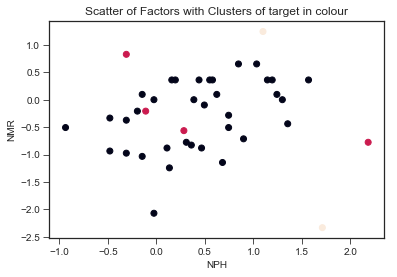

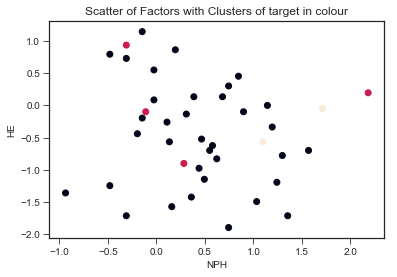

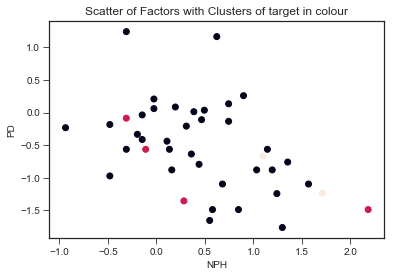

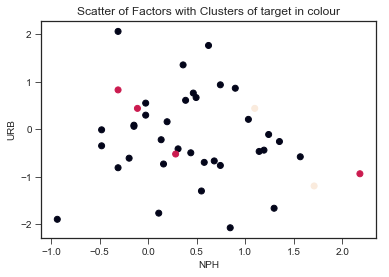

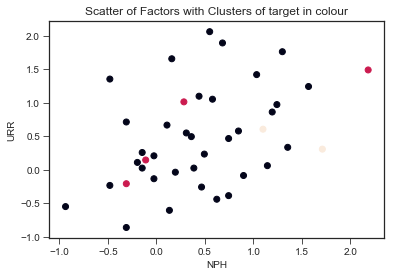

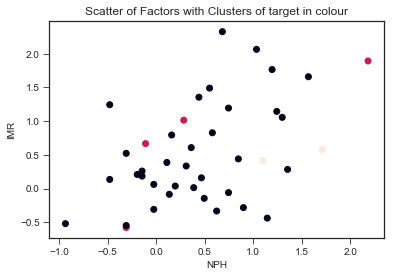

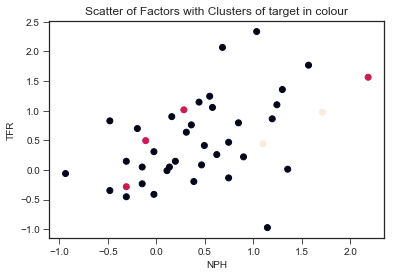

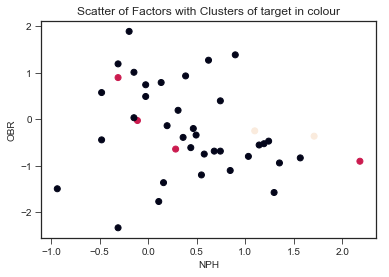

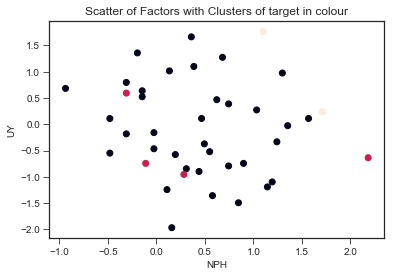

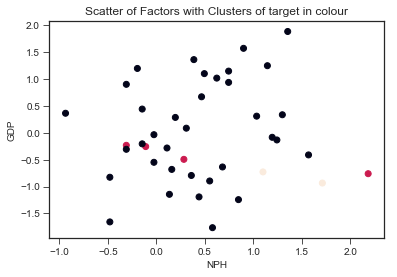

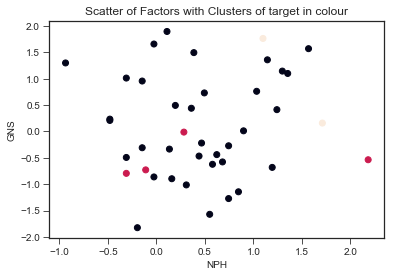

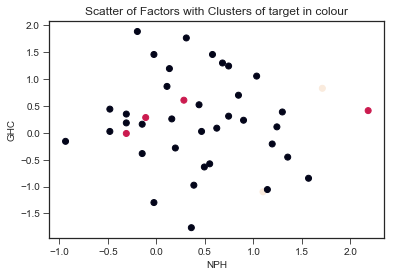

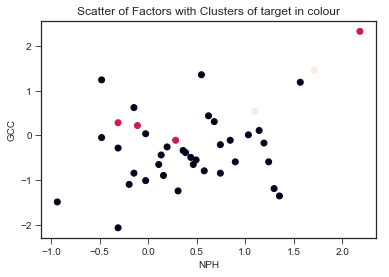

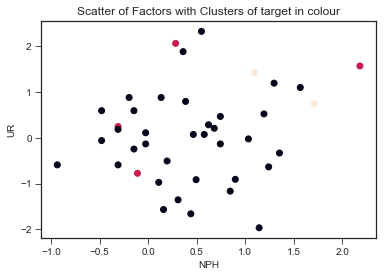

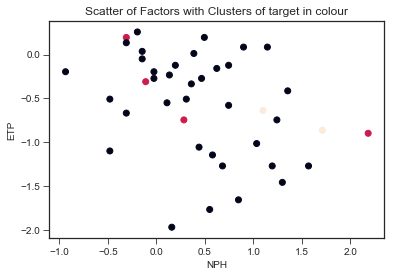

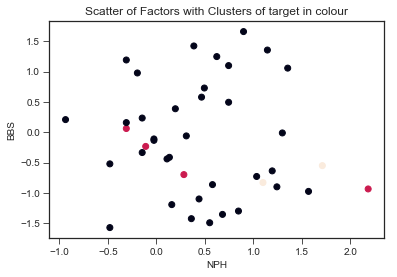

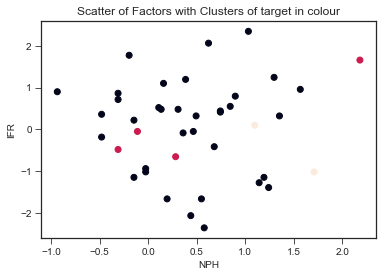

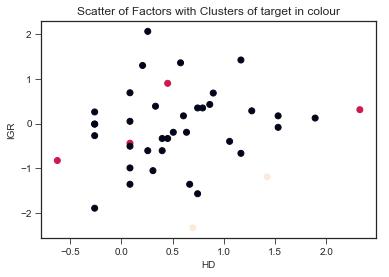

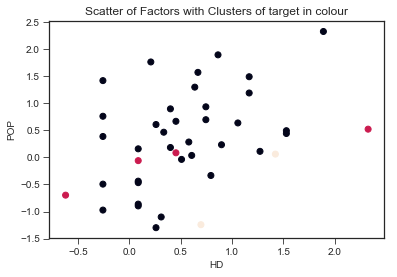

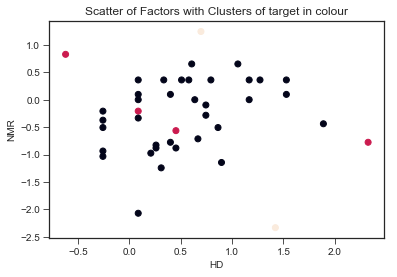

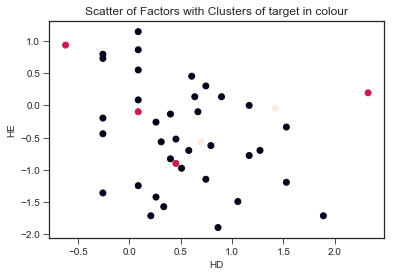

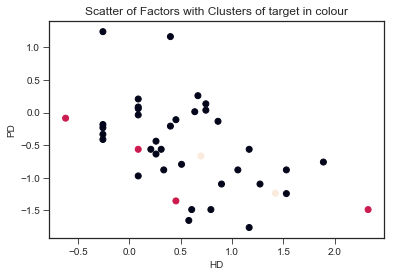

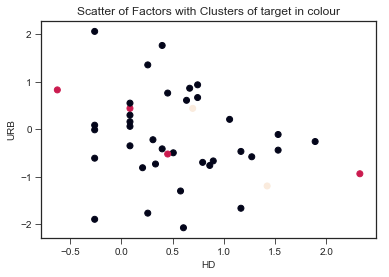

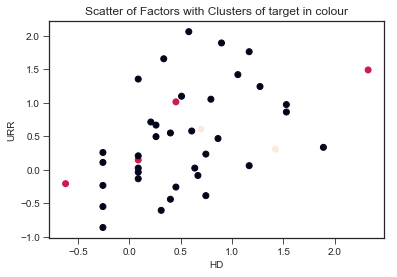

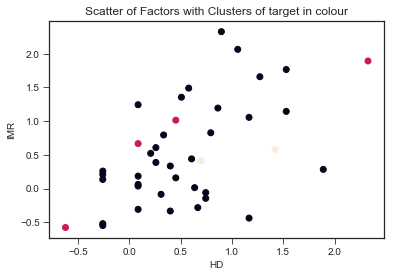

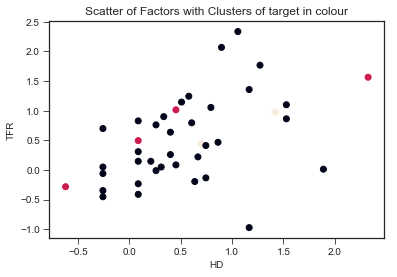

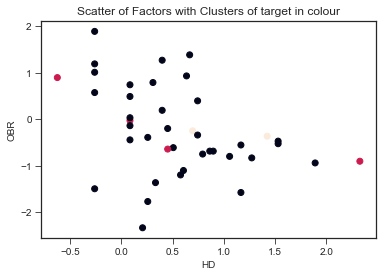

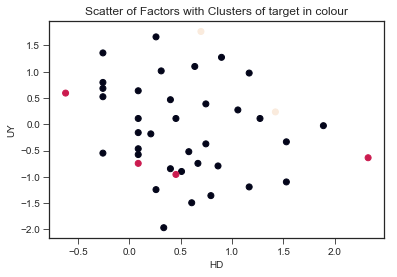

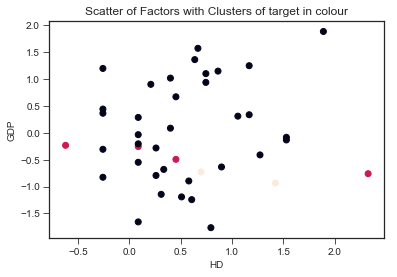

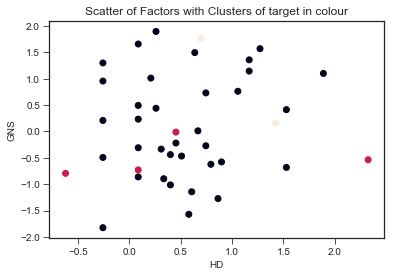

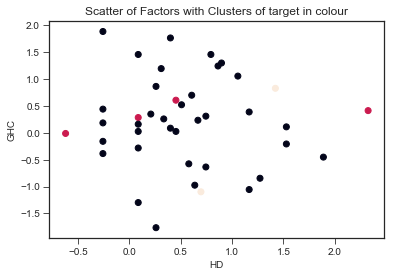

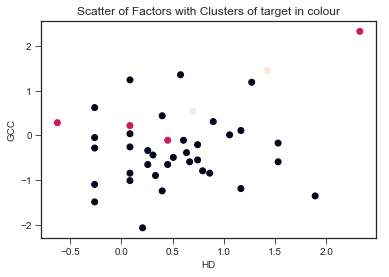

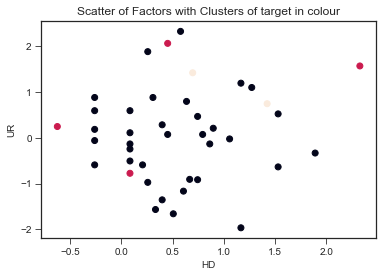

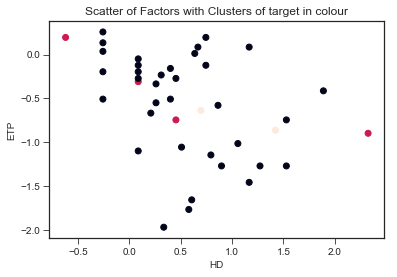

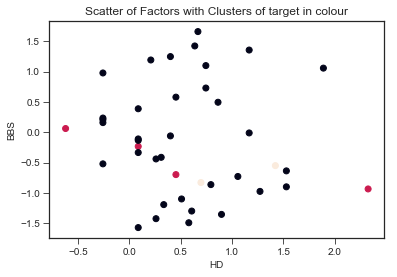

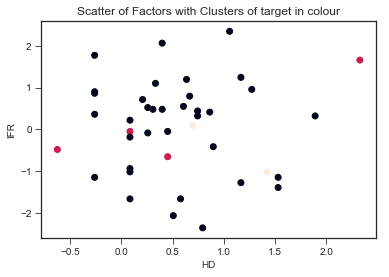

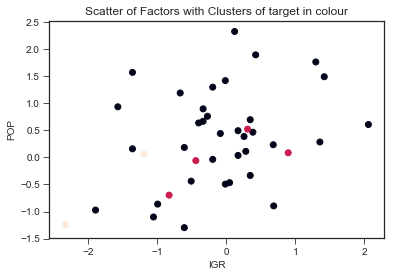

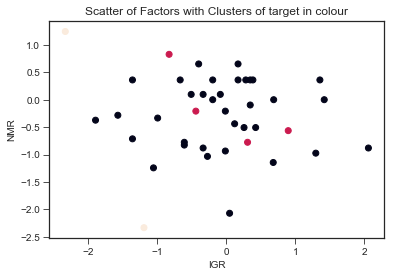

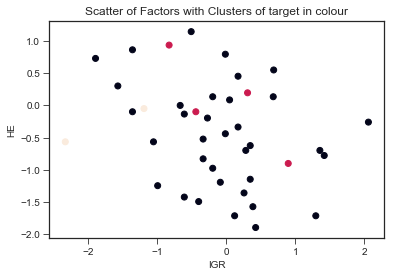

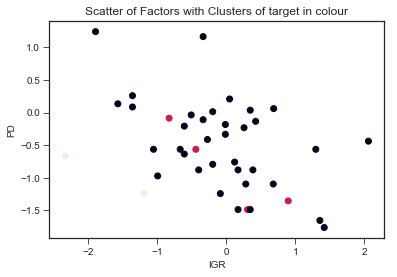

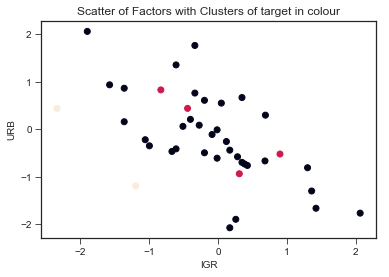

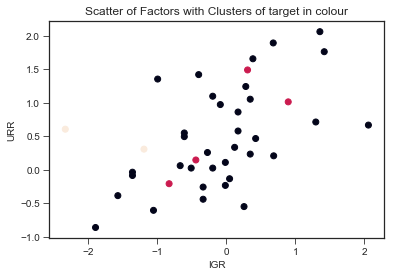

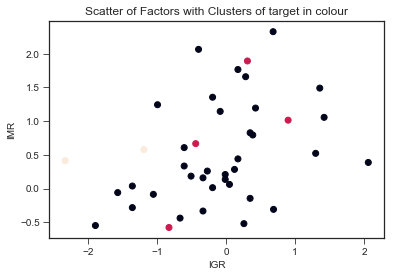

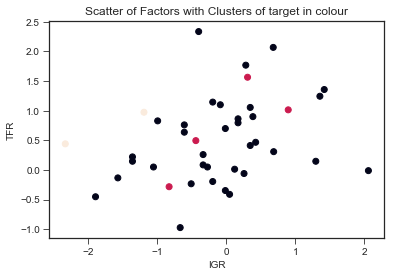

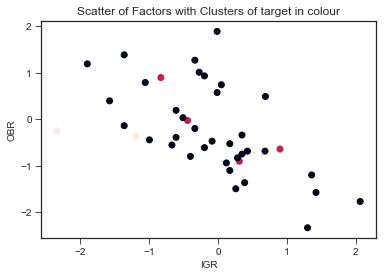

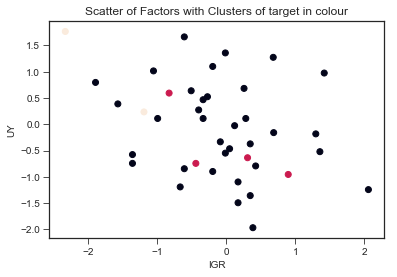

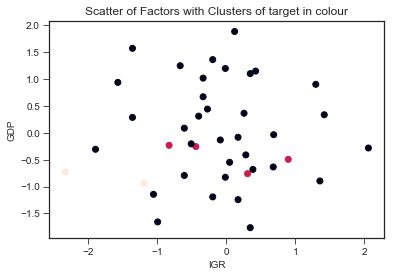

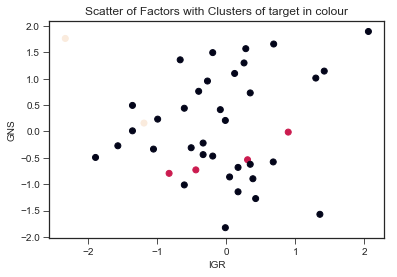

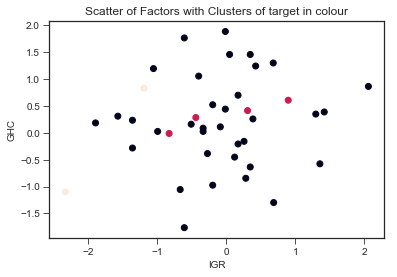

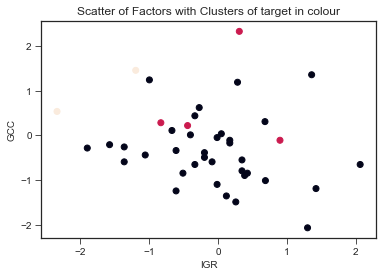

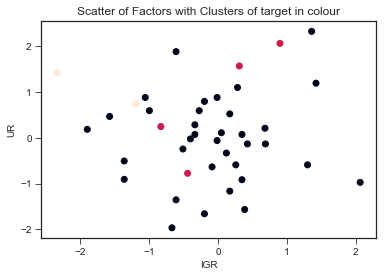

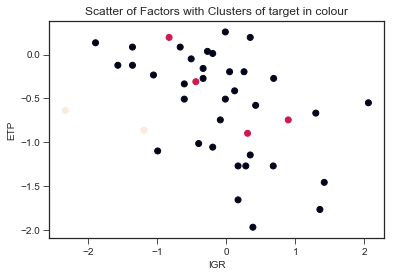

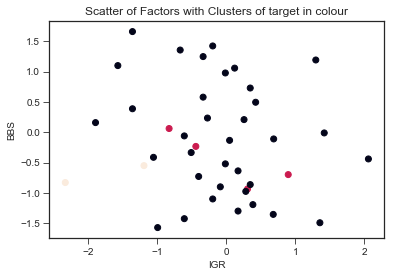

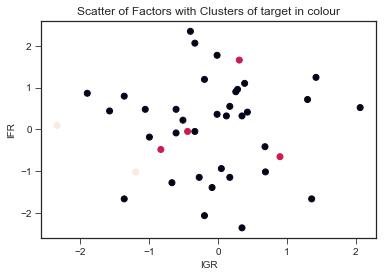

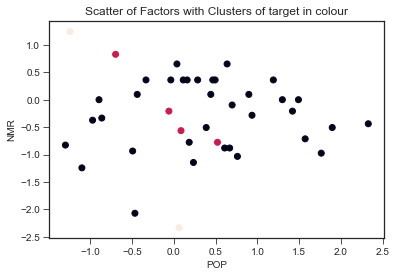

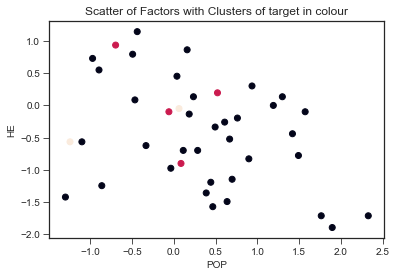

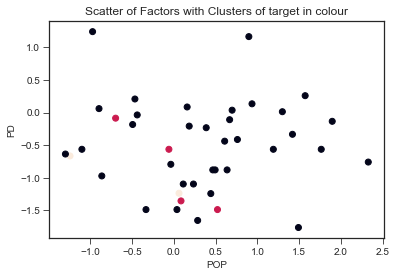

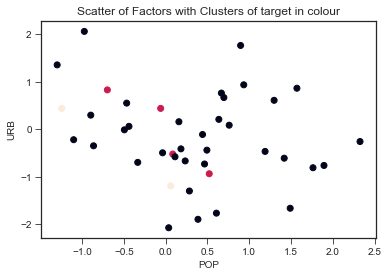

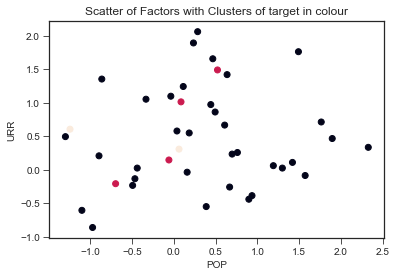

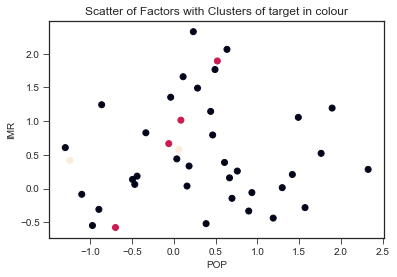

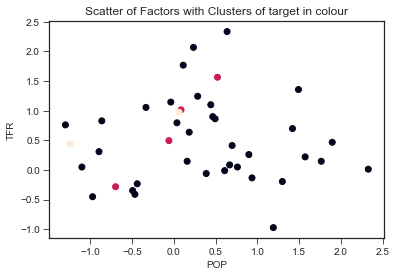

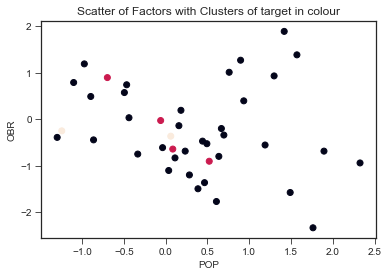

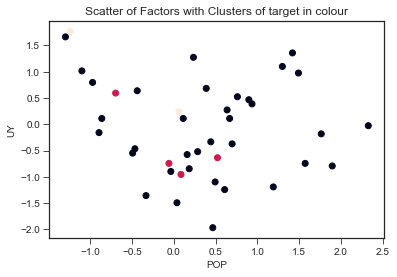

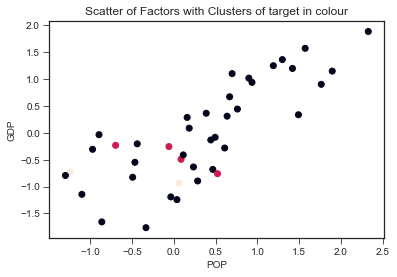

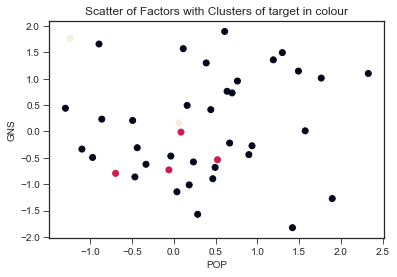

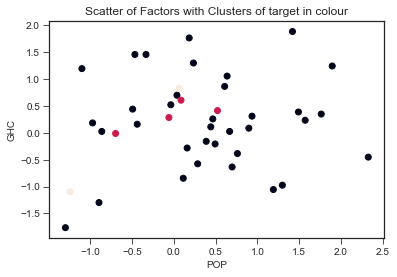

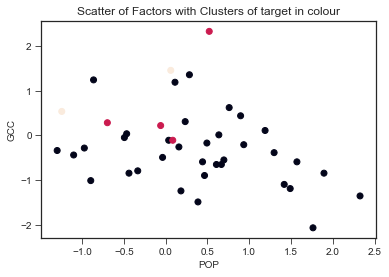

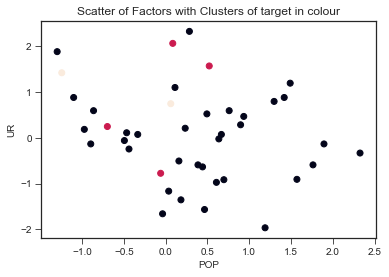

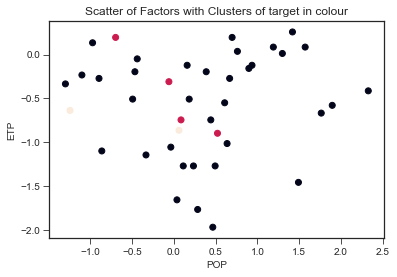

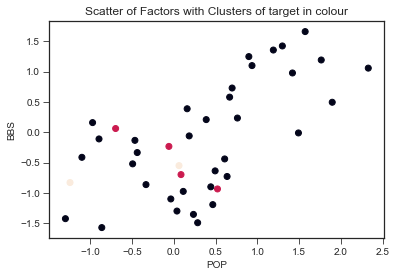

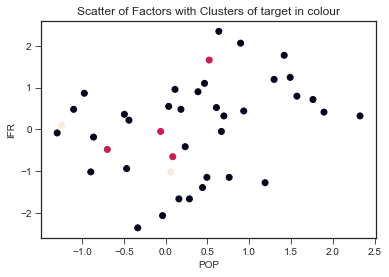

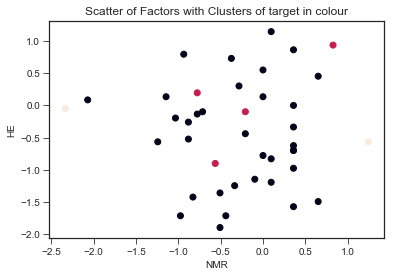

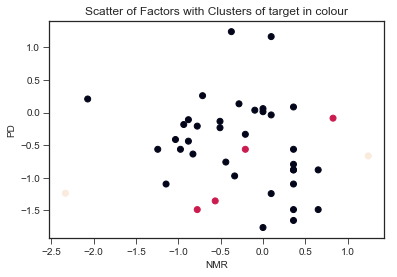

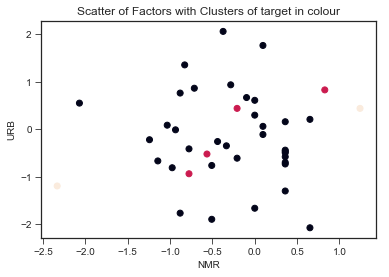

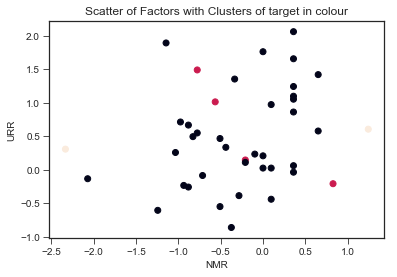

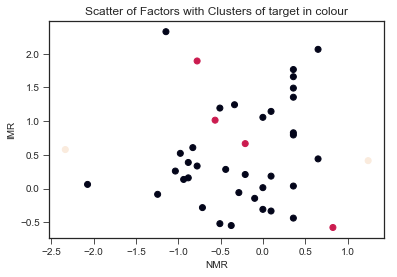

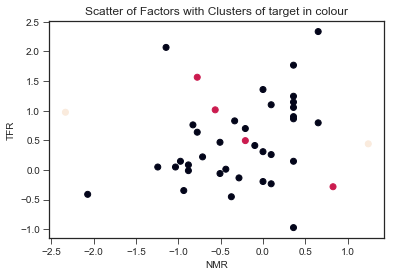

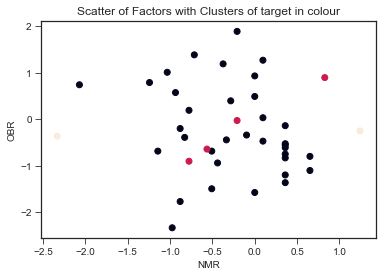

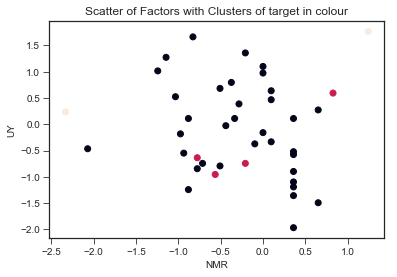

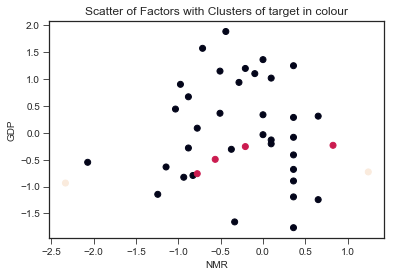

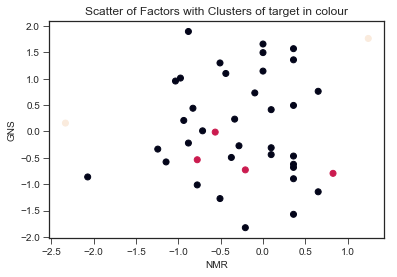

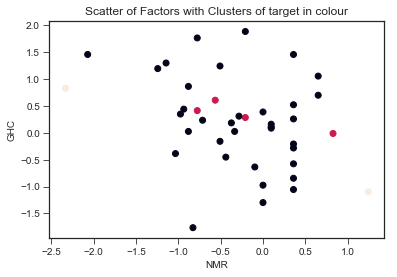

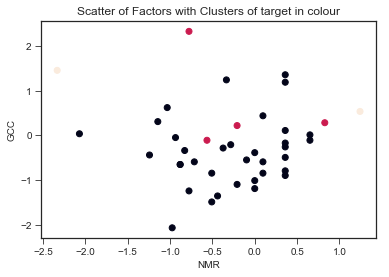

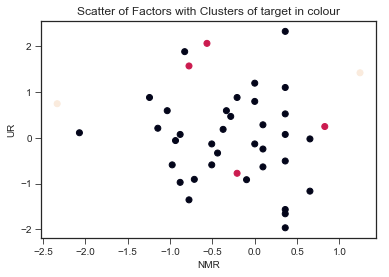

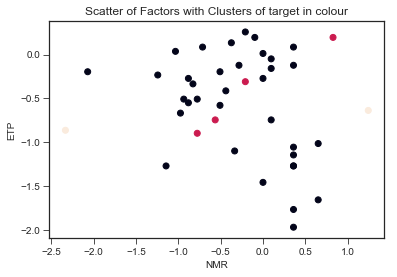

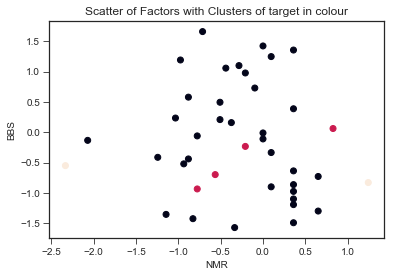

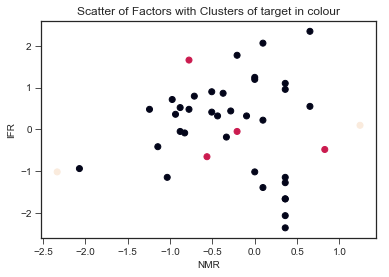

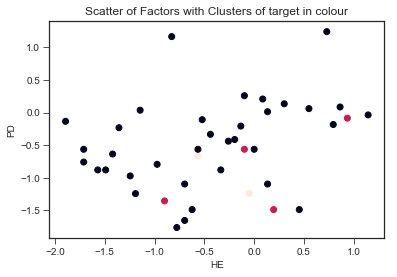

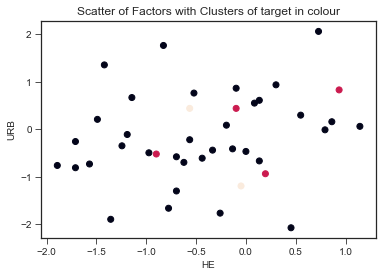

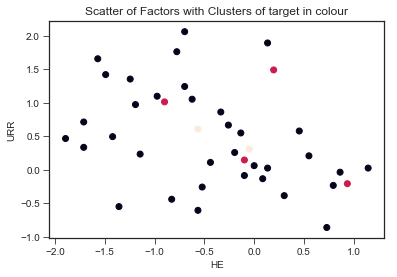

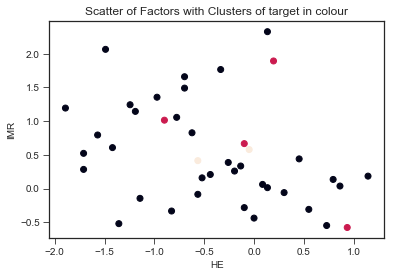

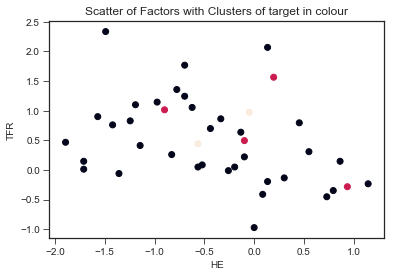

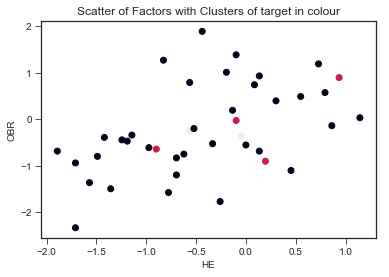

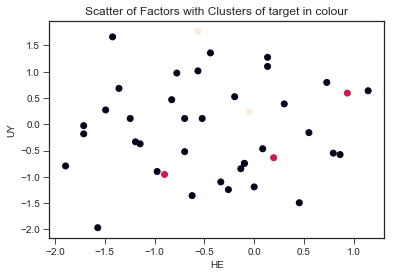

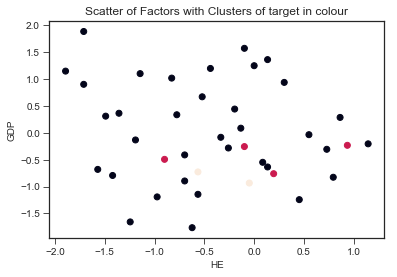

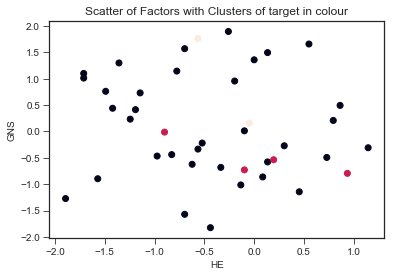

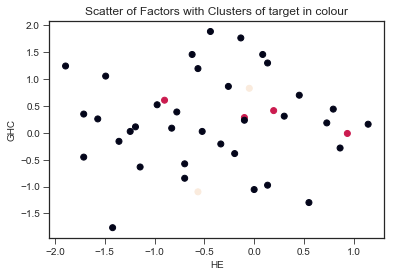

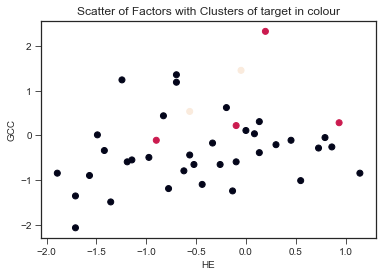

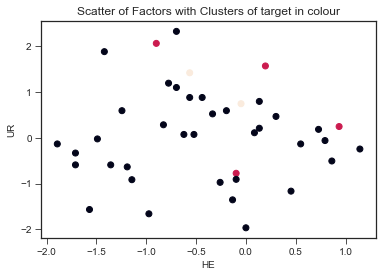

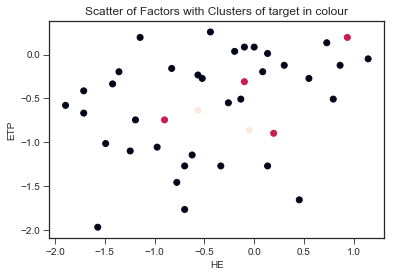

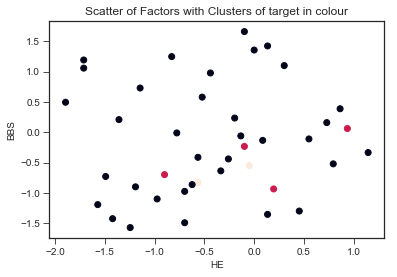

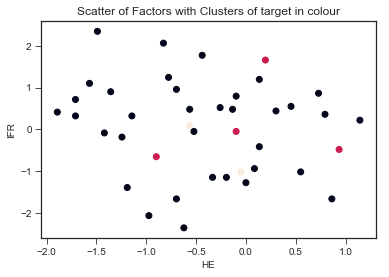

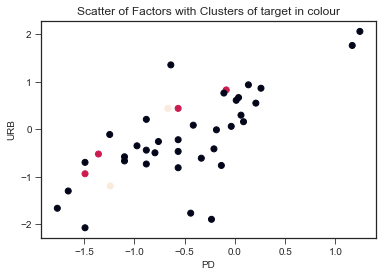

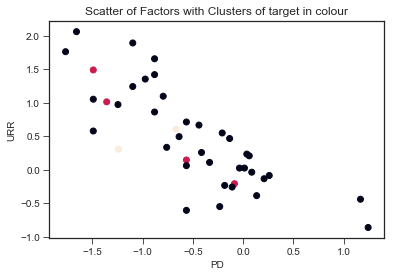

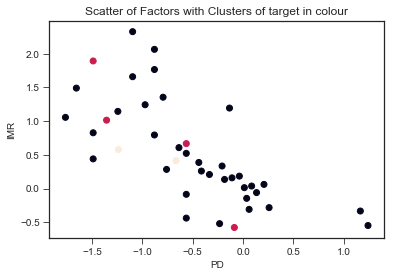

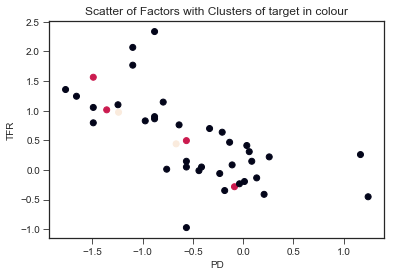

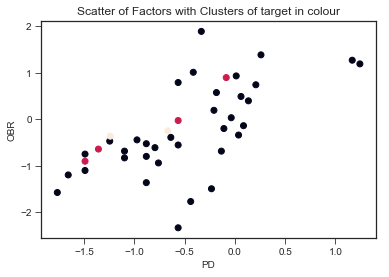

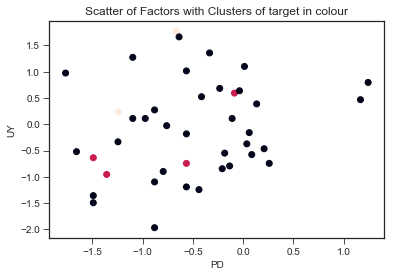

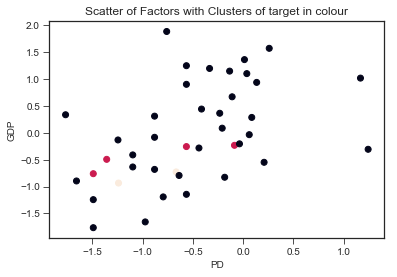

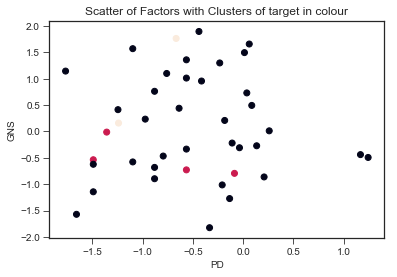

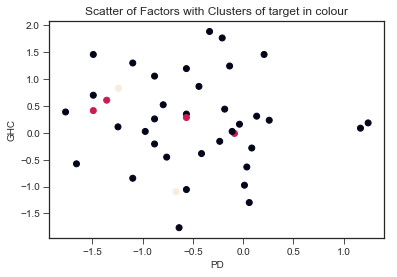

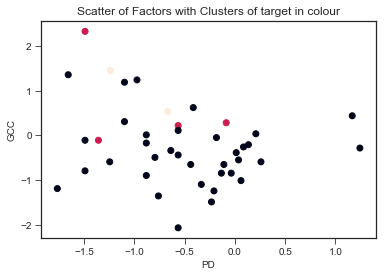

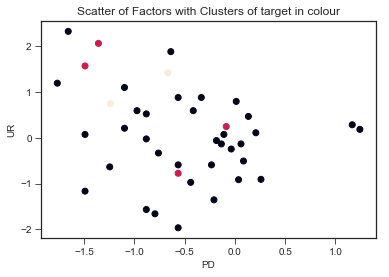

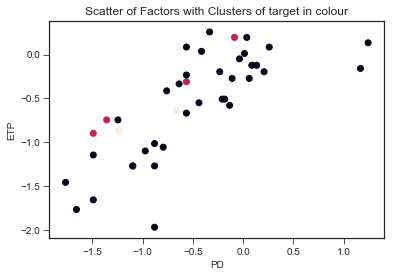

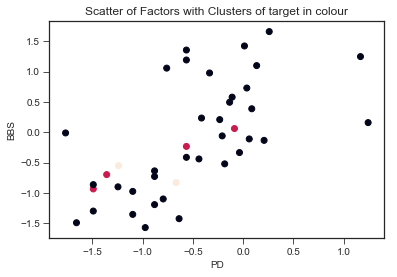

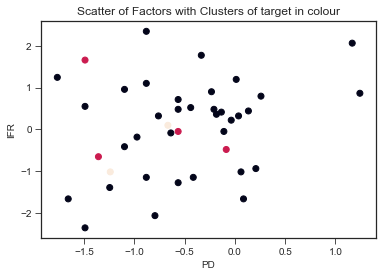

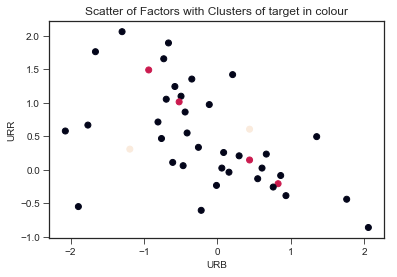

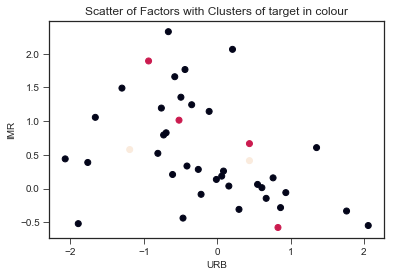

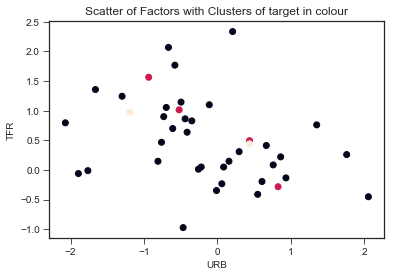

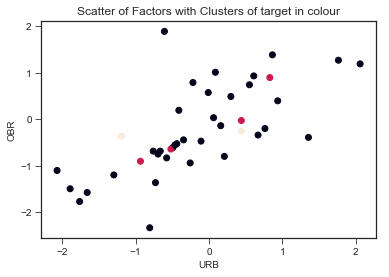

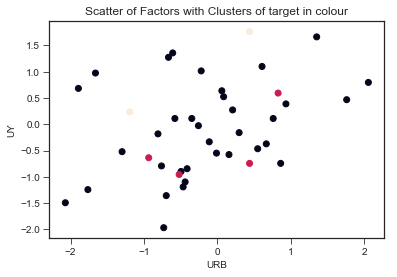

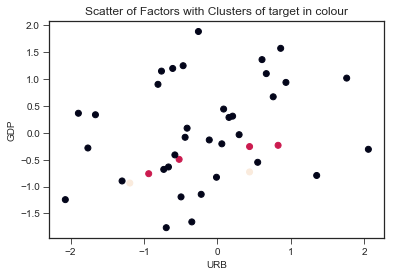

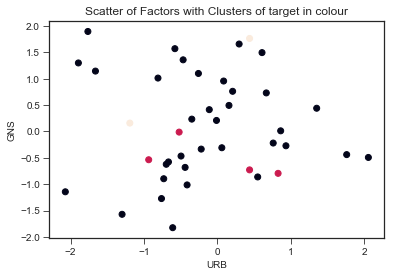

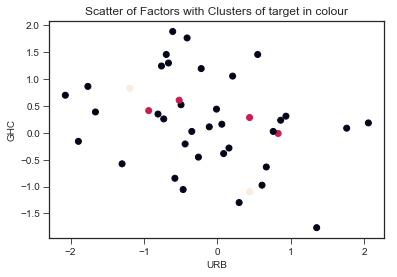

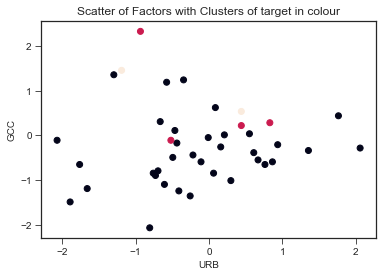

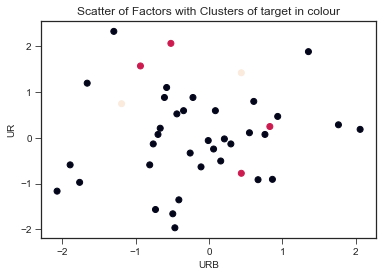

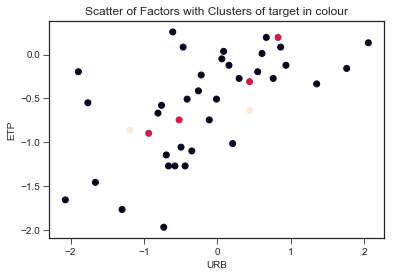

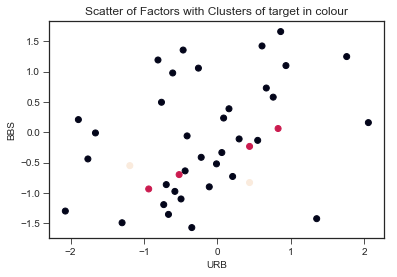

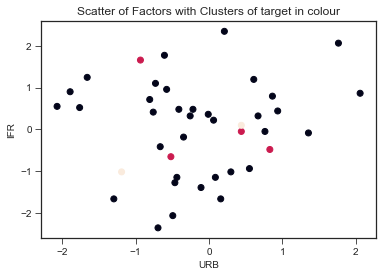

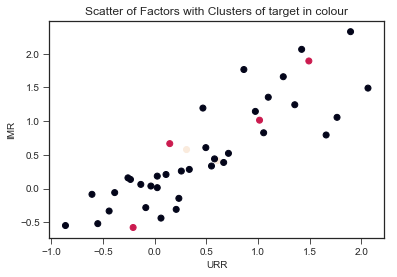

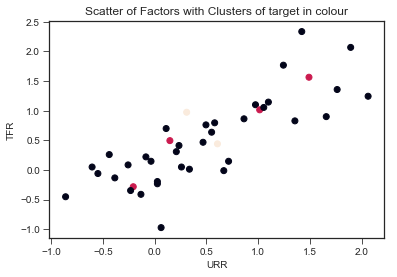

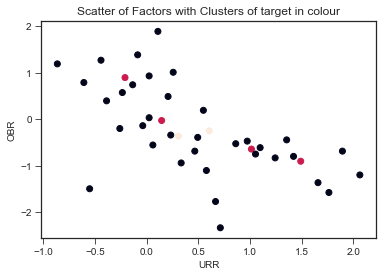

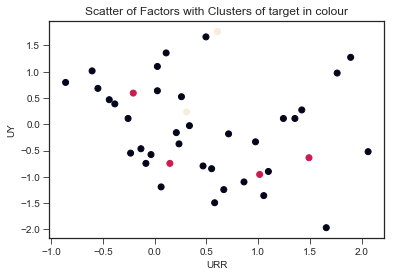

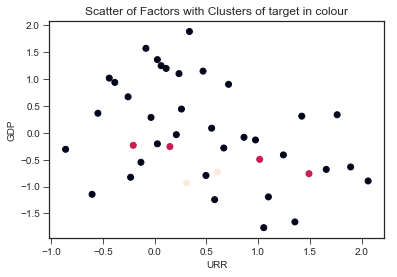

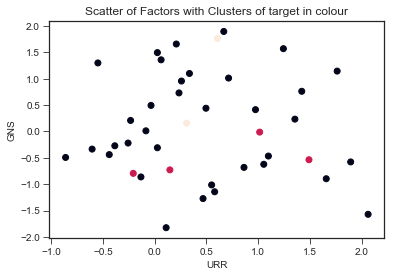

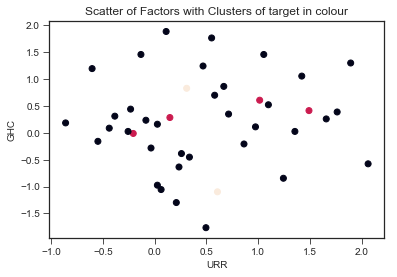

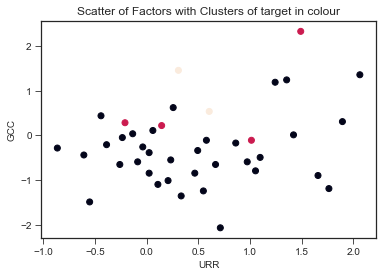

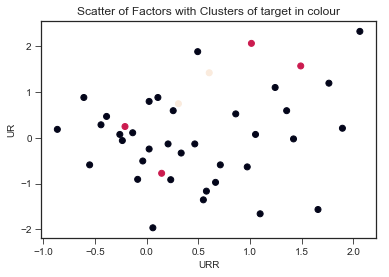

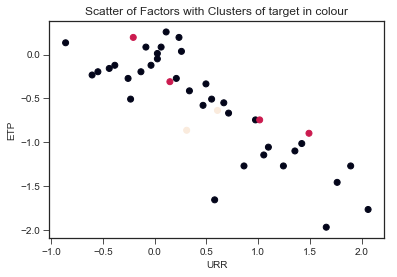

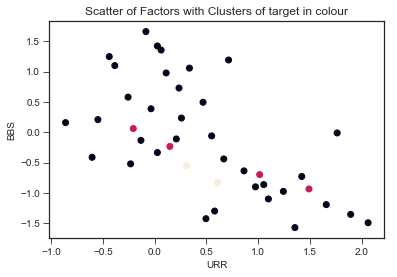

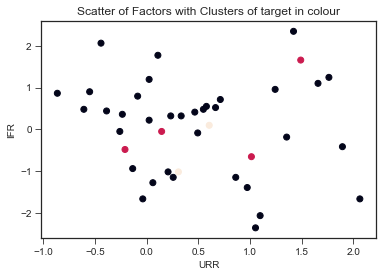

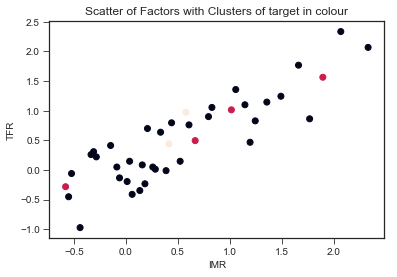

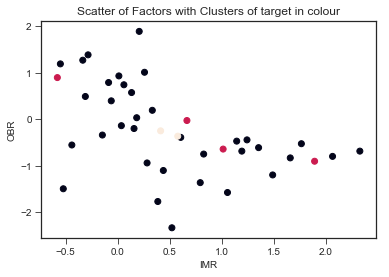

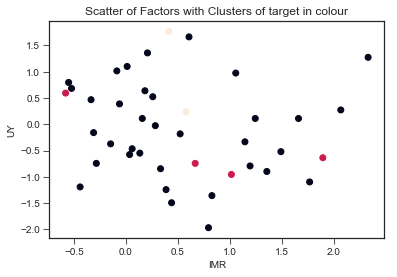

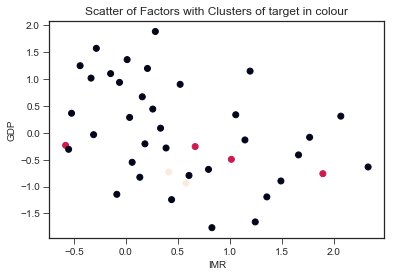

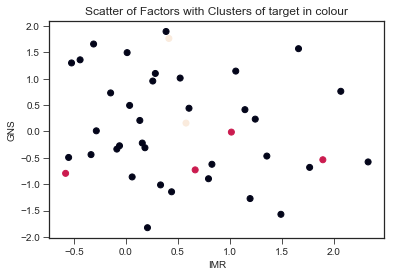

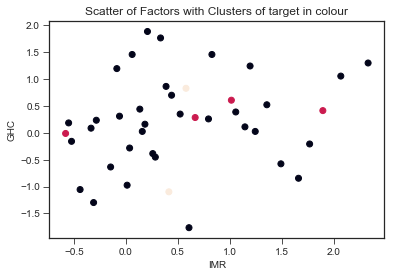

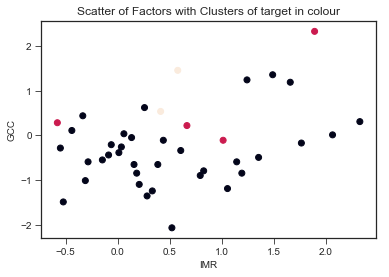

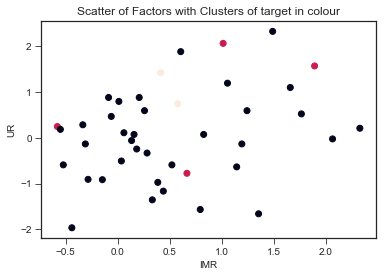

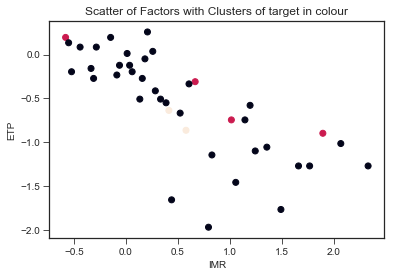

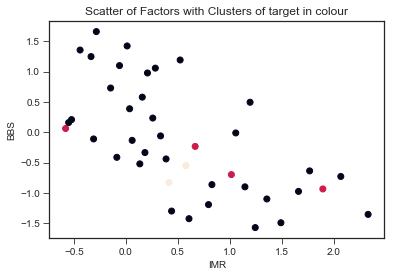

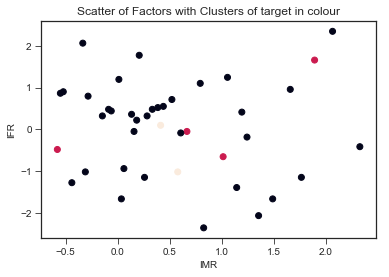

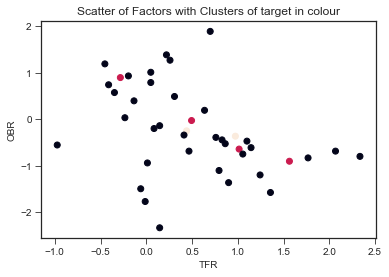

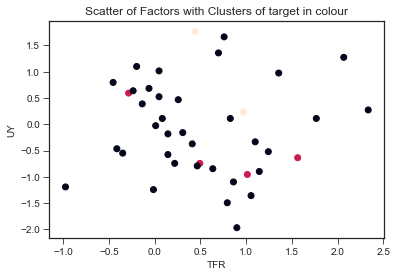

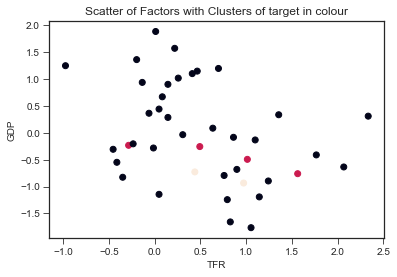

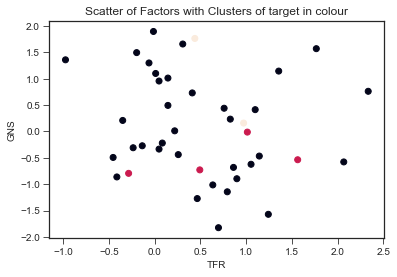

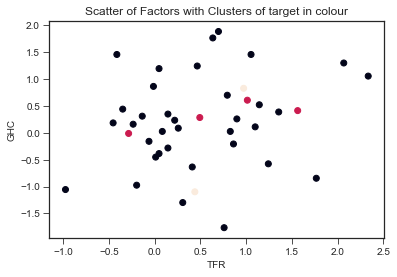

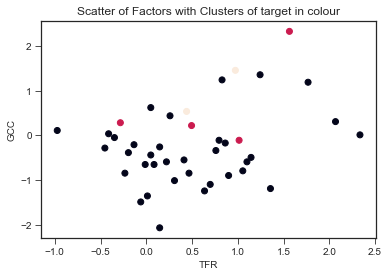

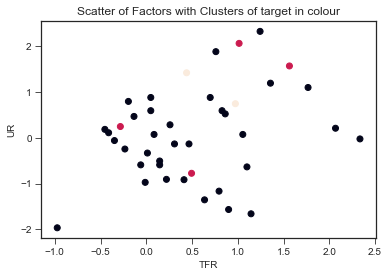

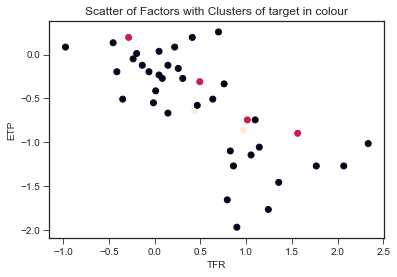

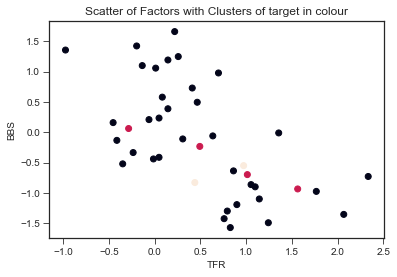

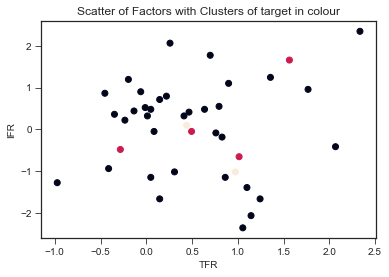

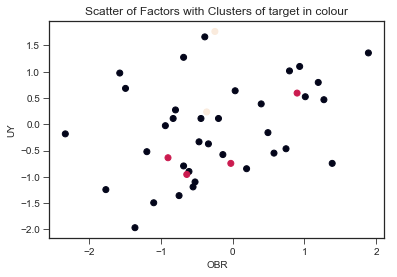

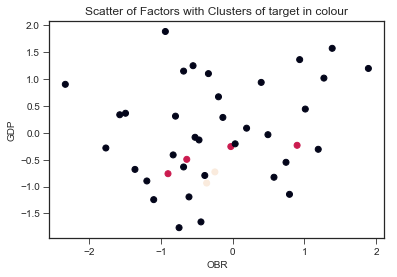

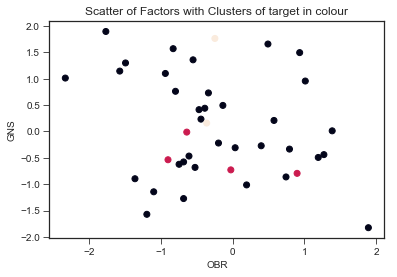

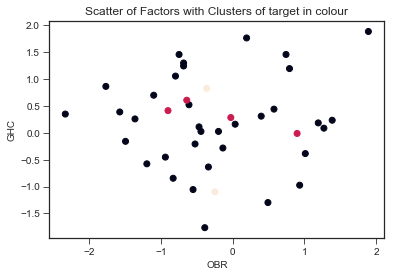

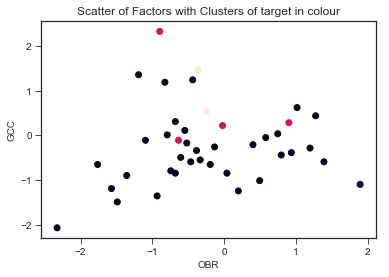

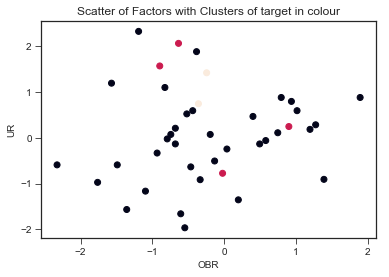

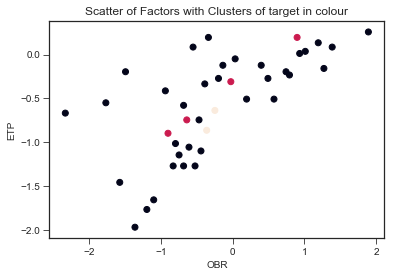

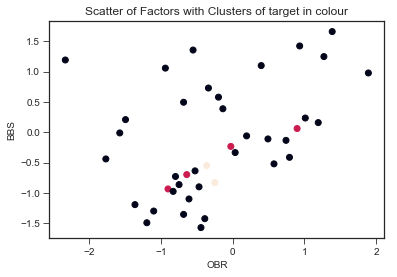

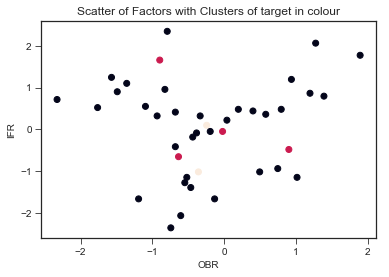

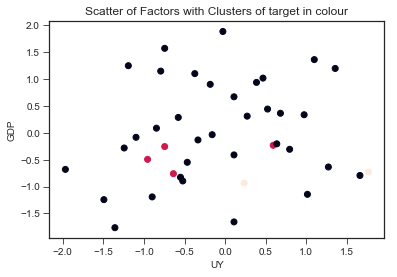

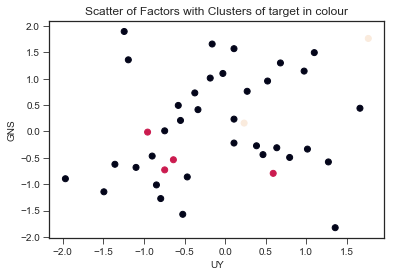

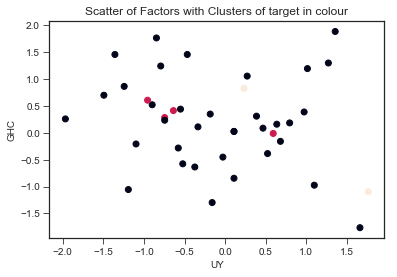

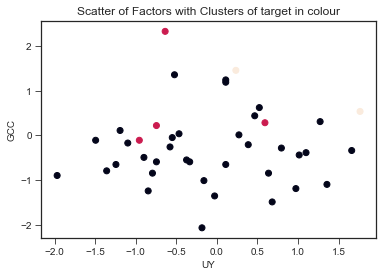

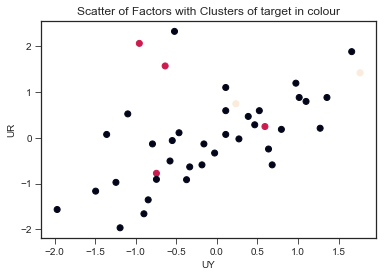

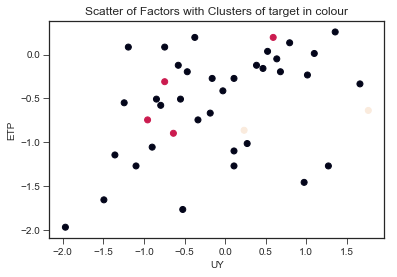

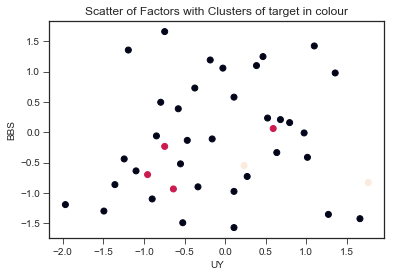

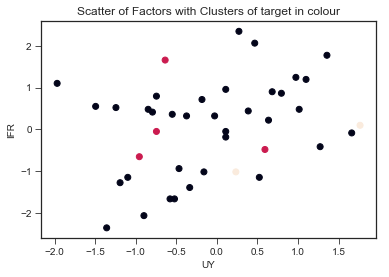

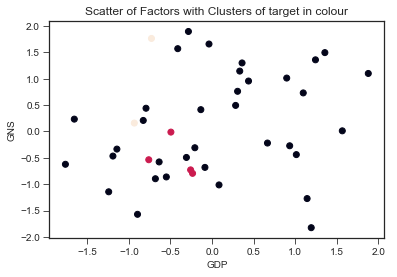

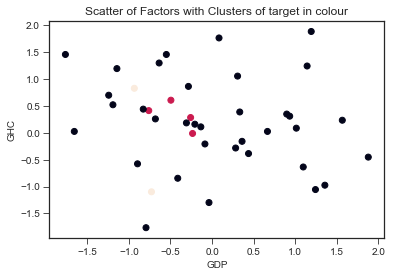

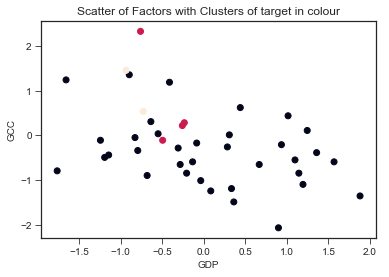

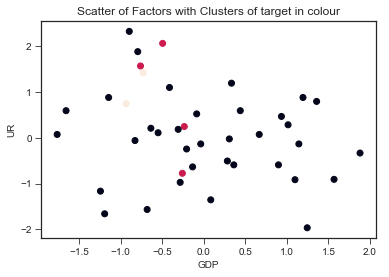

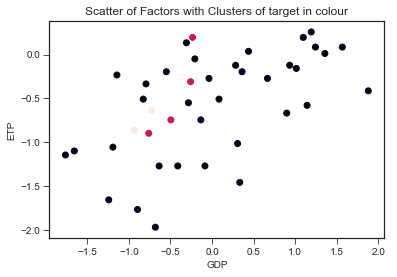

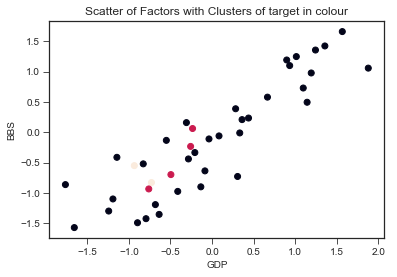

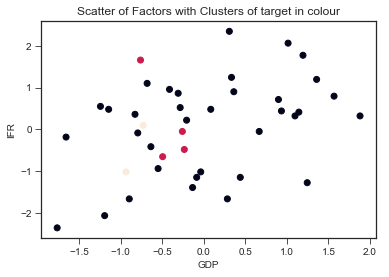

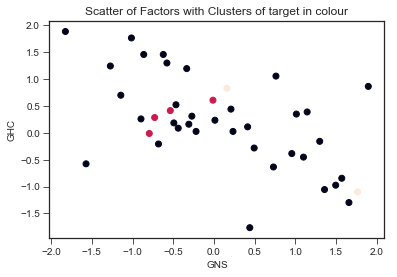

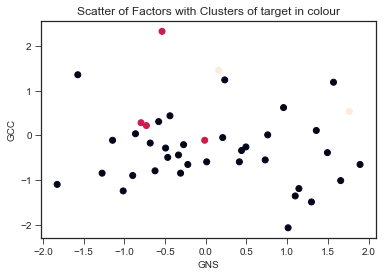

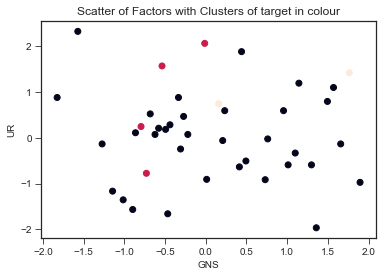

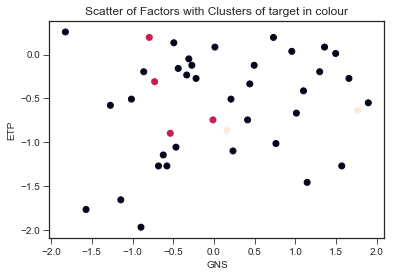

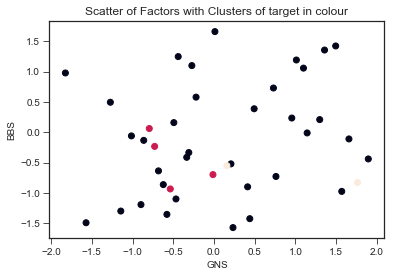

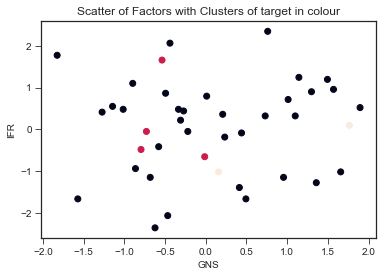

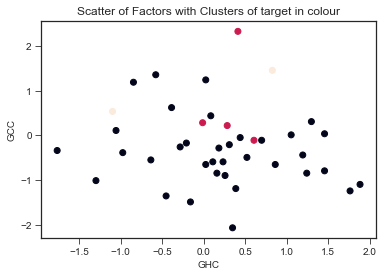

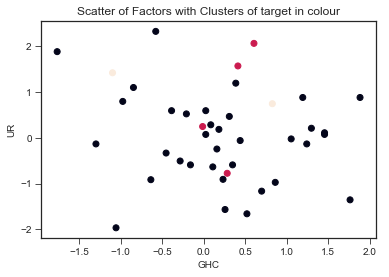

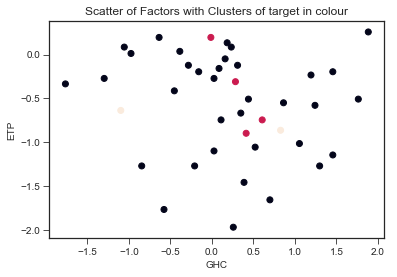

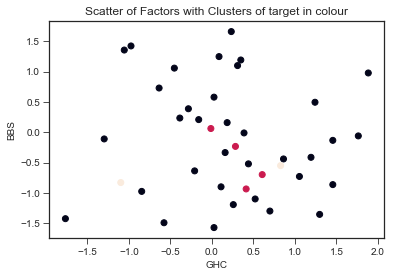

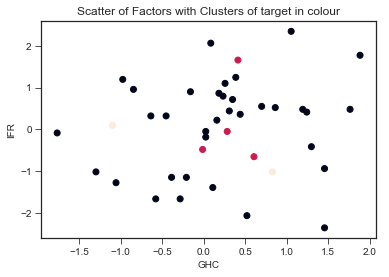

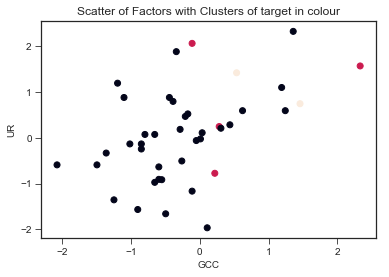

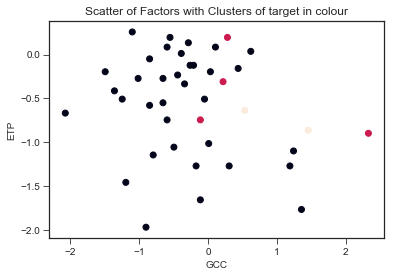

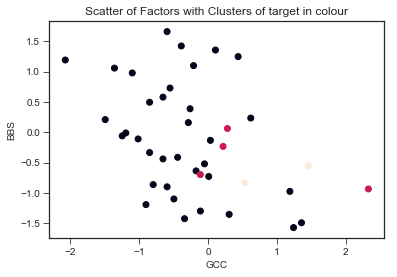

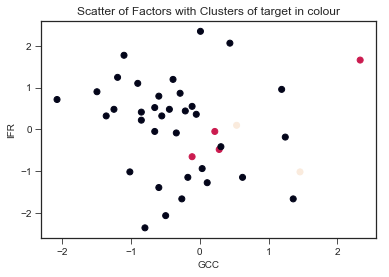

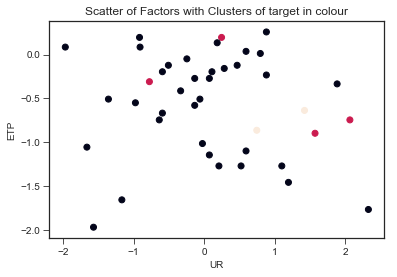

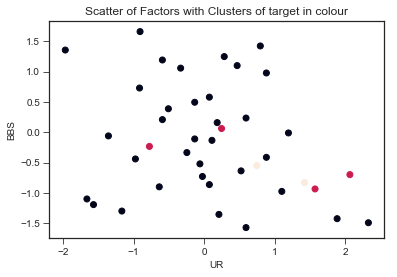

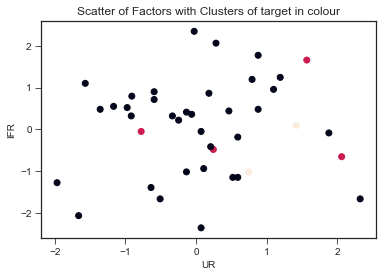

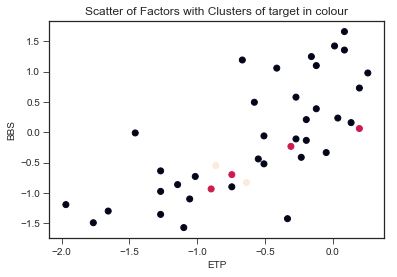

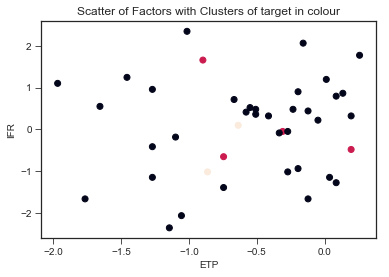

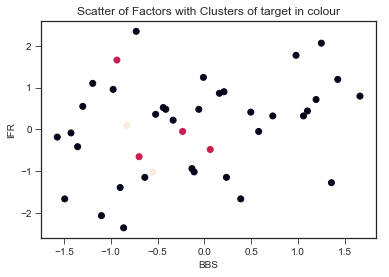

In [45]:
# plot x[] vs x[+1] for all combinations and have it colored by clusters of y - see if this informs anythign
import itertools
CombOfXInd=list(itertools.combinations(range(len(X.columns)), 2))

for c in range(0,len(CombOfXInd)):
    plt.scatter(X.values[:, CombOfXInd[c][0]], X.values[:, CombOfXInd[c][1]], c=yCats.values[:,0])
    plt.xlabel(X.columns[CombOfXInd[c][0]])
    plt.ylabel(X.columns[CombOfXInd[c][1]])
    plt.title("Scatter of Factors with Clusters of target in colour")
    plt.show()